In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import ee
import geemap
Map= geemap.Map()

In [2]:
lake=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-195-centroids')

In [3]:
# print(lake.size().getInfo())
# print(lake.aggregate_array('NAME').distinct().getInfo())
# print(lake.first().propertyNames().getInfo())

In [4]:
# Function to create a five-sided polygon around the latitude and longitude
import ee
import geemap

# Function to create a five-sided polygon around the latitude and longitude
def create_lake_polygon(lat, lon):
    # Assuming each pixel is approximately 20 meters in size
    buffer_distance_meters = 3 * 20

    
    # Convert buffer distance from meters to degrees (approximate conversion)
    buffer_distance_degrees = buffer_distance_meters / 111320.0

    # Define the coordinates of the five vertices of the polygon
    coordinates = [
        [lon, lat + buffer_distance_degrees],
        [lon + buffer_distance_degrees, lat + buffer_distance_degrees / 2],
        [lon + buffer_distance_degrees / 2, lat - buffer_distance_degrees / 2],
        [lon - buffer_distance_degrees / 2, lat - buffer_distance_degrees / 2],
        [lon - buffer_distance_degrees, lat + buffer_distance_degrees / 2]
    ]

    # Create the polygon geometry
    polygon = ee.Geometry.Polygon(coordinates)

    return polygon

In [5]:
all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')
Map.addLayer(all_lakes)
Map.centerObject(all_lakes,16)
Map

Map(center=[44.06877752167093, -74.34748015610103], controls=(WidgetControl(options=['position', 'transparent_…

In [6]:
lake=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-195-centroids')\
         .filter(ee.Filter.eq('NAME', 'Lost Pond'))
lat = ee.Number(lake.first().geometry().coordinates().get(1)).getInfo()
lon = ee.Number(lake.first().geometry().coordinates().get(0)).getInfo()
lake_polygon = ee.Geometry.Point(lon, lat).buffer(100)
Map.addLayer(lake_polygon)
Map.centerObject(lake_polygon,16)
Map

Map(center=[43.6465730340152, -74.55707926629744], controls=(WidgetControl(options=['position', 'transparent_b…

In [7]:
ee.Initialize()

lake_names = ['Windfall Pond', 'Middle Pond', 'Lake Alice 2', 'Lake Alice', 'Jabe Pond', 'Little Jabe Pond', 'Augur Lake',
              'Butternut Pond', 'Trout Pond', 'Bartlett pond', 'Raquette Lake Reservoir', 'Heavens Lake', 'Lake Roxanna',
              'Long Pond-Essex', 'Penfield Pond', 'Putnam Pond', 'Grass Pond', 'Squash Pond', 'Upper St. Regis Lake',
              'Lower St. Regis Lake', 'Spitfire Lake', 'Schroon Lake', 'Sagamore Lake', 'Moose Pond', 'Upper Asuable Lake',
              'Thirteenth Lake', 'Raquette Lake', 'Upper Chateaugay Lake', 'Willys Lake', 'Lake Everest', 'Moss Lake',
              'Amber Lake', 'Arbutus Pond', 'Mirror Lake', 'Rondaxe, Lake', 'Lake Algonquin', 'Limekiln Lake',
              'Eighth Lake', 'Friends Lake', 'Lower Chateaugay Lake', 'Catlin Lake', 'Taylor Pond', 'Cranberry Lake',
              'Little Green Pond', 'East Pine Pond', 'Queer Lake', 'Irving Pond', 'Wolf Pond', 'Fern Lake', 'Lake Eaton',
              'Squaw Lake', 'Deer Pond', 'Clear Pond', 'Lens Lake', 'Zack Pond', 'East Caroga Lake', 'West Caroga Lake',
              'Kiwassa Lake', 'Lake Flower', 'Oseetah Lake', 'Lower Saranac Lake', 'stony Creek Pond', 'Ragged Lake',
              'Blue Mountain Lake', 'Eagle Lake', 'Fourth Lake', 'Jordan Lake', 'Long Pond', 'Lake Kushaqua',
              'Lake Placid', 'Trout Lake', 'Loon Lake', 'Big Moose Lake', 'Tupper Lake', 'Simon Pond', 'White Lake',
              'Floodwood Pond', 'North Lake', 'Indian Lake', 'Twitchell Lake', 'Little Simon Pond', 'Lower Asuable Lake',
              'Oxbow Lake', 'Gull Pond', 'Long Lake', 'Barnes Lake', 'Carry Pond', 'Little Clear Pond', 'Sochia Pond',
              'Little Rainbow Pond', 'Gordon Pond', 'Avalanche Lake', 'Little Hope Pond', 'Pleasant Lake', 'Fifth Lake',
              'Lost Pond', 'Otter Pond', 'Bone Pond', 'Sunday Pond', 'Echo Lake', 'Big Cherry Patch Pond', 'Chapel Pond',
              'Hidden Lake', 'West Pond', 'Copperas Pond', 'Heart Lake', 'Lower Cascade Lake', 'Frank Pond', 'Rush Pond',
              'Constable Pond', 'Morehouse Lake', 'Cascade Lake', 'Split Rock Pond', 'Polliwog Pond', 'Lake Adirondack',
              'Lake Titus', 'Slang Pond', 'Turtle Pond', 'Hoel Pond', 'Franklin Falls Reservoir', 'Mountain View Lake',
              'Rich Lake', 'Rat Pond', 'Alford Pond', 'Lake Colden', 'Lower Beaver Ponds', 'Round Pond', 'Woods Lake',
              'Green Pond', 'Lake Durant', 'Osgood Pond', 'Rainbow Lake', 'Canada Lake', 'Middle Saranac Lake',
              'Union Falls Pond', 'Chazy Lake', 'G Lake', 'Windover Lake', 'Pine Lake', 'Hewitt Pond', 'South Lake',
              'Follensby Clear Pond', 'Loon Hollows Pond', 'Middle Settlement Lake', 'Little Polliwog Pond', 'Black Pond',
              'Little Echo Pond', 'Moody Pond', 'Owl Pond', 'Owen Pond', 'Holcomb Pond', 'Upper Cascade Lake', 'Big Hope Pond',
              'Austin Pond', 'Nate Pond', 'Eli Pond', 'Otter Lake', 'Willis Lake', 'Brook Trout Lake', 'McCauley Pond',
              'Connery Pond', 'Little Long Lake', 'Rollins Pond', 'Paradox Lake', 'Sacandaga Lake', 'Chase Lake', 'Whey Pond',
              'Brandreth Lake', 'Fawn Lake', 'Lake Madeleine,', 'Lake Colby', 'Garnet Lake', 'Star Lake', 'Silver Lake', 'Dart Lake',
              'Mink Pond', 'Spy Lake', 'Lake Clear', 'Lake Pleasant', 'Middle Branch Lake', 'Jockeybush Lake', 'Green Lake',
              'Pine Pond', 'Tripp Pond', 'Horseshoe Pond', 'Fish Creek Pond', 'Fish Creek West', 'Upper Saranac Lake',
              'Fish Creek East', 'Little Square Pond']

# Define the Landsat 5 bands and their corresponding standard names
LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
LC8_BANDS = ['SR_B2','SR_B3','SR_B4',  'SR_B5','SR_B6','SR_B7','ST_B10','QA_PIXEL']; #Landsat 8
STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']

all_lakes=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-Lakes-195')

# Define a function to mask clouds and cloud shadows from Landsat 5 surface reflectance imagery
def maskL457sr(image):
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)

    qa_values_to_filter = [5440, 5442, 5696, 13664]

    mask = image.select('QA_PIXEL').eq(qa_values_to_filter[0])
    for qa_value in qa_values_to_filter[1:]:
        mask = mask.Or(image.select('QA_PIXEL').eq(qa_value))

    filtered_image = image.updateMask(mask)

    opticalBands = filtered_image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBand = filtered_image.select('ST_B6').multiply(0.00341802).add(-124.15)
    return filtered_image.addBands(opticalBands, None, True).addBands(thermalBand, None, True).updateMask(qaMask).updateMask(saturationMask).clip(all_lakes)


def maskL8sr(image):
    # Bit 0 - Fill
    # Bit 1 - Dilated Cloud
    # Bit 2 - Cirrus
    # Bit 3 - Cloud
    # Bit 4 - Cloud Shadow
    qaMask = image.select('QA_PIXEL').bitwiseAnd(int('11111', 2)).eq(0)
    saturationMask = image.select('QA_RADSAT').eq(0)
    
    # Specify the QA values to filter
    qa_values_to_filter = [21824, 21826, 22080, 23888,30048,54596,54852]
    
    # Create a mask for the specified QA values
    mask = image.select('QA_PIXEL').eq(qa_values_to_filter[0])
    for qa_value in qa_values_to_filter[1:]:
        mask = mask.Or(image.select('QA_PIXEL').eq(qa_value))

    # Apply the mask to filter the image
    filtered_image = image.updateMask(mask)
     # Apply the scaling factors to the appropriate bands.
    opticalBands = filtered_image.select('SR_B.').multiply(0.0000275).add(-0.2)
    thermalBands = filtered_image.select('ST_B.*').multiply(0.00341802).add(-124.15)

    # Replace the original bands with the scaled ones and apply the masks.
    return filtered_image.addBands(opticalBands, None, True) \
        .addBands(thermalBands, None, True) \
        .updateMask(qaMask) \
        .updateMask(saturationMask)\
        .clip(all_lakes)



# Define a function to compute the mean reflectance values for the specified bands within the region of interest (lake)
def reflectance(img, lake):
    reflectance_values = img.reduceRegion(reducer=ee.Reducer.mean(), geometry=lake_polygon, scale=30).select(STD_NAMES)
    return img.set('DATE_SMP', img.date().format()).set('reflectance', reflectance_values)

# Initialize an empty list to store the dataframes for each lake
dfs = []

# Create a dictionary to map each lake name to a numerical label
lake_name_to_label = {lake_name: i for i, lake_name in enumerate(lake_names)}



# Loop through each lake name and retrieve Landsat 5 imagery for that lake
for SITE_NAME in lake_names:
    # Retrieve the lake using the filter
    lake=ee.FeatureCollection('projects/ee-mazarderakhsh/assets/ALAP-ALTM-195-centroids')\
         .filter(ee.Filter.eq('NAME', SITE_NAME))

   
    # Get the latitude and longitude of the station point
    lat = ee.Number(lake.first().geometry().coordinates().get(1)).getInfo()
    lon = ee.Number(lake.first().geometry().coordinates().get(0)).getInfo()

     # Create a polygon around the station point using the latitude and longitude
    #lake_polygon = create_lake_polygon(lon, lat).buffer(1000)
    lake_polygon = ee.Geometry.Point(lon, lat).buffer(100)

    # Retrieve Landsat 5 imagery for the specific lake
    l5 = ee.ImageCollection('LANDSAT/LT05/C02/T1_L2') \
        .filter(ee.Filter.calendarRange(5, 12, 'month')) \
        .filter(ee.Filter.calendarRange(1985, 2011, 'year')) \
        .filterBounds(lake_polygon) \
        .filter(ee.Filter.lt('CLOUD_COVER', 25)) \
        .map(maskL457sr) \
        .select(LC5_BANDS, STD_NAMES)

    l8 =ee.ImageCollection('LANDSAT/LC08/C02/T1_L2') \
            .filter(ee.Filter.calendarRange(5, 12, 'month')) \
            .filterBounds(lake_polygon) \
            .filter(ee.Filter.lt('CLOUD_COVER', 25)) \
            .map(maskL8sr) \
            .select(LC8_BANDS, STD_NAMES)
        
    #merge landsat 5 and landsat 8
    lall = ee.ImageCollection(l5.merge(l8));

    # Map the reflectance function over the Landsat 5 ImageCollection for the specific lake
    map_reflectance = lall.map(lambda img: reflectance(img, lake_polygon))

    # Reduce the mapped image collection to get reflectance values for the specific lake
    list_reflectance = map_reflectance.reduceColumns(ee.Reducer.toList(2), ['DATE_SMP', 'reflectance']).values().get(0)

    # Convert the results to a pandas DataFrame
    df_reflectance = pd.DataFrame(list_reflectance.getInfo(), columns=['DATE_SMP', 'reflectance'])
    df_reflectance['DATE_SMP'] = pd.to_datetime(df_reflectance['DATE_SMP'])
    df_reflectance['DATE_SMP'] = df_reflectance['DATE_SMP'].dt.date
    df_reflectance['reflectance'] = df_reflectance['reflectance'].apply(lambda x: {k: v for k, v in x.items() if v is not None})

    # Unpack the 'reflectance' dictionary and create separate columns for each band
    df_reflectance = pd.concat([df_reflectance.drop('reflectance', axis=1),
                                df_reflectance['reflectance'].apply(pd.Series).astype('float64', errors='ignore')], axis=1)

    # Add a new column for the lake name
    df_reflectance['SITE_NAME'] = SITE_NAME

    # Add a new column for the lake label (numeric representation)
    df_reflectance['LAKE_LABEL'] = lake_name_to_label[SITE_NAME]

    # Add the DataFrame to the list
    dfs.append(df_reflectance)


# Concatenate all DataFrames into a single DataFrame
df_all_lakes = pd.concat(dfs, ignore_index=True)

# Sort the DataFrame by 'DATE_SMP' in ascending order
df_all_lakes.sort_values(by='DATE_SMP', inplace=True)

df_all_lakes.dropna(inplace=True)

df_all_lakes

#36361 rows × 11 columns

DATE_SMP       QA      blue     green       nir       red     swir1  \
22312  1985-06-04   5440.0  0.034421  0.041725  0.087609  0.034974  0.039216   
8608   1985-06-04   5440.0  0.045257  0.054817  0.111534  0.047180  0.056060   
45333  1985-06-04   5440.0  0.044562  0.056955  0.135126  0.047617  0.070410   
21204  1985-06-04   5440.0  0.025048  0.035323  0.080333  0.026519  0.036095   
10954  1985-06-04   5440.0  0.045822  0.053153  0.095220  0.044641  0.050147   
...           ...      ...       ...       ...       ...       ...       ...   
38049  2023-10-03  21824.0  0.006546  0.015918  0.077636  0.016072  0.044458   
18270  2023-10-03  21824.0  0.027772  0.041803  0.186657  0.044546  0.166816   
26238  2023-10-03  21824.0  0.008977  0.023380  0.138331  0.023820  0.060901   
26591  2023-10-03  21824.0  0.009528  0.024169  0.092137  0.024968  0.064106   
46451  2023-10-03  21824.0  0.010392  0.029406  0.188845  0.031808  0.094183   

          swir2       temp              SITE_NAME  LAKE_LABEL  
22312  0.024860  10.031246             Simon Pond          74  
8608   0.034793  10.034870           Arbutus Pond          32  
45333  0.040512   3.054446          Big Hope Pond         152  
21204  0.020673  10.371418              Loon Lake          71  
10954  0.032648  10.434141  Lower Chateaugay Lake          39  
...         ...        ...                    ...         ...  
38049  0.022347  23.275004     Lower Beaver Ponds         125  
18270  0.083000  24.738641       stony Creek Pond          61  
26238  0.027107  23.677439             Carry Pond          86  
26591  0.034082  20.376806      Little Clear Pond          87  
46451  0.039701  24.094773             Otter Lake         156  

[30653 rows x 11 columns]

In [8]:
df_all_lakes['SITE_NAME'] = df_all_lakes['SITE_NAME'].str.replace('*', '')
df_all_lakes

DATE_SMP       QA      blue     green       nir       red     swir1  \
22312  1985-06-04   5440.0  0.034421  0.041725  0.087609  0.034974  0.039216   
8608   1985-06-04   5440.0  0.045257  0.054817  0.111534  0.047180  0.056060   
45333  1985-06-04   5440.0  0.044562  0.056955  0.135126  0.047617  0.070410   
21204  1985-06-04   5440.0  0.025048  0.035323  0.080333  0.026519  0.036095   
10954  1985-06-04   5440.0  0.045822  0.053153  0.095220  0.044641  0.050147   
...           ...      ...       ...       ...       ...       ...       ...   
38049  2023-10-03  21824.0  0.006546  0.015918  0.077636  0.016072  0.044458   
18270  2023-10-03  21824.0  0.027772  0.041803  0.186657  0.044546  0.166816   
26238  2023-10-03  21824.0  0.008977  0.023380  0.138331  0.023820  0.060901   
26591  2023-10-03  21824.0  0.009528  0.024169  0.092137  0.024968  0.064106   
46451  2023-10-03  21824.0  0.010392  0.029406  0.188845  0.031808  0.094183   

          swir2       temp              SITE_NAME  LAKE_LABEL  
22312  0.024860  10.031246             Simon Pond          74  
8608   0.034793  10.034870           Arbutus Pond          32  
45333  0.040512   3.054446          Big Hope Pond         152  
21204  0.020673  10.371418              Loon Lake          71  
10954  0.032648  10.434141  Lower Chateaugay Lake          39  
...         ...        ...                    ...         ...  
38049  0.022347  23.275004     Lower Beaver Ponds         125  
18270  0.083000  24.738641       stony Creek Pond          61  
26238  0.027107  23.677439             Carry Pond          86  
26591  0.034082  20.376806      Little Clear Pond          87  
46451  0.039701  24.094773             Otter Lake         156  

[30653 rows x 11 columns]

In [9]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler with the desired feature range
scaler = MinMaxScaler(feature_range=(0, 1))

# List of bands you want to normalize
bands_to_normalize = ['blue', 'green', 'nir', 'red', 'swir1', 'swir2', 'temp']

# Normalize the selected columns
df_all_lakes[bands_to_normalize] = scaler.fit_transform(df_all_lakes[bands_to_normalize])

# The selected columns have been normalized to the range [0, 1]


In [10]:
df_all_lakes

DATE_SMP       QA      blue     green       nir       red     swir1  \
22312  1985-06-04   5440.0  0.141755  0.137999  0.111893  0.130827  0.131230   
8608   1985-06-04   5440.0  0.150090  0.147904  0.130597  0.139422  0.154135   
45333  1985-06-04   5440.0  0.149555  0.149521  0.149042  0.139730  0.173647   
21204  1985-06-04   5440.0  0.134545  0.133157  0.106204  0.124874  0.126987   
10954  1985-06-04   5440.0  0.150525  0.146645  0.117843  0.137634  0.146094   
...           ...      ...       ...       ...       ...       ...       ...   
38049  2023-10-03  21824.0  0.120314  0.118476  0.104095  0.117519  0.138359   
18270  2023-10-03  21824.0  0.136641  0.138059  0.189330  0.137567  0.304738   
26238  2023-10-03  21824.0  0.122183  0.124121  0.151548  0.122974  0.160717   
26591  2023-10-03  21824.0  0.122607  0.124718  0.115432  0.123782  0.165076   
46451  2023-10-03  21824.0  0.123272  0.128680  0.191041  0.128598  0.205973   

          swir2      temp              SITE_NAME  LAKE_LABEL  
22312  0.051850  0.555434             Simon Pond          74  
8608   0.068139  0.555486           Arbutus Pond          32  
45333  0.077517  0.454679          Big Hope Pond         152  
21204  0.044983  0.560346              Loon Lake          71  
10954  0.064620  0.561252  Lower Chateaugay Lake          39  
...         ...       ...                    ...         ...  
38049  0.047728  0.746691     Lower Beaver Ponds         125  
18270  0.147193  0.767828       stony Creek Pond          61  
26238  0.055534  0.752503             Carry Pond          86  
26591  0.066973  0.704837      Little Clear Pond          87  
46451  0.076187  0.758530             Otter Lake         156  

[30653 rows x 11 columns]

In [11]:
# Remove duplicates in the 'SITE_NAME' column
unique_lake_names = df_all_lakes['SITE_NAME'].drop_duplicates()

# Count the number of unique lake names
num_unique_lakes = unique_lake_names.nunique()

# Print the unique lake names and the count
print(f"Number of Unique Lakes: {num_unique_lakes}")

#output:Number of Unique Lakes: 199
#after dropping null values the lakes are still 199

Number of Unique Lakes: 189


In [12]:
import pandas as pd


# Read the Excel file
data_excel = pd.read_excel("LTM_Data_2023_3_9 (2).xlsx", usecols=['DOC_MG_L', 'SITE_ID', 'DATE_SMP', 'SAMPLE_LOCATION'])
data_excel_site = pd.read_excel("Site_Information_2022_8_1 (2).xlsx", usecols=['SITE_ID', 'PROGRAM_ID', 'SITE_NAME','LAKE_DEPTH_MEAN'])

data_second_sheet_COORD = pd.read_excel("ALTM-50-stations (1).xlsx",
                                 sheet_name='updated station coordinates', usecols=['SITE_ID', 'LATDD', 'LONDD','LATDD_CENT','LONDD_CENT','SITE_NAME'])

# Merge the two DataFrames based on the common column 'SITE_ID'
merged_data_excel = pd.merge(data_excel, data_excel_site, on=['SITE_ID'])
merged_data_combined = pd.merge(merged_data_excel, data_second_sheet_COORD, on=['SITE_ID', 'SITE_NAME'])

data_modified = merged_data_combined.drop(columns=['SAMPLE_LOCATION'])


#pd.set_option('display.max_rows', None)
# Display the merged DataFrame
(data_modified)


SITE_ID   DATE_SMP  DOC_MG_L PROGRAM_ID   SITE_NAME  LAKE_DEPTH_MEAN  \
0       040850 1997-09-22  3.100000   LTM_ALTM  Squaw Lake              3.4   
1       040850 1997-09-22  3.100000     LTM_ME  Squaw Lake              3.4   
2       040850 1995-03-02  3.031000   LTM_ALTM  Squaw Lake              3.4   
3       040850 1995-03-02  3.031000     LTM_ME  Squaw Lake              3.4   
4       040850 1996-08-19  3.595000   LTM_ALTM  Squaw Lake              3.4   
...        ...        ...       ...        ...         ...              ...   
17863  1A3-048 2011-05-18  4.283944   LTM_ALTM  Grass Pond              1.5   
17864  1A3-048 2015-06-10  5.509394   LTM_ALTM  Grass Pond              1.5   
17865  1A3-048 2016-07-14  4.884900   LTM_ALTM  Grass Pond              1.5   
17866  1A3-048 2016-09-15  6.344000   LTM_ALTM  Grass Pond              1.5   
17867  1A3-048 2017-05-10  4.644200   LTM_ALTM  Grass Pond              1.5   

          LATDD     LONDD  LATDD_CENT  LONDD_CENT  
0      43.63645 -74.73844    43.63276   -74.73863  
1      43.63645 -74.73844    43.63276   -74.73863  
2      43.63645 -74.73844    43.63276   -74.73863  
3      43.63645 -74.73844    43.63276   -74.73863  
4      43.63645 -74.73844    43.63276   -74.73863  
...         ...       ...         ...         ...  
17863  43.69066 -75.06462    43.69207   -75.06172  
17864  43.69066 -75.06462    43.69207   -75.06172  
17865  43.69066 -75.06462    43.69207   -75.06172  
17866  43.69066 -75.06462    43.69207   -75.06172  
17867  43.69066 -75.06462    43.69207   -75.06172  

[17868 rows x 10 columns]

In [13]:
data_ALAP = pd.read_excel("AWI-ADK.xlsx", usecols=['AWI Site ID', 'AWI Waterbody ID', 'Waterbody Name', 'Parameter','Sample Date','Reported Value','Units'])
doc_data = data_ALAP[data_ALAP['Parameter'] == 'Dissolved Organic Carbon']


doc_data

AWI Site ID AWI Waterbody ID        Waterbody Name Sample Date  \
62    AWI00001.1         AWI00001  Lower St. Regis Lake  2017-06-21   
65    AWI00001.1         AWI00001  Lower St. Regis Lake  2017-07-21   
68    AWI00001.1         AWI00001  Lower St. Regis Lake  2017-08-03   
71    AWI00001.1         AWI00001  Lower St. Regis Lake  2017-08-30   
74    AWI00001.1         AWI00001  Lower St. Regis Lake  2017-09-27   
...          ...              ...                   ...         ...   
8720  AWI00318.1         AWI00318            Green Lake  2022-07-20   
8723  AWI00318.1         AWI00318            Green Lake  2022-08-15   
8726  AWI00319.1         AWI00319           Ragged Lake  2022-08-12   
8729  AWI00319.1         AWI00319           Ragged Lake  2022-09-17   
8732  AWI00319.1         AWI00319           Ragged Lake  2022-10-11   

                     Parameter  Reported Value Units  
62    Dissolved Organic Carbon           4.510  mg/L  
65    Dissolved Organic Carbon           6.060  mg/L  
68    Dissolved Organic Carbon           6.110  mg/L  
71    Dissolved Organic Carbon           5.970  mg/L  
74    Dissolved Organic Carbon           5.600  mg/L  
...                        ...             ...   ...  
8720  Dissolved Organic Carbon           2.671  mg/L  
8723  Dissolved Organic Carbon           2.782  mg/L  
8726  Dissolved Organic Carbon          11.710  mg/L  
8729  Dissolved Organic Carbon          11.500  mg/L  
8732  Dissolved Organic Carbon          11.940  mg/L  

[1725 rows x 7 columns]

In [14]:
alap_data= pd.read_excel("ALAP_DATA (1).xlsx")
alap_data.rename(columns={'LAKE_NAME': 'Waterbody Name'}, inplace=True)
alap_data = alap_data[~alap_data.applymap(lambda x: isinstance(x, (str, bytes)) and '-' in x).any(axis=1)]

alap_data

WATERBODY_ID        Waterbody Name        LAT        LON  LAKE_DEPTH (m)  \
0       AWI00001  Lower St. Regis Lake  44.427034 -74.248048            11.6   
1       AWI00002         Spitfire Lake  44.417981 -74.269630             9.4   
2       AWI00003  Upper St. Regis Lake  44.408394 -74.285134            20.1   
3       AWI00004        Butternut Pond  44.430696 -73.495663             6.3   
4       AWI00006           Osgood Pond  44.451070 -74.228505             4.6   
..           ...                   ...        ...        ...             ...   
157     AWI00262             Whey Pond  44.307694 -74.392854             6.1   
158     AWI00263      West Caroga Lake  43.137154 -74.495462            21.3   
160     AWI00317         Bartlett Pond  44.106152 -73.511043             6.1   
161     AWI00318           Green Lake   43.175716 -74.506639            16.7   
162     AWI00319           Ragged Lake  44.718620 -74.069780            15.2   

     SURFACE_AREA (ha) TROPHIC_STATE  
0                  NaN   Mesotrophic  
1                  NaN   Mesotrophic  
2                  NaN   Mesotrophic  
3                 65.8  Oligotrophic  
4                108.0   Mesotrophic  
..                 ...           ...  
157               47.4   Mesotrophic  
158              129.0  Oligotrophic  
160               40.0  Oligotrophic  
161                NaN  Oligotrophic  
162                NaN   Mesotrophic  

[157 rows x 7 columns]

In [15]:
merged_alap_excel = pd.merge(doc_data, alap_data, on=['Waterbody Name'])
merged_alap_excel.rename(columns={'AWI Waterbody ID': 'SITE_ID' }, inplace=True)
merged_alap_excel.rename(columns={'Waterbody Name': 'SITE_NAME' }, inplace=True)
merged_alap_excel.rename(columns={'Reported Value': 'DOC_MG_L'}, inplace=True)
merged_alap_excel.rename(columns={'LAKE_DEPTH (m)': 'LAKE_DEPTH_MEAN'}, inplace=True)
merged_alap_excel.rename(columns={'Sample Date': 'DATE_SMP'}, inplace=True)
merged_alap_excel = merged_alap_excel[~merged_alap_excel.applymap(lambda x: isinstance(x, (str, bytes)) and '-' in x).any(axis=1)]

selected_columns_alap = merged_alap_excel[['SITE_ID', 'DATE_SMP', 'DOC_MG_L', 'SITE_NAME', 'LAKE_DEPTH_MEAN']]
selected_columns_alap


SITE_ID   DATE_SMP  DOC_MG_L             SITE_NAME  LAKE_DEPTH_MEAN
0     AWI00001 2017-06-21     4.510  Lower St. Regis Lake             11.6
1     AWI00001 2017-07-21     6.060  Lower St. Regis Lake             11.6
2     AWI00001 2017-08-03     6.110  Lower St. Regis Lake             11.6
3     AWI00001 2017-08-30     5.970  Lower St. Regis Lake             11.6
4     AWI00001 2017-09-27     5.600  Lower St. Regis Lake             11.6
...        ...        ...       ...                   ...              ...
1571  AWI00317 2022-08-16     4.685         Bartlett Pond              6.1
1572  AWI00317 2022-09-20     4.532         Bartlett Pond              6.1
1573  AWI00319 2022-08-12    11.710           Ragged Lake             15.2
1574  AWI00319 2022-09-17    11.500           Ragged Lake             15.2
1575  AWI00319 2022-10-11    11.940           Ragged Lake             15.2

[1576 rows x 5 columns]

In [16]:
selected_columns_ALTM = data_modified[['SITE_ID', 'DATE_SMP', 'DOC_MG_L', 'SITE_NAME', 'LAKE_DEPTH_MEAN']]

# Divide the 'LAKE_DEPTH_MEAN' column by 100
# selected_columns_ALTM['LAKE_DEPTH_MEAN'] = selected_columns_ALTM['LAKE_DEPTH_MEAN'] / 1000

selected_columns_ALTM

SITE_ID   DATE_SMP  DOC_MG_L   SITE_NAME  LAKE_DEPTH_MEAN
0       040850 1997-09-22  3.100000  Squaw Lake              3.4
1       040850 1997-09-22  3.100000  Squaw Lake              3.4
2       040850 1995-03-02  3.031000  Squaw Lake              3.4
3       040850 1995-03-02  3.031000  Squaw Lake              3.4
4       040850 1996-08-19  3.595000  Squaw Lake              3.4
...        ...        ...       ...         ...              ...
17863  1A3-048 2011-05-18  4.283944  Grass Pond              1.5
17864  1A3-048 2015-06-10  5.509394  Grass Pond              1.5
17865  1A3-048 2016-07-14  4.884900  Grass Pond              1.5
17866  1A3-048 2016-09-15  6.344000  Grass Pond              1.5
17867  1A3-048 2017-05-10  4.644200  Grass Pond              1.5

[17868 rows x 5 columns]

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Normalize the 'LAKE_DEPTH_MEAN' column
selected_columns_ALTM['LAKE_DEPTH_MEAN'] = scaler.fit_transform(selected_columns_ALTM[['LAKE_DEPTH_MEAN']])


In [18]:
selected_columns_ALTM

SITE_ID   DATE_SMP  DOC_MG_L   SITE_NAME  LAKE_DEPTH_MEAN
0       040850 1997-09-22  3.100000  Squaw Lake         0.262136
1       040850 1997-09-22  3.100000  Squaw Lake         0.262136
2       040850 1995-03-02  3.031000  Squaw Lake         0.262136
3       040850 1995-03-02  3.031000  Squaw Lake         0.262136
4       040850 1996-08-19  3.595000  Squaw Lake         0.262136
...        ...        ...       ...         ...              ...
17863  1A3-048 2011-05-18  4.283944  Grass Pond         0.077670
17864  1A3-048 2015-06-10  5.509394  Grass Pond         0.077670
17865  1A3-048 2016-07-14  4.884900  Grass Pond         0.077670
17866  1A3-048 2016-09-15  6.344000  Grass Pond         0.077670
17867  1A3-048 2017-05-10  4.644200  Grass Pond         0.077670

[17868 rows x 5 columns]

In [19]:
# merge_50_87 = pd.merge(data_modified, merged_alap_excel, on='DATE_SMP')
# merge_50_87
concatenated_df = pd.concat([selected_columns_ALTM, selected_columns_alap], axis=0, ignore_index=True)
concatenated_df.dropna(inplace=True)
concatenated_df

SITE_ID   DATE_SMP  DOC_MG_L      SITE_NAME  LAKE_DEPTH_MEAN
0        040850 1997-09-22     3.100     Squaw Lake         0.262136
1        040850 1997-09-22     3.100     Squaw Lake         0.262136
2        040850 1995-03-02     3.031     Squaw Lake         0.262136
3        040850 1995-03-02     3.031     Squaw Lake         0.262136
4        040850 1996-08-19     3.595     Squaw Lake         0.262136
...         ...        ...       ...            ...              ...
19439  AWI00317 2022-08-16     4.685  Bartlett Pond         6.100000
19440  AWI00317 2022-09-20     4.532  Bartlett Pond         6.100000
19441  AWI00319 2022-08-12    11.710    Ragged Lake        15.200000
19442  AWI00319 2022-09-17    11.500    Ragged Lake        15.200000
19443  AWI00319 2022-10-11    11.940    Ragged Lake        15.200000

[19034 rows x 5 columns]

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)




merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=1))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Calculate NDWI and MNDWI
merged_data_all['NDWI'] = (merged_data_all['green'] - merged_data_all['nir']) / (merged_data_all['green'] + merged_data_all['nir'])
merged_data_all['MNDWI'] = (merged_data_all['green'] - merged_data_all['swir1']) / (merged_data_all['green'] + merged_data_all['swir1'])


# Preparing the training data 
X = merged_data_all[['blue', 'green', 'red', 'nir', 'swir1', 'swir2','LAKE_DEPTH_MEAN']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable



# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 3  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []



# The 'LAKE_DEPTH_MEAN' column remains unchanged

# Re-train and evaluate the models with the updated data
# ... (your model training and evaluation code)

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'LAKE_DEPTH_MEAN']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE Depth AS FEATURES 1 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 483
Number of columns: 7
*************Predicted Training data (RandomForest)***************
           blue     green       red       nir     swir1     swir2  \
16479  0.121465  0.119406  0.114104  0.112661  0.129374  0.040389   
6754   0.126763  0.125472  0.117640  0.106577  0.127588  0.038532   
8238   0.132320  0.126569  0.119246  0.110435  0.125342  0.037964   
7572   0.135606  0.133101  0.122914  0.111566  0.122184  0.036164   
15192  0.128522  0.125167  0.116601  0.133107  0.147507  0.051413   
...         ...       ...       ...       ...       ...       ...   
17796  0.125780  0.123878  0.118860  0.080410  0.113249  0.040041   
8805   0.125332  0.118365  0.112205  0.066860  0.089250  0.018468   
9343   0.150168  0.144654  0.139703  0.102012  0.174982  0.096210   
8932   0.125275  0.123404  0.114906  0.086635  0.096951  0.021903   
16115  0.132738  0.125874  0.121224  0.076235  0.110667  0.039581   

     

In [68]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['GradientBoosting']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("RandomForest Feature Importances:")
print(feature_importance_df)


RandomForest Feature Importances:
           Feature  Importance
0             blue    0.057303
1            green    0.063686
2              red    0.058952
3              nir    0.041526
4            swir1    0.042626
5            swir2    0.048905
6  LAKE_DEPTH_MEAN    0.687002


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)




merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Calculate NDWI and MNDWI
merged_data_all['NDWI'] = (merged_data_all['green'] - merged_data_all['nir']) / (merged_data_all['green'] + merged_data_all['nir'])
merged_data_all['MNDWI'] = (merged_data_all['green'] - merged_data_all['swir1']) / (merged_data_all['green'] + merged_data_all['swir1'])


# Preparing the training data 
X = merged_data_all[['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'LAKE_DEPTH_MEAN']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 3  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'LAKE_DEPTH_MEAN']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE Depth AS FEATURES 3 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 888
Number of columns: 7
*************Predicted Training data (RandomForest)***************
           blue     green       red       nir     swir1     swir2  \
8888   0.135199  0.127972  0.120291  0.116364  0.137192  0.042639   
13548  0.134395  0.130202  0.125392  0.110242  0.145251  0.049677   
4921   0.143195  0.138579  0.134027  0.106592  0.154239  0.067104   
9597   0.130536  0.123767  0.118829  0.111760  0.137555  0.045266   
16481  0.121465  0.119406  0.114104  0.112661  0.129374  0.040389   
...         ...       ...       ...       ...       ...       ...   
10247  0.144425  0.136535  0.129278  0.096900  0.139374  0.057328   
16113  0.132738  0.125874  0.121224  0.076235  0.110667  0.039581   
7386   0.127852  0.123245  0.115396  0.071369  0.092254  0.019626   
16870  0.138924  0.133214  0.129118  0.082416  0.120375  0.051830   
17779  0.135323  0.130690  0.128059  0.080718  0.125581  0.057963   

     

In [23]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['RandomForest']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("RandomForest Feature Importances:")
print(feature_importance_df)


RandomForest Feature Importances:
           Feature  Importance
0             blue    0.044627
1            green    0.048388
2              red    0.039238
3              nir    0.068901
4            swir1    0.055452
5            swir2    0.055969
6  LAKE_DEPTH_MEAN    0.687425


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler



df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
concatenated_df['DATE_SMP'] = pd.to_datetime(concatenated_df['DATE_SMP'])

df_all_lakes.sort_values('DATE_SMP', inplace=True)
concatenated_df.sort_values('DATE_SMP', inplace=True)




merged_data_all = pd.merge_asof(concatenated_df, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=7))
merged_data_all['LAKE_DEPTH_MEAN'] = pd.to_numeric(merged_data_all['LAKE_DEPTH_MEAN'], errors='coerce')

# Drop rows where the 'Reflectance' column is null
merged_data_all = merged_data_all.dropna(subset=['blue'])

merged_data_all = merged_data_all.dropna(subset=['DOC_MG_L'])

# merged_data_all = merged_data_all[merged_data_all['PROGRAM_ID'] == 'LTM_ALTM']


# Display the updated DataFrame
# print(merged_data)
merged_data_all


# Preprocessing the 'DATE_SMP' column to extract useful features
merged_data_all['DATE_SMP'] = pd.to_datetime(merged_data_all['DATE_SMP'])  # Convert to datetime if not already done
merged_data_all['year'] = merged_data_all['DATE_SMP'].dt.year
merged_data_all['month'] = merged_data_all['DATE_SMP'].dt.month
merged_data_all['day'] = merged_data_all['DATE_SMP'].dt.day
# merged_data_all['day_of_week'] = merged_data_all['DATE_SMP'].dt.dayofweek

# Drop the original 'DATE_SMP' column as it is no longer needed
merged_data_all = merged_data_all.drop(columns=['DATE_SMP'])


# Calculate NDWI and MNDWI
merged_data_all['NDWI'] = (merged_data_all['green'] - merged_data_all['nir']) / (merged_data_all['green'] + merged_data_all['nir'])
merged_data_all['MNDWI'] = (merged_data_all['green'] - merged_data_all['swir1']) / (merged_data_all['green'] + merged_data_all['swir1'])


# Preparing the training data 
X = merged_data_all[['blue', 'green', 'red', 'nir', 'swir1', 'swir2','LAKE_DEPTH_MEAN']]  # Features
y = merged_data_all['DOC_MG_L']  # Target variable

# Group the data by 'LAKE_LABEL'
grouped_data = merged_data_all.groupby('LAKE_LABEL')

min_samples = 3  # Adjust this value based on your dataset and requirements

# Initialize lists to store the training and testing data for all lakes
X_train_all, X_test_all, y_train_all, y_test_all = [], [], [], []

# Loop through each lake group and split data into training and testing sets
for _, lake_group in grouped_data:
    X_lake = lake_group[['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'LAKE_DEPTH_MEAN']]
    y_lake = lake_group['DOC_MG_L']

    if len(lake_group) >= min_samples:
        # Split data into training and testing sets for the current lake
        X_train_lake, X_test_lake, y_train_lake, y_test_lake = train_test_split(X_lake, y_lake, test_size=0.3, random_state=42)

        # Append the data for the current lake to the corresponding lists
        X_train_all.append(X_train_lake)
        X_test_all.append(X_test_lake)
        y_train_all.append(y_train_lake)
        y_test_all.append(y_test_lake)

# Concatenate the training and testing data for all lakes
X_train = pd.concat(X_train_all)
X_test = pd.concat(X_test_all)
y_train = pd.concat(y_train_all)
y_test = pd.concat(y_test_all)

print('**************Data Points Used***************************')
num_rows, num_cols = X.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

# Initialize models
models = {
    'RandomForest': RandomForestRegressor(random_state=42),
    'AdaBoost': AdaBoostRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'GradientBoosting': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(),
    'MLPRegressor': MLPRegressor(random_state=42)
}

# Initialize lists to store model evaluation results
model_names, r2_scores, mses, rmses, maes = [], [], [], [], []

# Train and evaluate each model
for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Predict DOC values for the testing data
    y_pred = model.predict(X_test)

    # Create DataFrames for the training and testing data with all bands and the predicted values
    data_train = X_train.copy()
    data_train['original_DOC'] = y_train
    data_train['predicted_DOC'] = model.predict(X_train)

    data_test = X_test.copy()
    data_test['original_DOC'] = y_test
    data_test['predicted_DOC'] = y_pred

    # Calculate evaluation metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)

    # Append the results to the lists
    model_names.append(model_name)
    r2_scores.append(r2)
    mses.append(mse)
    rmses.append(rmse)
    maes.append(mae)

    # Display the predicted DOC values for the training and testing data
    print(f'*************Predicted Training data ({model_name})***************')
    print(data_train)

    print(f'*************Predicted Testing data ({model_name})***************')
    print(data_test)

# Create a dataframe to store the results
evaluation_df_all = pd.DataFrame({
    'Model': model_names,
    'R^2': r2_scores,
    'MSE': mses,
    'RMSE': rmses,
    'MAE': maes
})

# Print the dataframe
print('# WITH LAKE Depth AS FEATURES 7 day window/n')
print(evaluation_df_all)

**************Data Points Used***************************
Number of rows: 1652
Number of columns: 7
*************Predicted Training data (RandomForest)***************
           blue     green       red       nir     swir1     swir2  \
3482   0.124867  0.122607  0.116939  0.103486  0.125248  0.036189   
8889   0.135199  0.127972  0.120291  0.116364  0.137192  0.042639   
4141   0.122977  0.118676  0.114952  0.101923  0.127530  0.038624   
8242   0.132320  0.126569  0.119246  0.110435  0.125342  0.037964   
7546   0.128055  0.123609  0.117068  0.118523  0.136578  0.042650   
...         ...       ...       ...       ...       ...       ...   
4873   0.129407  0.119759  0.111518  0.068349  0.089605  0.021368   
8932   0.125275  0.123404  0.114906  0.086635  0.096951  0.021903   
16027  0.137892  0.134147  0.129791  0.083139  0.125931  0.057310   
16871  0.138924  0.133214  0.129118  0.082416  0.120375  0.051830   
17779  0.135323  0.130690  0.128059  0.080718  0.125581  0.057963   

    

In [25]:
# Assuming you have already trained a Random Forest model
random_forest_model = models['RandomForest']
feature_importances = random_forest_model.feature_importances_

# Create a DataFrame to display the feature importances with their corresponding column names
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
print("RandomForest Feature Importances:")
print(feature_importance_df)


RandomForest Feature Importances:
           Feature  Importance
0             blue    0.038796
1            green    0.064446
2              red    0.041906
3              nir    0.069511
4            swir1    0.041121
5            swir2    0.045329
6  LAKE_DEPTH_MEAN    0.698892


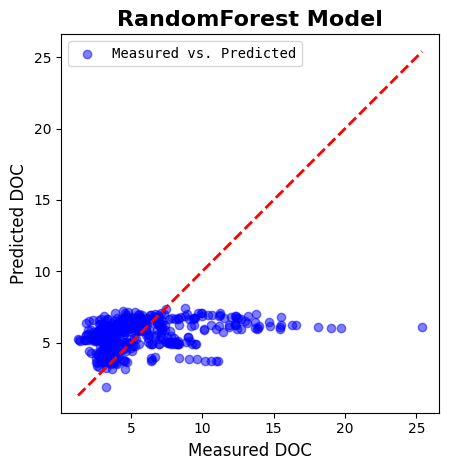

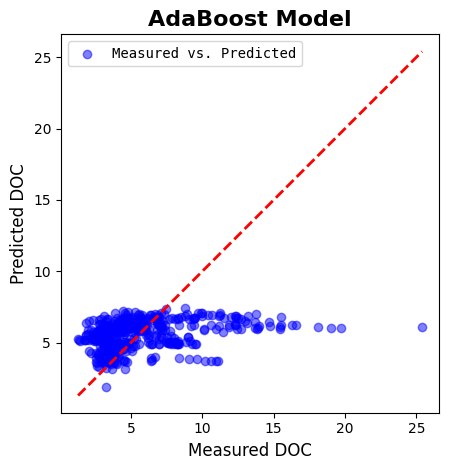

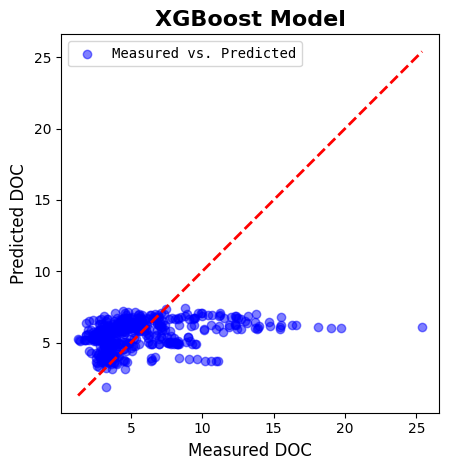

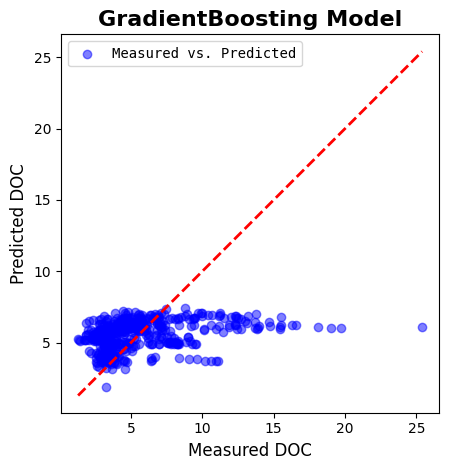

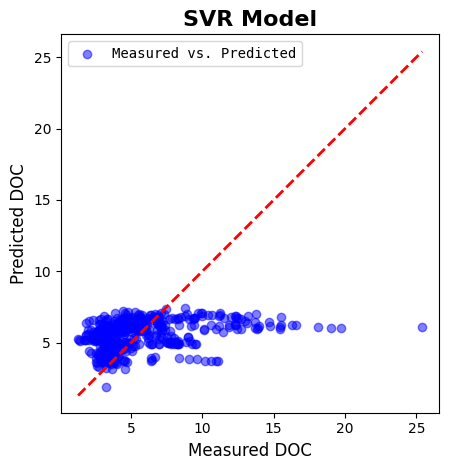

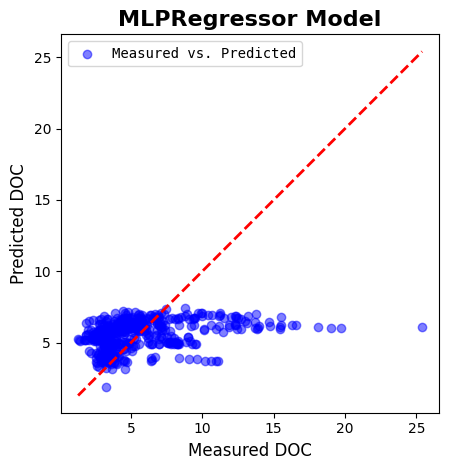

In [26]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager

# Initialize the font properties
title_font = font_manager.FontProperties(family='sans-serif', style='normal', size=16, weight='bold')
axis_label_font = font_manager.FontProperties(family='sans-serif', style='normal', size=12)
legend_font = font_manager.FontProperties(family='monospace', style='normal', size=10)

# Loop through each model and create the plots
for model_name, model in models.items():
    # Create a subplot for the current model
    fig, ax = plt.subplots()
    
    # Plot measured DOC vs. predicted DOC
    ax.scatter(data_test['original_DOC'], data_test['predicted_DOC'], label='Measured vs. Predicted', c='b', alpha=0.5)
    
    # Customize the plot
    ax.set_title(f'{model_name} Model', fontproperties=title_font)
    ax.set_xlabel('Measured DOC', fontproperties=axis_label_font)
    ax.set_ylabel('Predicted DOC', fontproperties=axis_label_font)
    
    # Add legend
    ax.legend(loc='upper left', prop=legend_font)

    # Set a 1:1 aspect ratio for the plot
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
    ax.set_aspect('equal')

    # Display the plot
    plt.tight_layout()
    plt.show()


In [27]:
import numpy as np
# Coefficients
a1 = -0.5986
a2 = 5.5510

#Martins et all (2018) landsat 5

# Calculate the B4/B1 ratio and add it as a new column to the DataFrame
df_all_lakes['B4_B1_Ratio'] = df_all_lakes['nir'] / df_all_lakes['blue']

# Apply the equation to estimate CDOM at 485 nm
df_all_lakes['aCDOM_485'] = a1 + a2 * (df_all_lakes['B4_B1_Ratio'])



In [28]:
df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)


merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
# Drop rows with null values in the merged dataframe
merged_data.dropna(inplace=True)

merged_data = merged_data.dropna(subset=['blue'])

merged_data = merged_data.dropna(subset=['DOC_MG_L'])

# merged_data = merged_data[merged_data['PROGRAM_ID'] == 'LTM_ALTM']
merged_data

SITE_ID   DATE_SMP   DOC_MG_L PROGRAM_ID         SITE_NAME  \
262    1A1-052 1985-07-22   5.000000   LTM_ALTM      Arbutus Pond   
263    1A2-077 1985-07-22   3.300000   LTM_ALTM        Clear Pond   
264    1A1-107 1985-07-22  13.800000   LTM_ALTM  Little Echo Pond   
265    1A1-102 1985-07-22   3.000000   LTM_ALTM        Heart Lake   
286    1A1-102 1985-10-26   3.300000   LTM_ALTM        Heart Lake   
...        ...        ...        ...        ...               ...   
17550  1A3-001 2020-07-06   5.467659   LTM_ALTM         Nate Pond   
17552  1A1-111 2020-07-07  10.539715   LTM_ALTM       Squash Pond   
17553  1A1-105 2020-07-07   6.066766   LTM_ALTM      Cascade Lake   
17745  1A1-111 2021-05-06  11.240100   LTM_ALTM       Squash Pond   
17755   040576 2021-05-13   4.763200   LTM_ALTM        Woods Lake   

       LAKE_DEPTH_MEAN     LATDD     LONDD  LATDD_CENT  LONDD_CENT  ...  \
262                2.8  43.98230 -74.23556    43.98787   -74.24151  ...   
263                9.2  43.99568 -73.83082    43.99719   -73.82435  ...   
264                2.9  44.30576 -74.35721    44.30849   -74.35564  ...   
265                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
286                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
...                ...       ...       ...         ...         ...  ...   
17550              2.3  43.85890 -74.09377    43.85752   -74.09038  ...   
17552              1.4  43.82557 -74.88614    43.82649   -74.88699  ...   
17553              4.2  43.78910 -74.81204    43.79039   -74.80236  ...   
17745              1.4  43.82557 -74.88614    43.82649   -74.88699  ...   
17755              3.5  43.86566 -74.95512    43.87003   -74.95232  ...   

           blue     green       nir       red     swir1     swir2      temp  \
262    0.128595  0.123144  0.076929  0.117747  0.095818  0.025074  0.726313   
263    0.126698  0.121224  0.075058  0.115133  0.096143  0.024645  0.722627   
264    0.122378  0.117020  0.068582  0.111287  0.094297  0.020471  0.727110   
265    0.126727  0.122216  0.069994  0.114658  0.093080  0.020675  0.714631   
286    0.132439  0.129428  0.096466  0.124544  0.147169  0.064444  0.542254   
...         ...       ...       ...       ...       ...       ...       ...   
17550  0.124077  0.122417  0.133085  0.115168  0.140215  0.044704  0.772938   
17552  0.126934  0.125234  0.146482  0.117933  0.168615  0.065899  0.814839   
17553  0.129365  0.126863  0.139887  0.116969  0.151607  0.049878  0.790781   
17745  0.124165  0.121782  0.115204  0.118765  0.155397  0.066517  0.586064   
17755  0.136348  0.132341  0.090376  0.130652  0.169313  0.089310  0.618606   

       LAKE_LABEL  B4_B1_Ratio  aCDOM_485  
262          32.0     0.598230   2.722175  
263          52.0     0.592414   2.689893  
264         146.0     0.560410   2.512238  
265         105.0     0.552319   2.467324  
286         105.0     0.728377   3.444620  
...           ...          ...        ...  
17550       154.0     1.072597   5.355388  
17552        17.0     1.154000   5.807252  
17553       111.0     1.081333   5.403881  
17745        17.0     0.927828   4.551771  
17755       127.0     0.662830   3.080769  

[836 rows x 21 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


R^2: 0.03174686272903149
RMSE: 0.9736022958059714


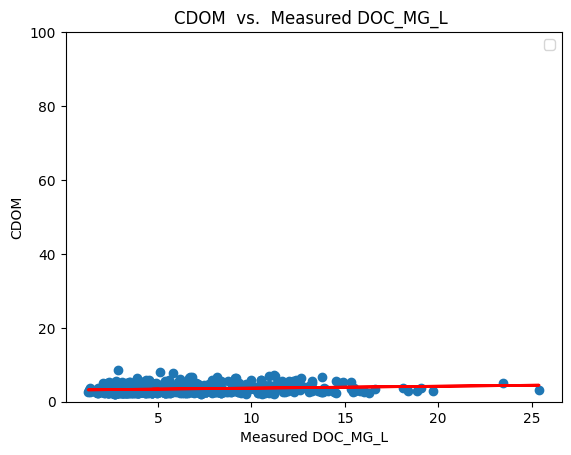

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = merged_data['DOC_MG_L'].values.reshape(-1, 1)
y = merged_data['aCDOM_485'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(merged_data['DOC_MG_L'], merged_data['aCDOM_485'])
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('CDOM  vs.  Measured DOC_MG_L ')
plt.legend()
plt.ylim(0,100)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


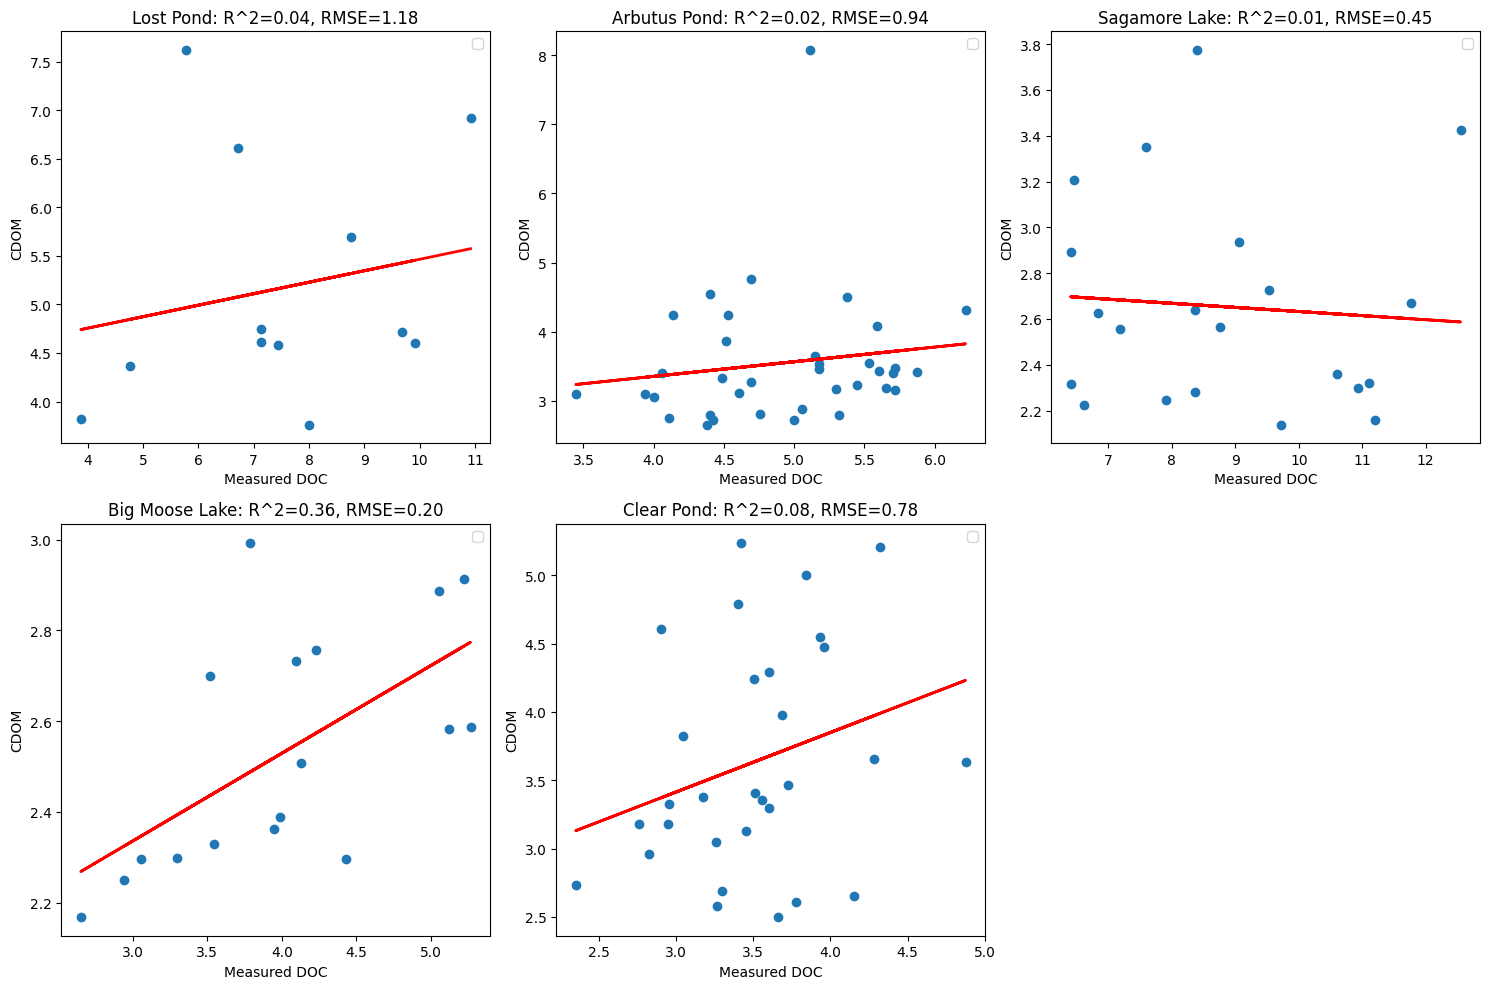

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'aCDOM_485'  # Replace with the actual column name for aCDOM_485

# Create a list of lakes
lakes = ["Lost Pond", "Arbutus Pond", "Sagamore Lake", "Big Moose Lake", "Clear Pond"]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(lakes)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for all lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(lakes):
    # Filter the data for the current lake
    lake_data = merged_data[merged_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(len(lakes), num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

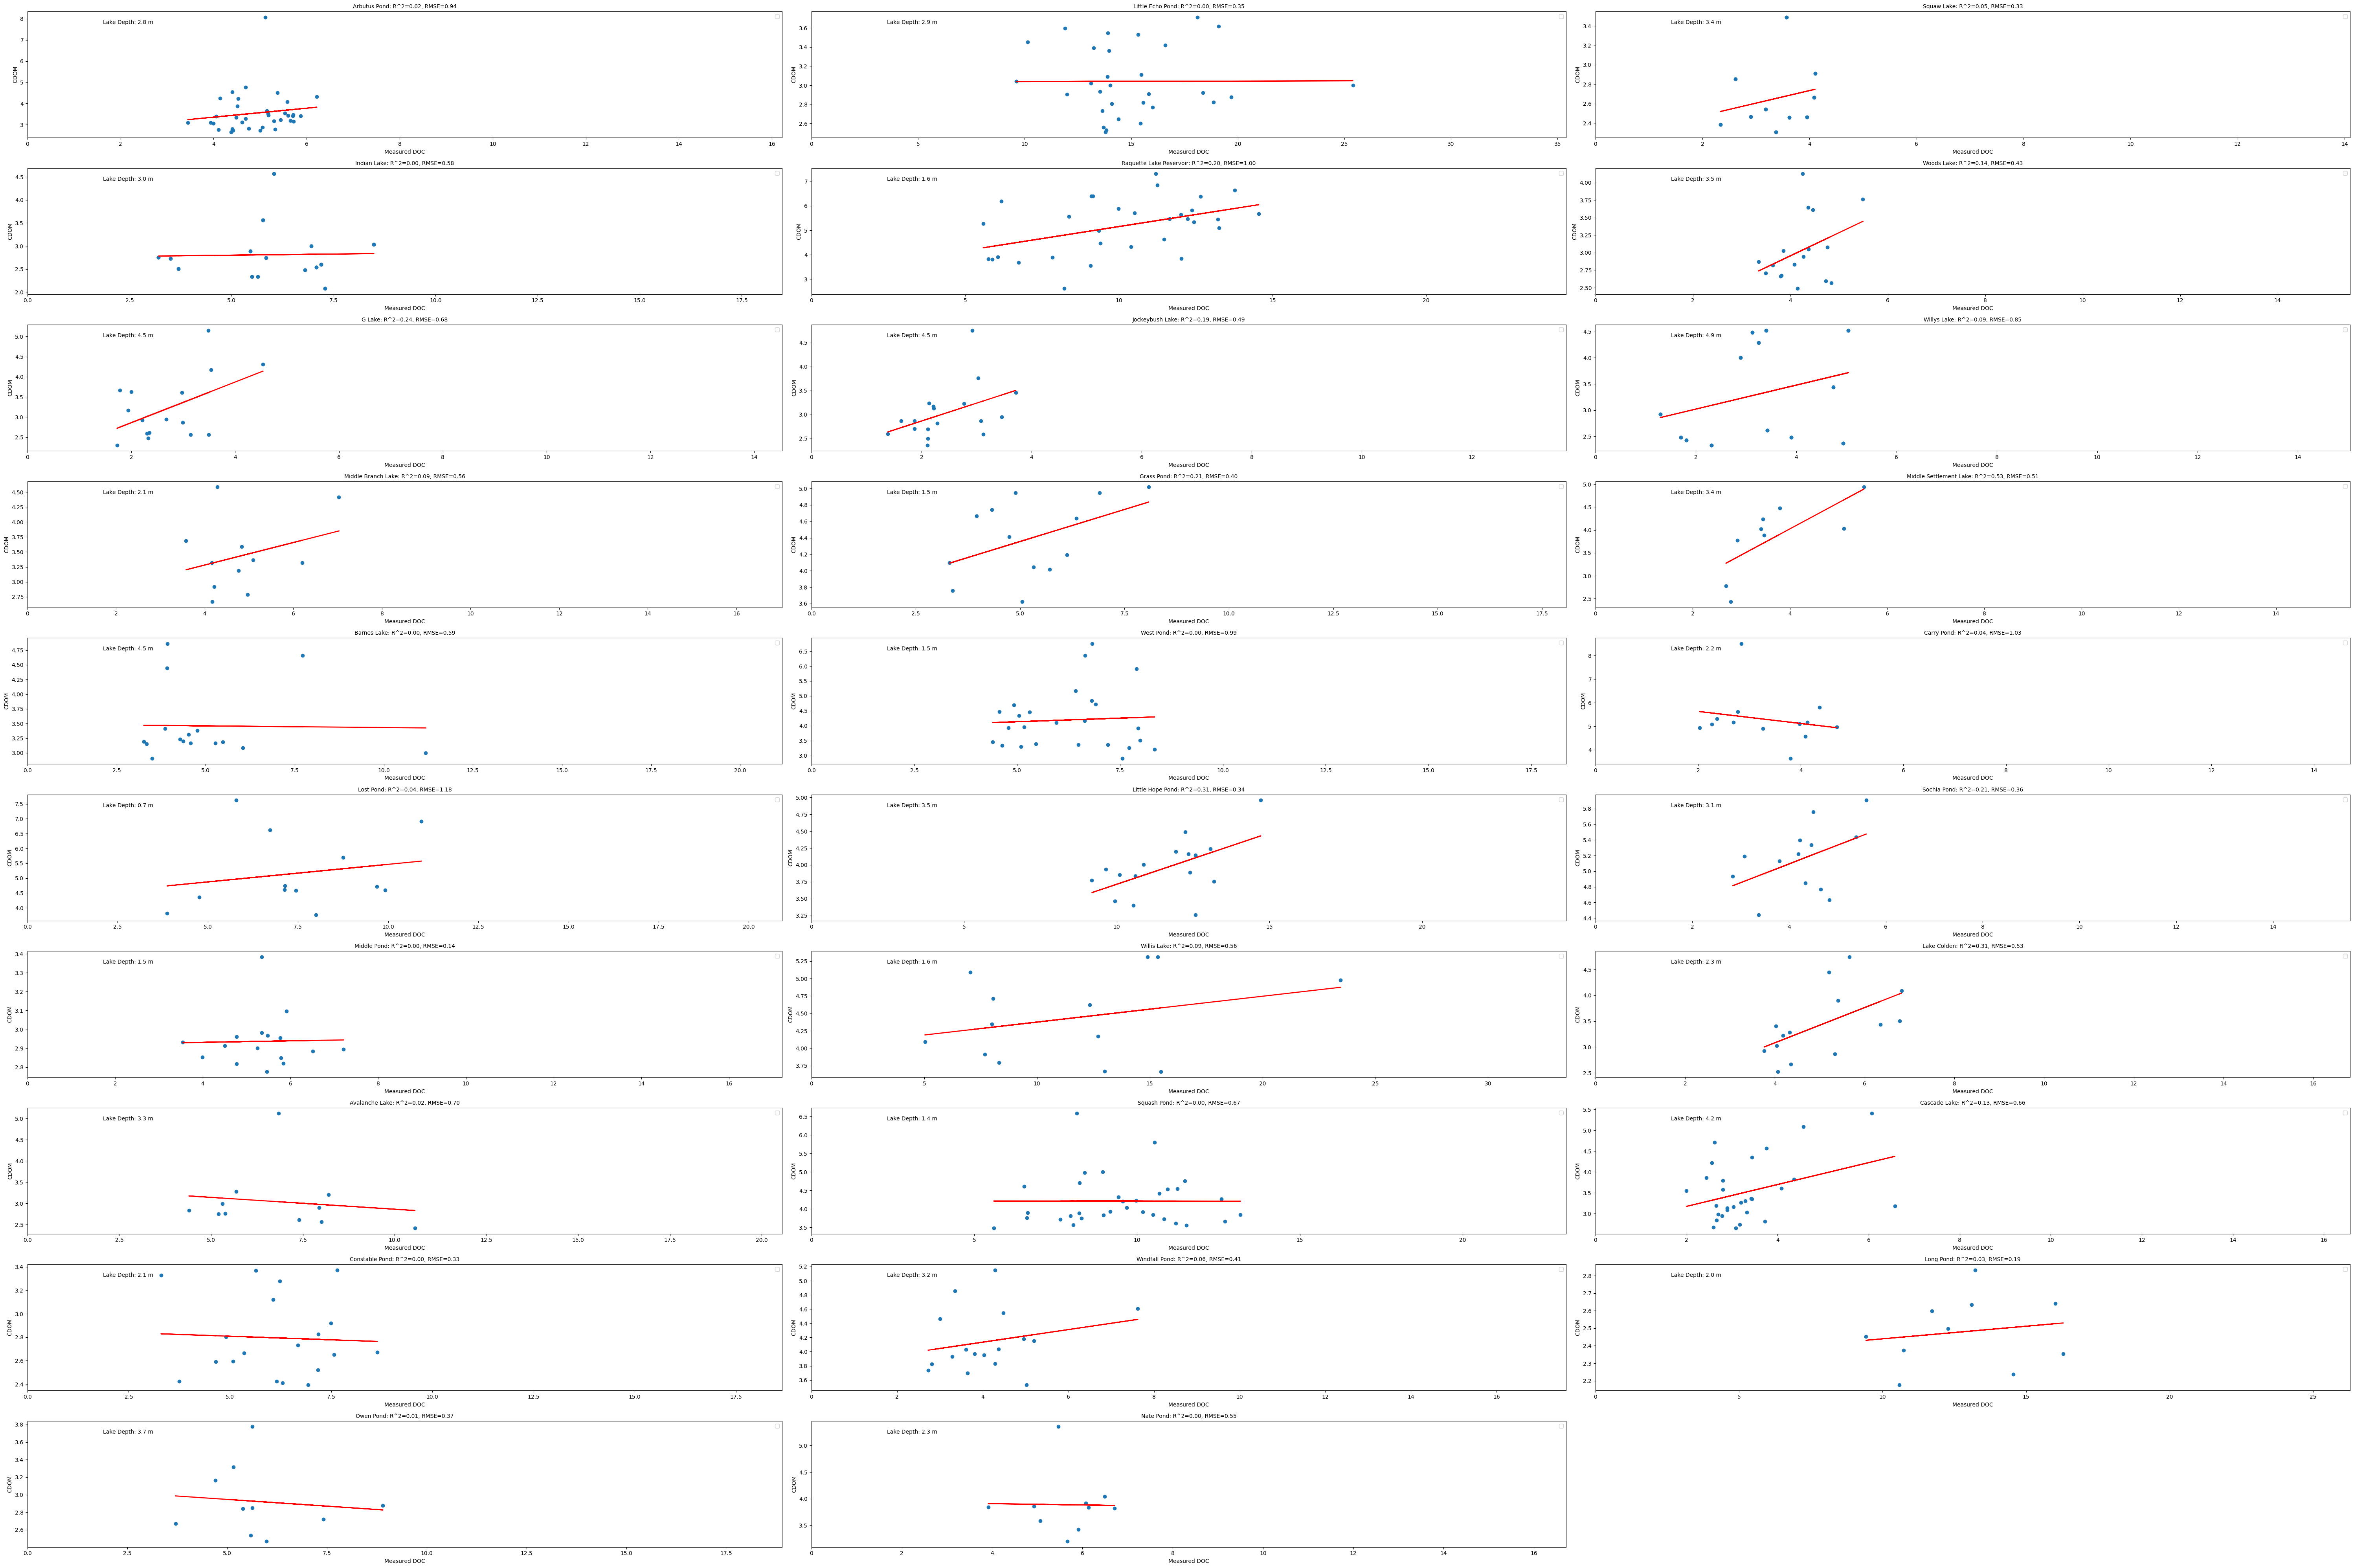

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'aCDOM_485'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) less than or equal to 5
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] <= 5]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

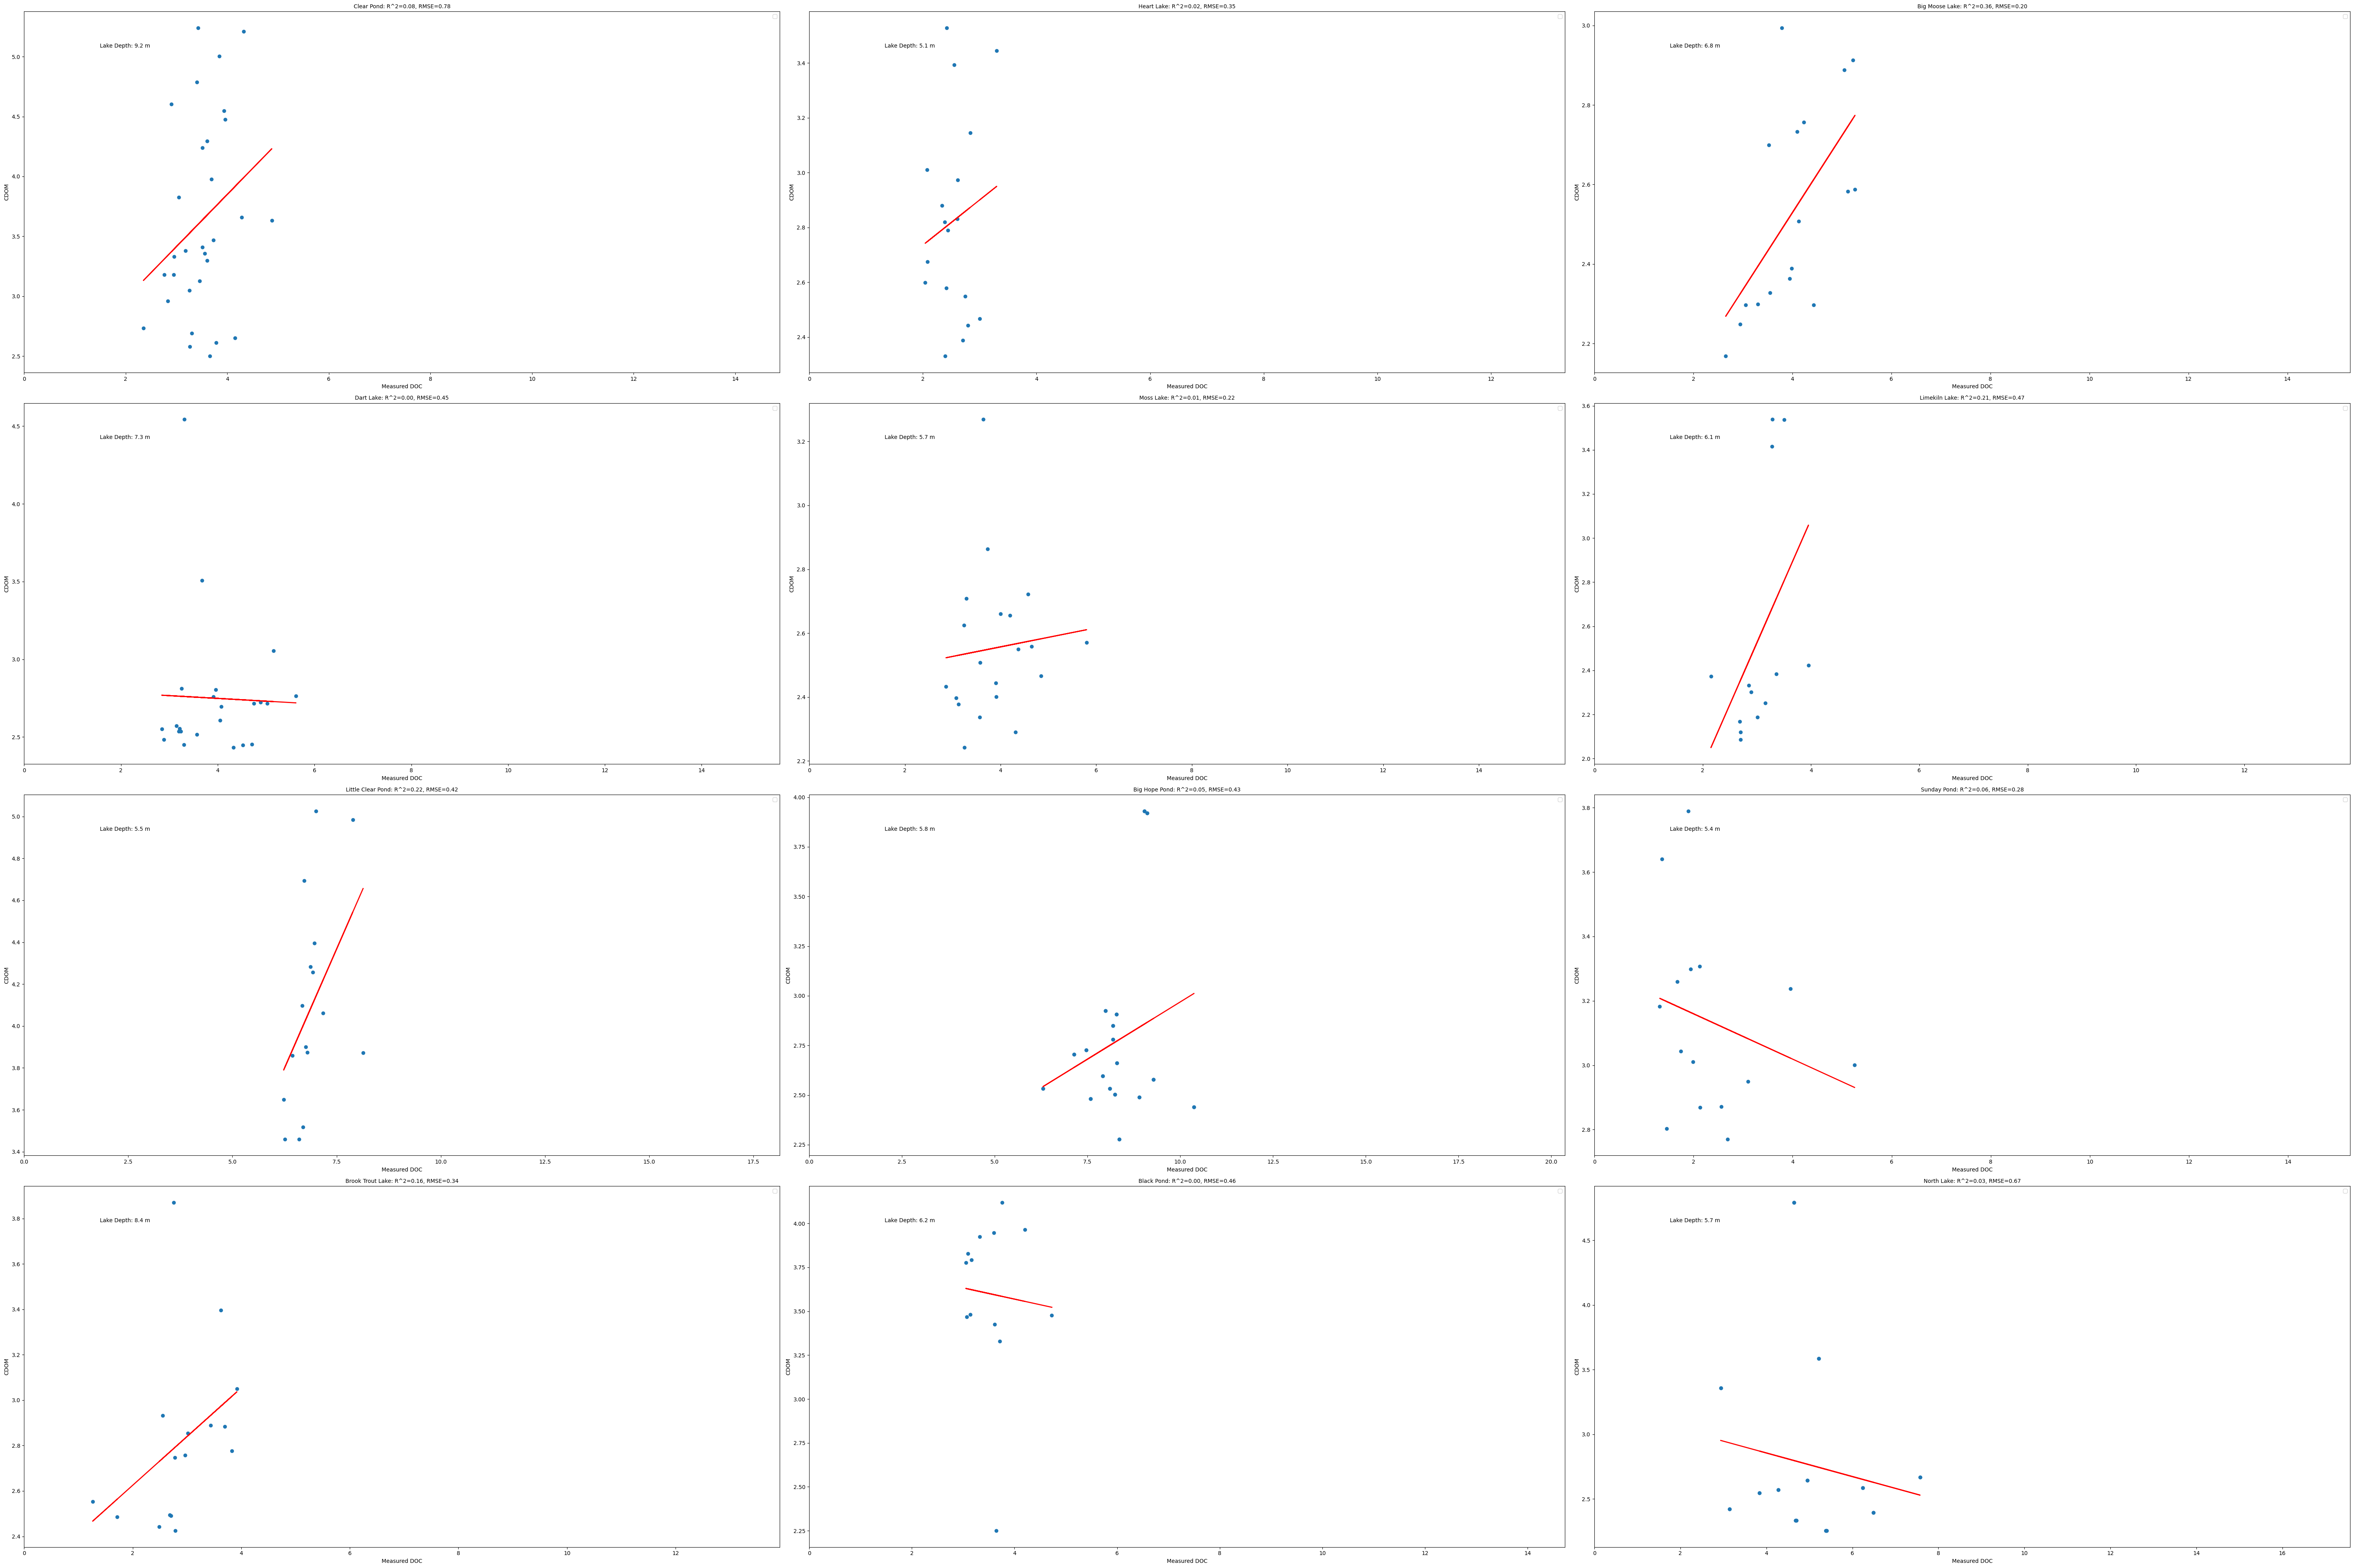

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'aCDOM_485'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) between 5 and 10
filtered_data = merged_data[(merged_data['LAKE_DEPTH_MEAN'] > 5) & (merged_data['LAKE_DEPTH_MEAN'] < 10)]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


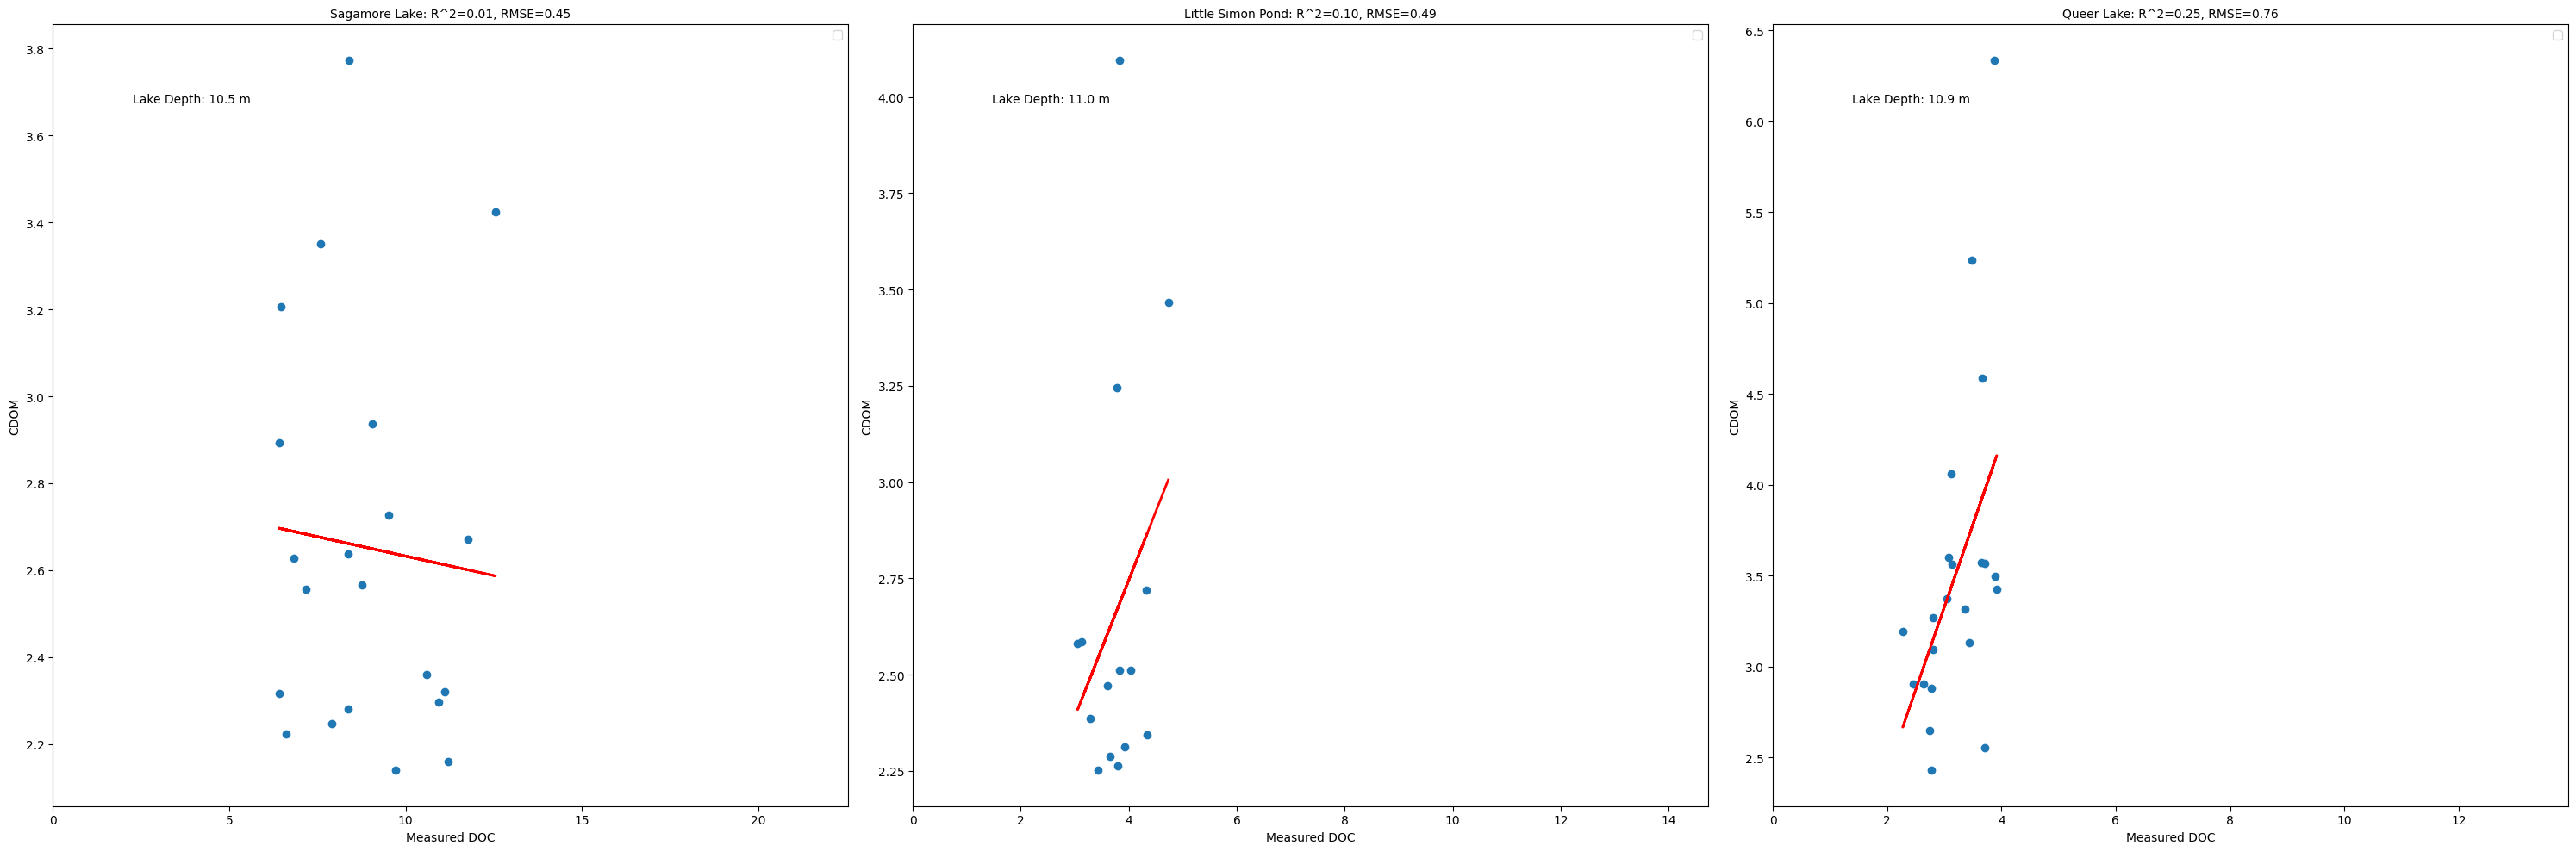

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'aCDOM_485'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) greater than 10
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] > 10]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


In [34]:
import numpy as np

# Define the coefficients
a1 = 0.42
a2 = 1.79
a3 = 6.07

#olmanson (landsat 8)
df_all_lakes['Rrs_ratio1'] = df_all_lakes['red'] / df_all_lakes['green']
df_all_lakes['Rrs_ratio2'] = df_all_lakes['nir'] / df_all_lakes['green']

# Apply the equation
df_all_lakes['ln_a440'] = a1 * df_all_lakes['Rrs_ratio1'] + a2 * df_all_lakes['Rrs_ratio2'] +a3



In [35]:
df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)


merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
# Drop rows with null values in the merged dataframe
merged_data.dropna(inplace=True)

merged_data = merged_data.dropna(subset=['blue'])

merged_data = merged_data.dropna(subset=['DOC_MG_L'])

# merged_data = merged_data[merged_data['PROGRAM_ID'] == 'LTM_ALTM']
merged_data

SITE_ID   DATE_SMP   DOC_MG_L PROGRAM_ID         SITE_NAME  \
262    1A1-052 1985-07-22   5.000000   LTM_ALTM      Arbutus Pond   
263    1A2-077 1985-07-22   3.300000   LTM_ALTM        Clear Pond   
264    1A1-107 1985-07-22  13.800000   LTM_ALTM  Little Echo Pond   
265    1A1-102 1985-07-22   3.000000   LTM_ALTM        Heart Lake   
286    1A1-102 1985-10-26   3.300000   LTM_ALTM        Heart Lake   
...        ...        ...        ...        ...               ...   
17550  1A2-077 2020-07-06   3.841942   LTM_ALTM        Clear Pond   
17551  1A1-105 2020-07-07   6.066766   LTM_ALTM      Cascade Lake   
17552  1A1-111 2020-07-07  10.539715   LTM_ALTM       Squash Pond   
17746  1A1-111 2021-05-06  11.240100   LTM_ALTM       Squash Pond   
17755   040576 2021-05-13   4.763200   LTM_ALTM        Woods Lake   

       LAKE_DEPTH_MEAN     LATDD     LONDD  LATDD_CENT  LONDD_CENT  ...  \
262                2.8  43.98230 -74.23556    43.98787   -74.24151  ...   
263                9.2  43.99568 -73.83082    43.99719   -73.82435  ...   
264                2.9  44.30576 -74.35721    44.30849   -74.35564  ...   
265                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
286                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
...                ...       ...       ...         ...         ...  ...   
17550              9.2  43.99568 -73.83082    43.99719   -73.82435  ...   
17551              4.2  43.78910 -74.81204    43.79039   -74.80236  ...   
17552              1.4  43.82557 -74.88614    43.82649   -74.88699  ...   
17746              1.4  43.82557 -74.88614    43.82649   -74.88699  ...   
17755              3.5  43.86566 -74.95512    43.87003   -74.95232  ...   

            red     swir1     swir2      temp  LAKE_LABEL  B4_B1_Ratio  \
262    0.117747  0.095818  0.025074  0.726313        32.0     0.598230   
263    0.115133  0.096143  0.024645  0.722627        52.0     0.592414   
264    0.111287  0.094297  0.020471  0.727110       146.0     0.560410   
265    0.114658  0.093080  0.020675  0.714631       105.0     0.552319   
286    0.124544  0.147169  0.064444  0.542254       105.0     0.728377   
...         ...       ...       ...       ...         ...          ...   
17550  0.116358  0.144780  0.049803  0.781051        52.0     1.009036   
17551  0.116969  0.151607  0.049878  0.790781       111.0     1.081333   
17552  0.117933  0.168615  0.065899  0.814839        17.0     1.154000   
17746  0.118765  0.155397  0.066517  0.586064        17.0     0.927828   
17755  0.130652  0.169313  0.089310  0.618606       127.0     0.662830   

       aCDOM_485  Rrs_ratio1  Rrs_ratio2   ln_a440  
262     2.722175    0.956172    0.624711  7.589825  
263     2.689893    0.949761    0.619167  7.577208  
264     2.512238    0.951011    0.586069  7.518489  
265     2.467324    0.938157    0.572704  7.489166  
286     3.444620    0.962265    0.745322  7.808278  
...          ...         ...         ...       ...  
17550   5.002559    0.944360    1.012521  8.279043  
17551   5.403881    0.922013    1.102661  8.431008  
17552   5.807252    0.941701    1.169663  8.559212  
17746   4.551771    0.975227    0.945989  8.172916  
17755   3.080769    0.987233    0.682899  7.707027  

[836 rows x 24 columns]

R^2: 0.03954556532634257
RMSE: 0.30261344693152303


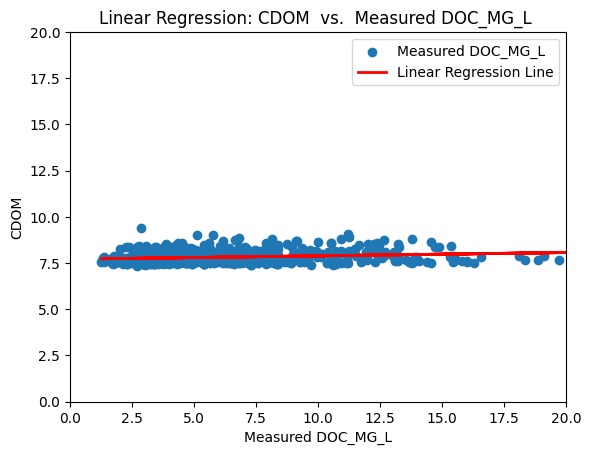

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = merged_data['DOC_MG_L'].values.reshape(-1, 1)
y = merged_data['ln_a440'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(merged_data['DOC_MG_L'], merged_data['ln_a440'],  label='Measured DOC_MG_L')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('Linear Regression: CDOM  vs.  Measured DOC_MG_L ')
plt.legend()
plt.ylim(0,20)
plt.xlim(0,20)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


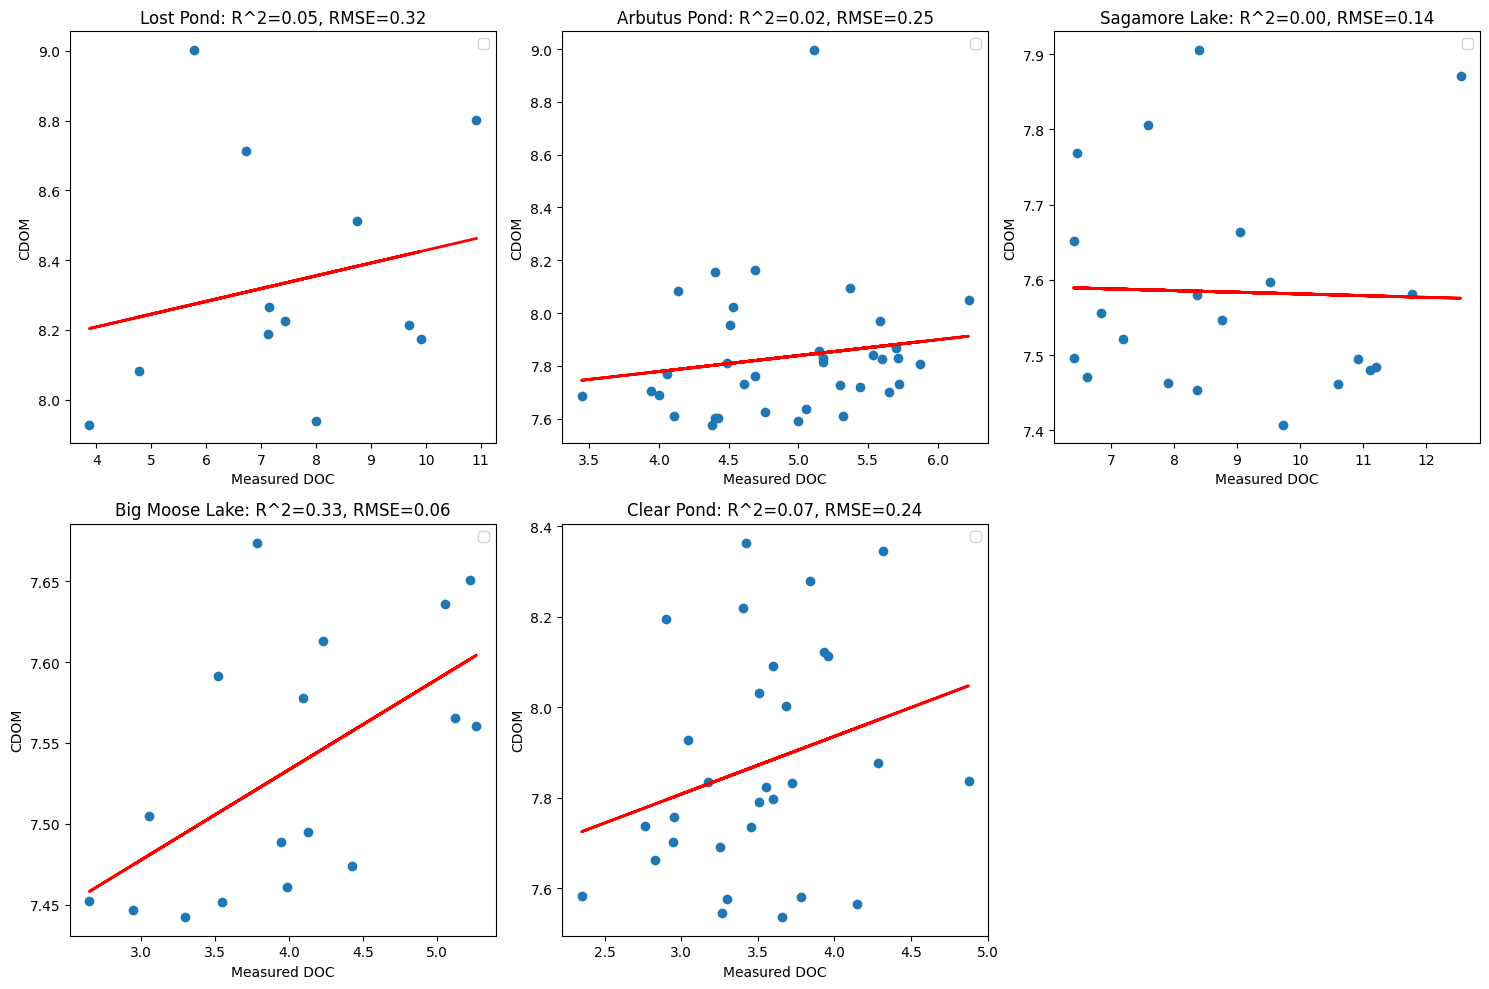

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln_a440'  # Replace with the actual column name for aCDOM_485

# Create a list of lakes
lakes = ["Lost Pond", "Arbutus Pond", "Sagamore Lake", "Big Moose Lake", "Clear Pond"]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(lakes)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for all lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(lakes):
    # Filter the data for the current lake
    lake_data = merged_data[merged_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(len(lakes), num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

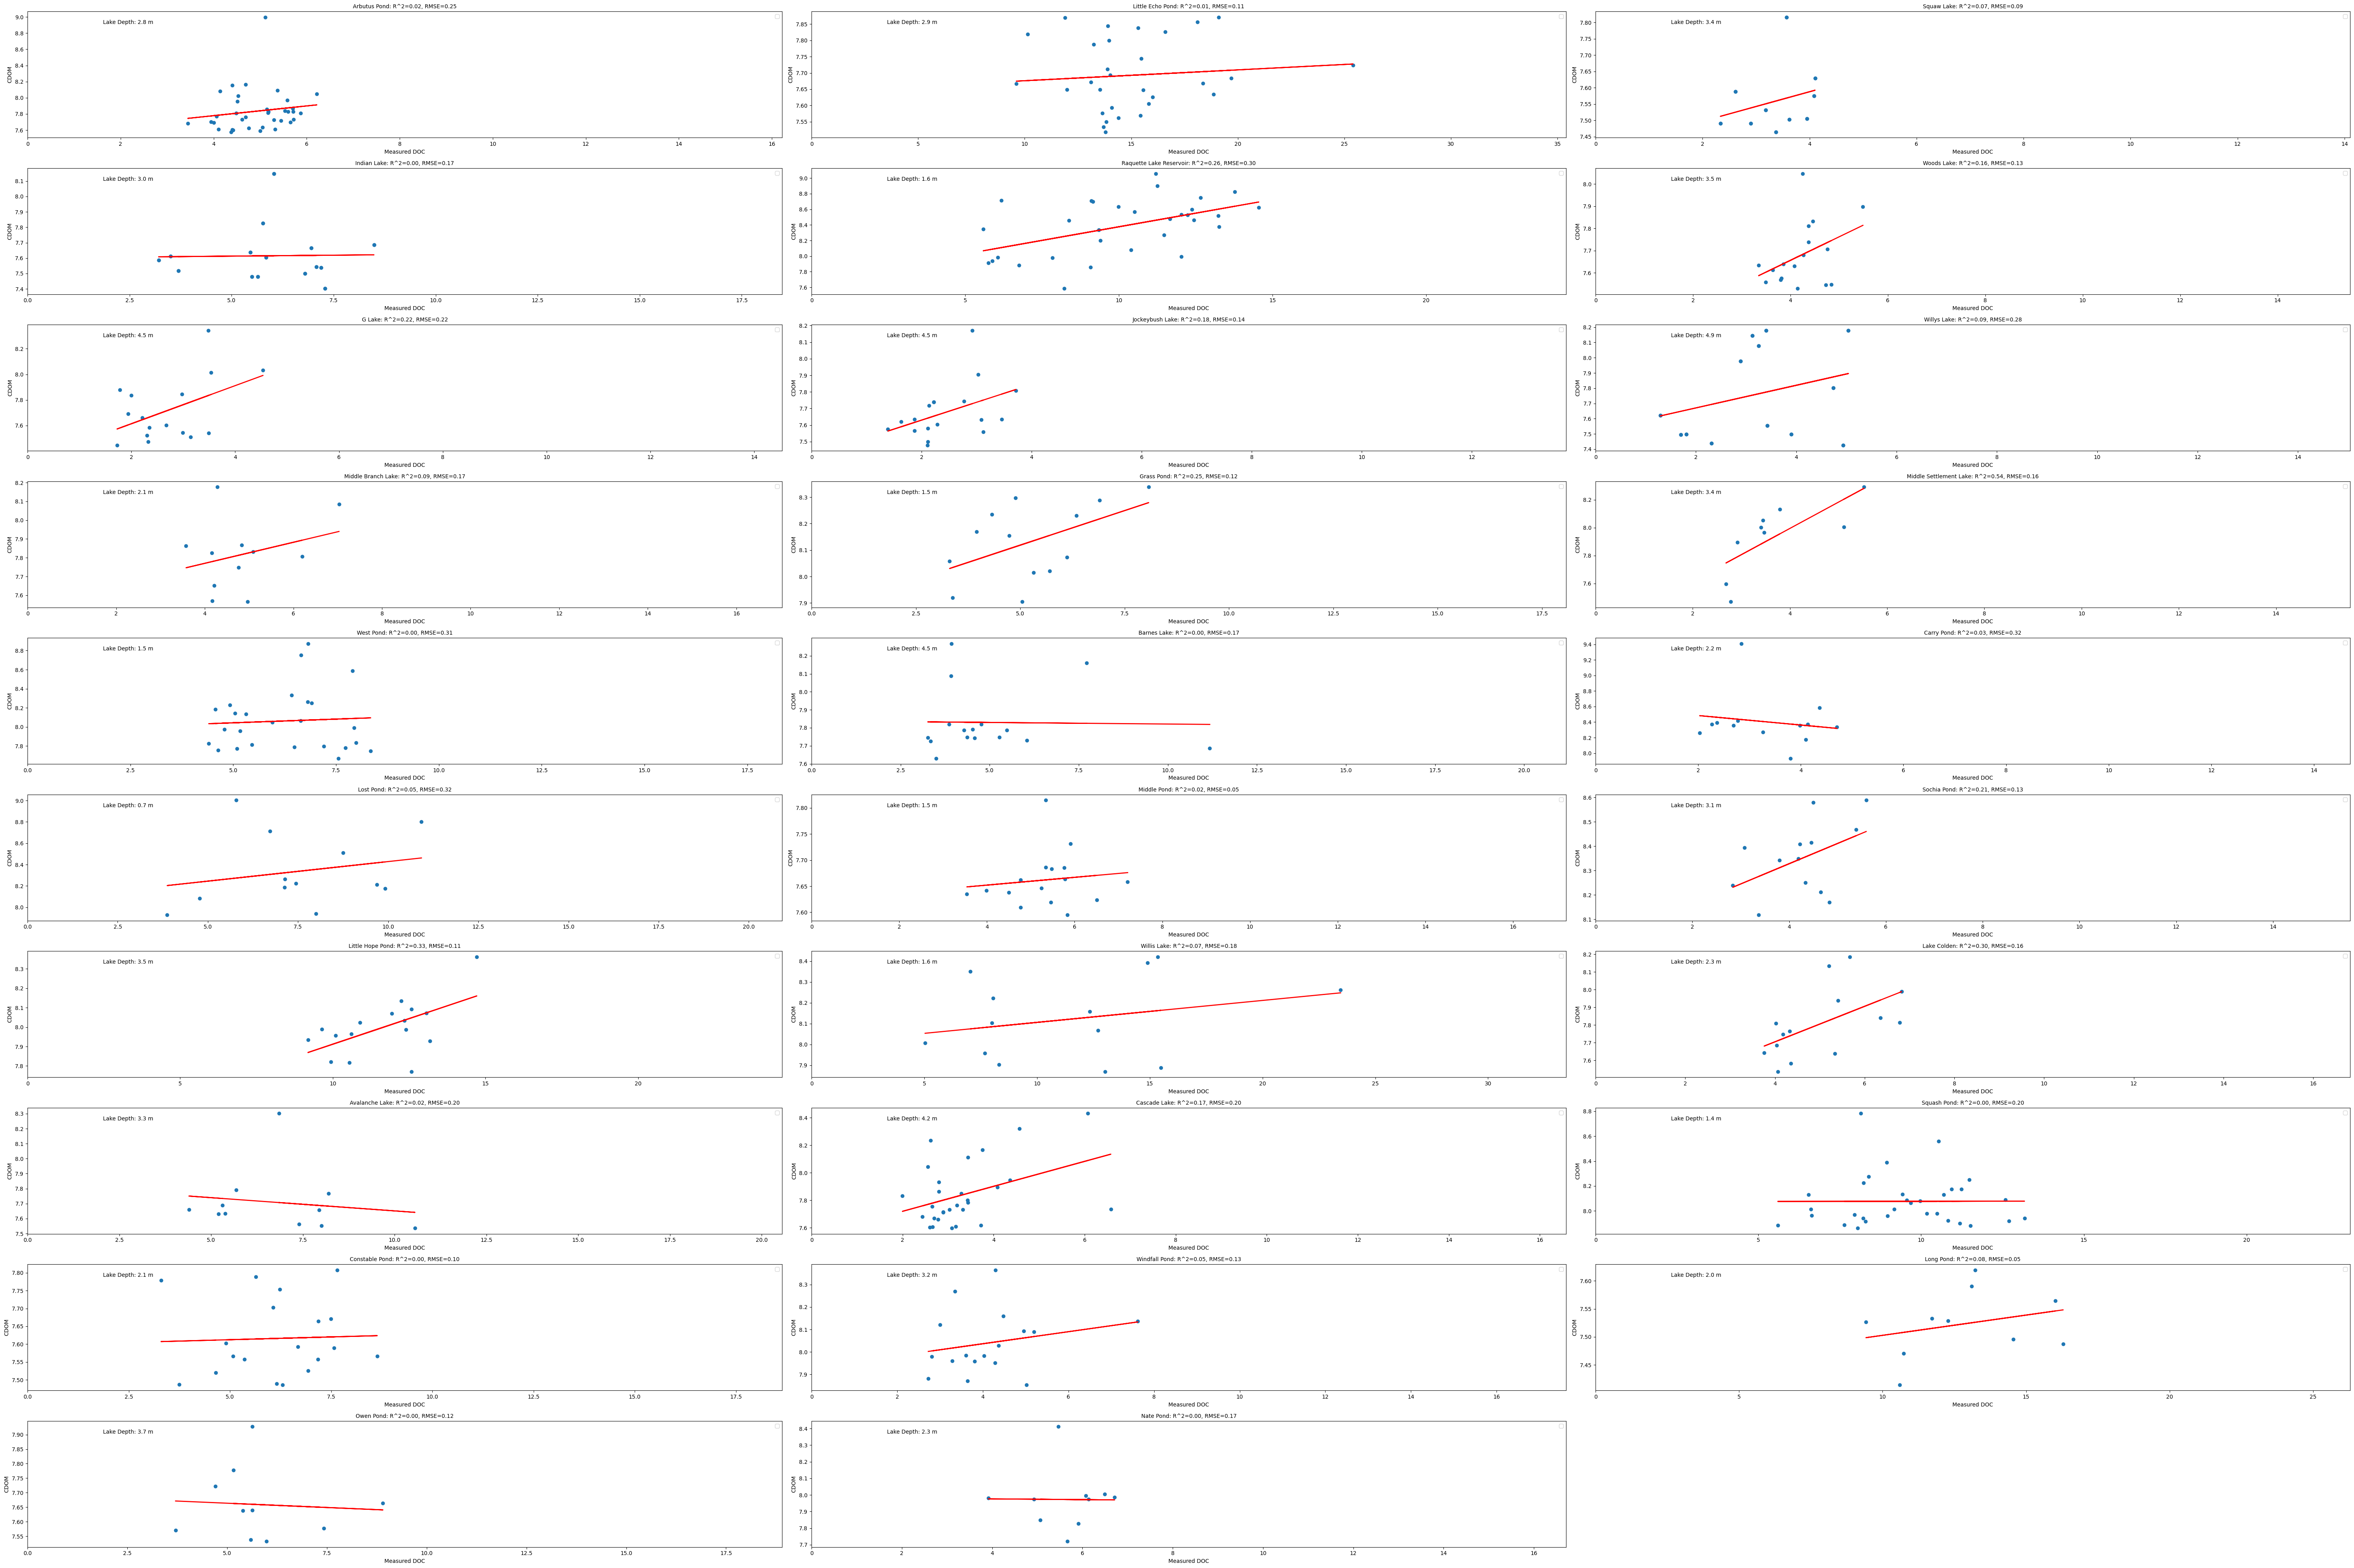

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln_a440'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) less than or equal to 5
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] <= 5]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

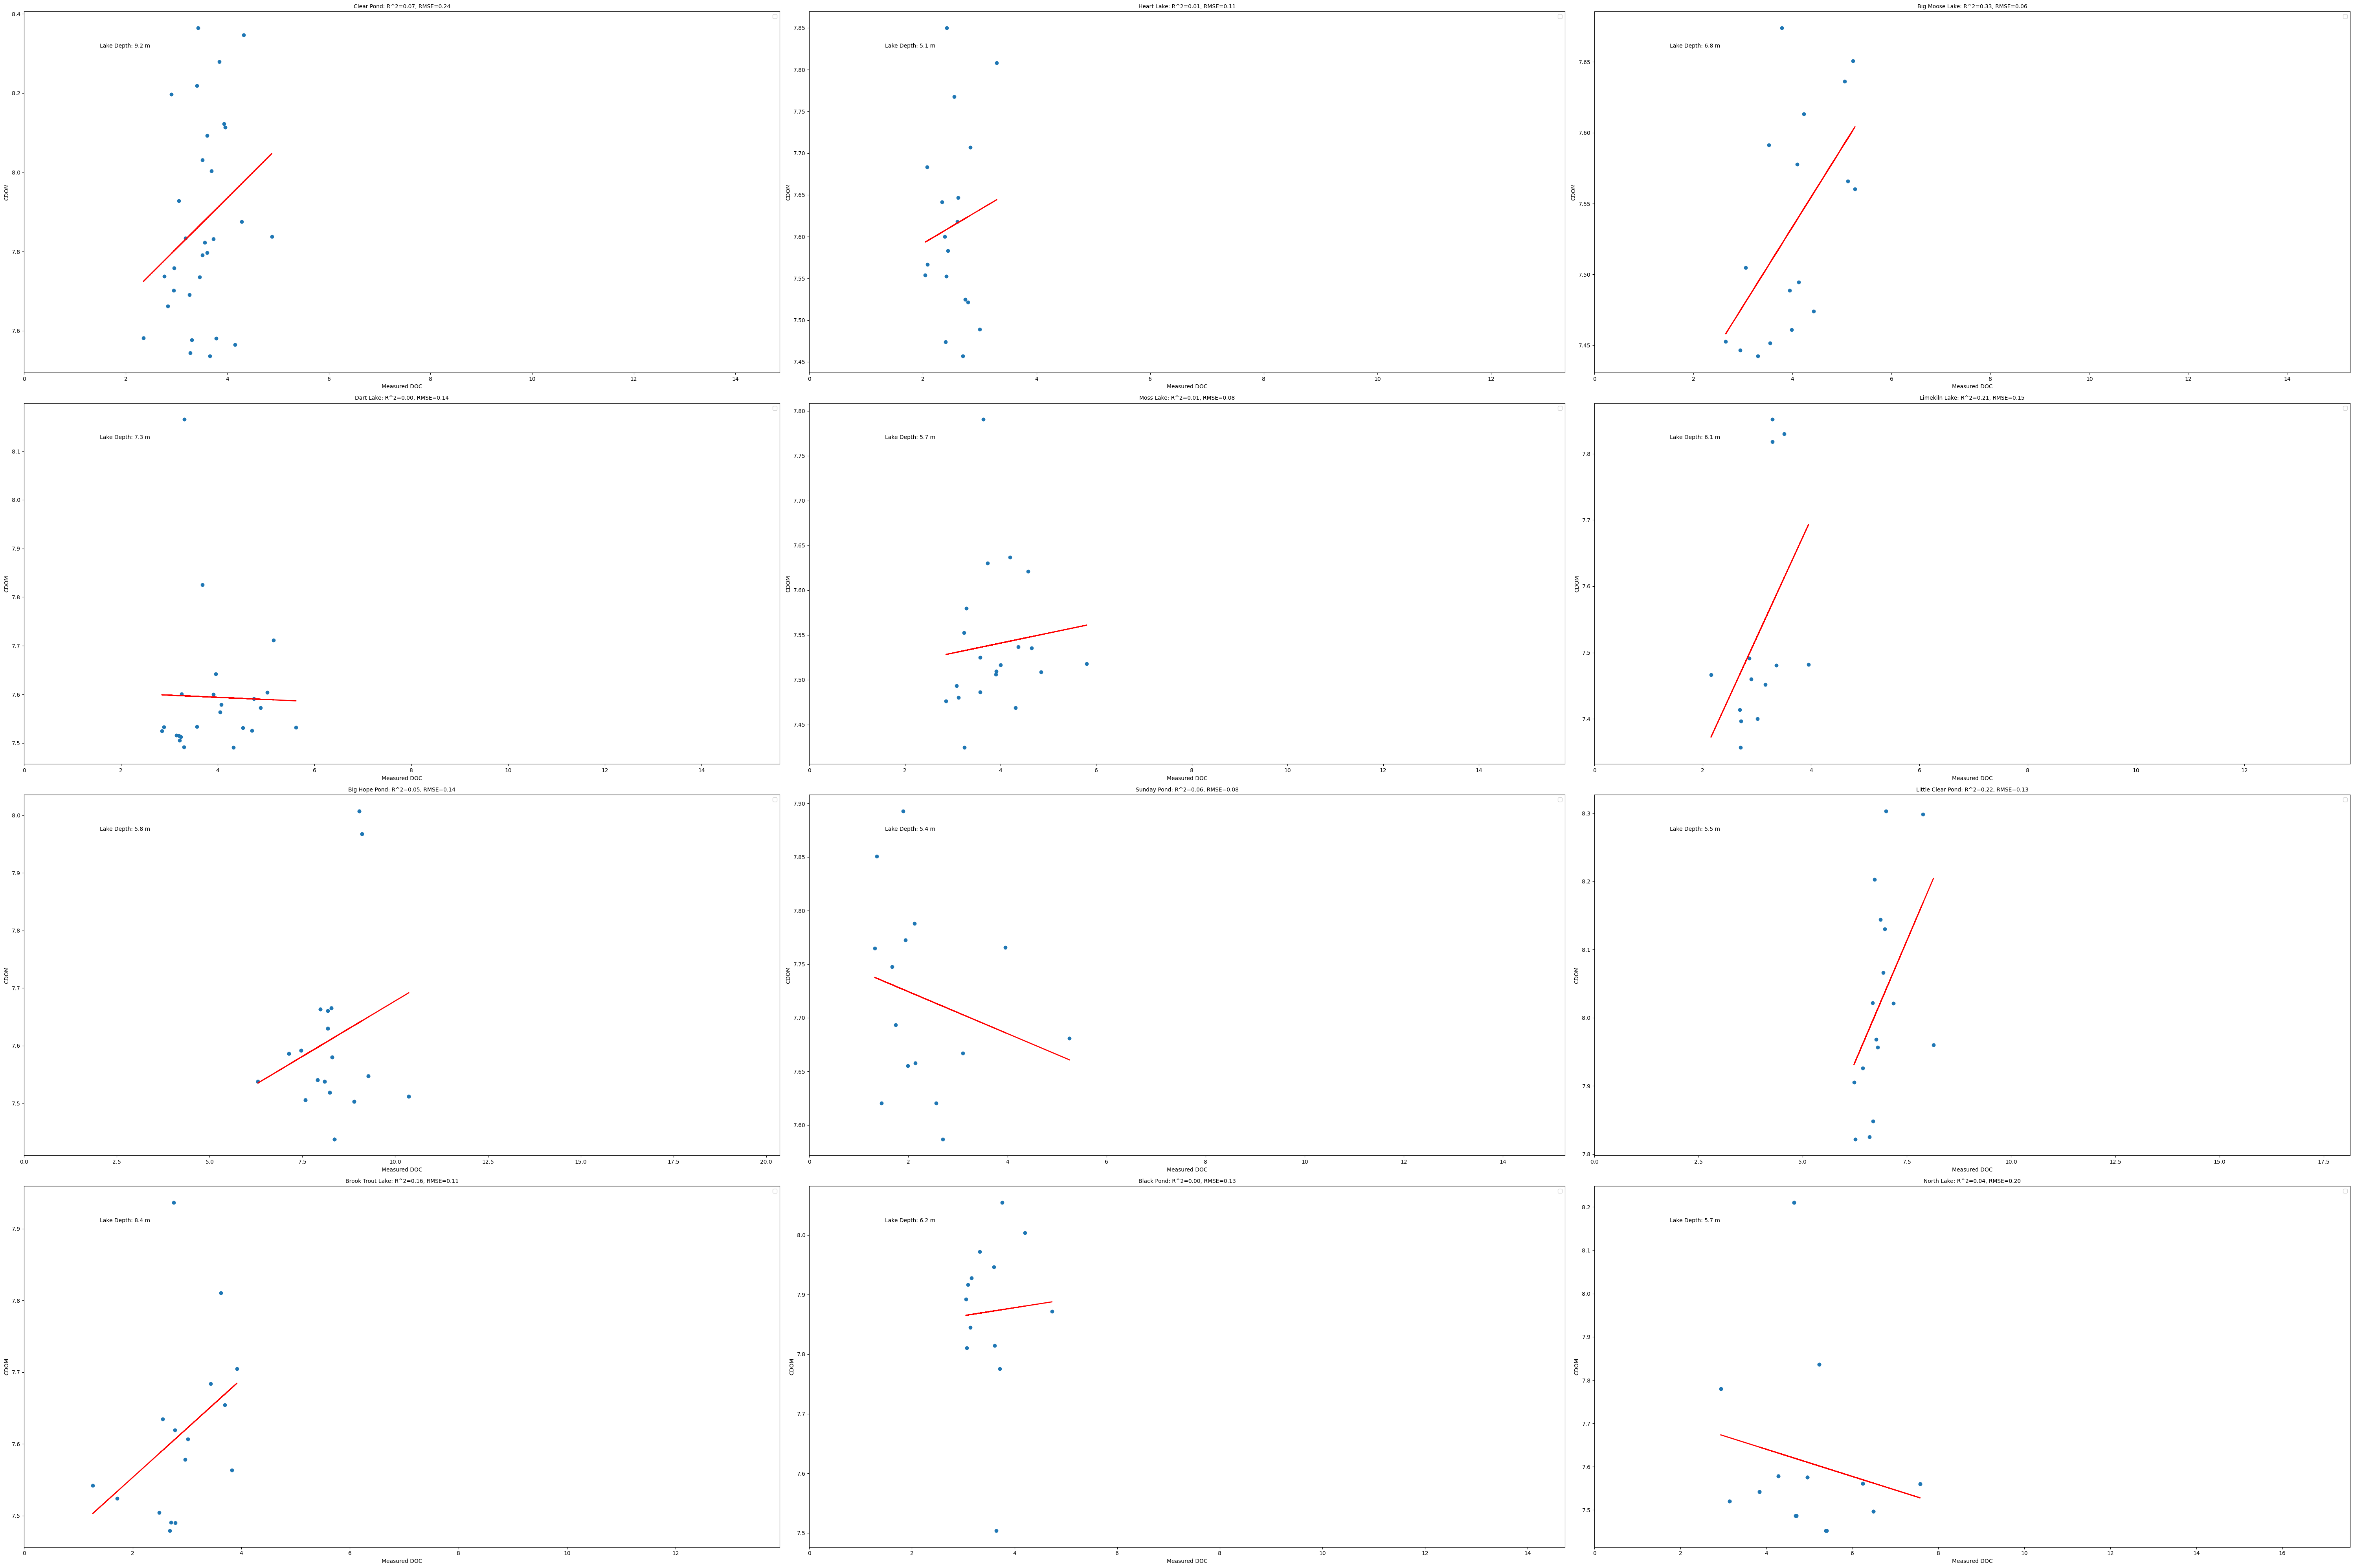

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln_a440'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) between 5 and 10
filtered_data = merged_data[(merged_data['LAKE_DEPTH_MEAN'] > 5) & (merged_data['LAKE_DEPTH_MEAN'] < 10)]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


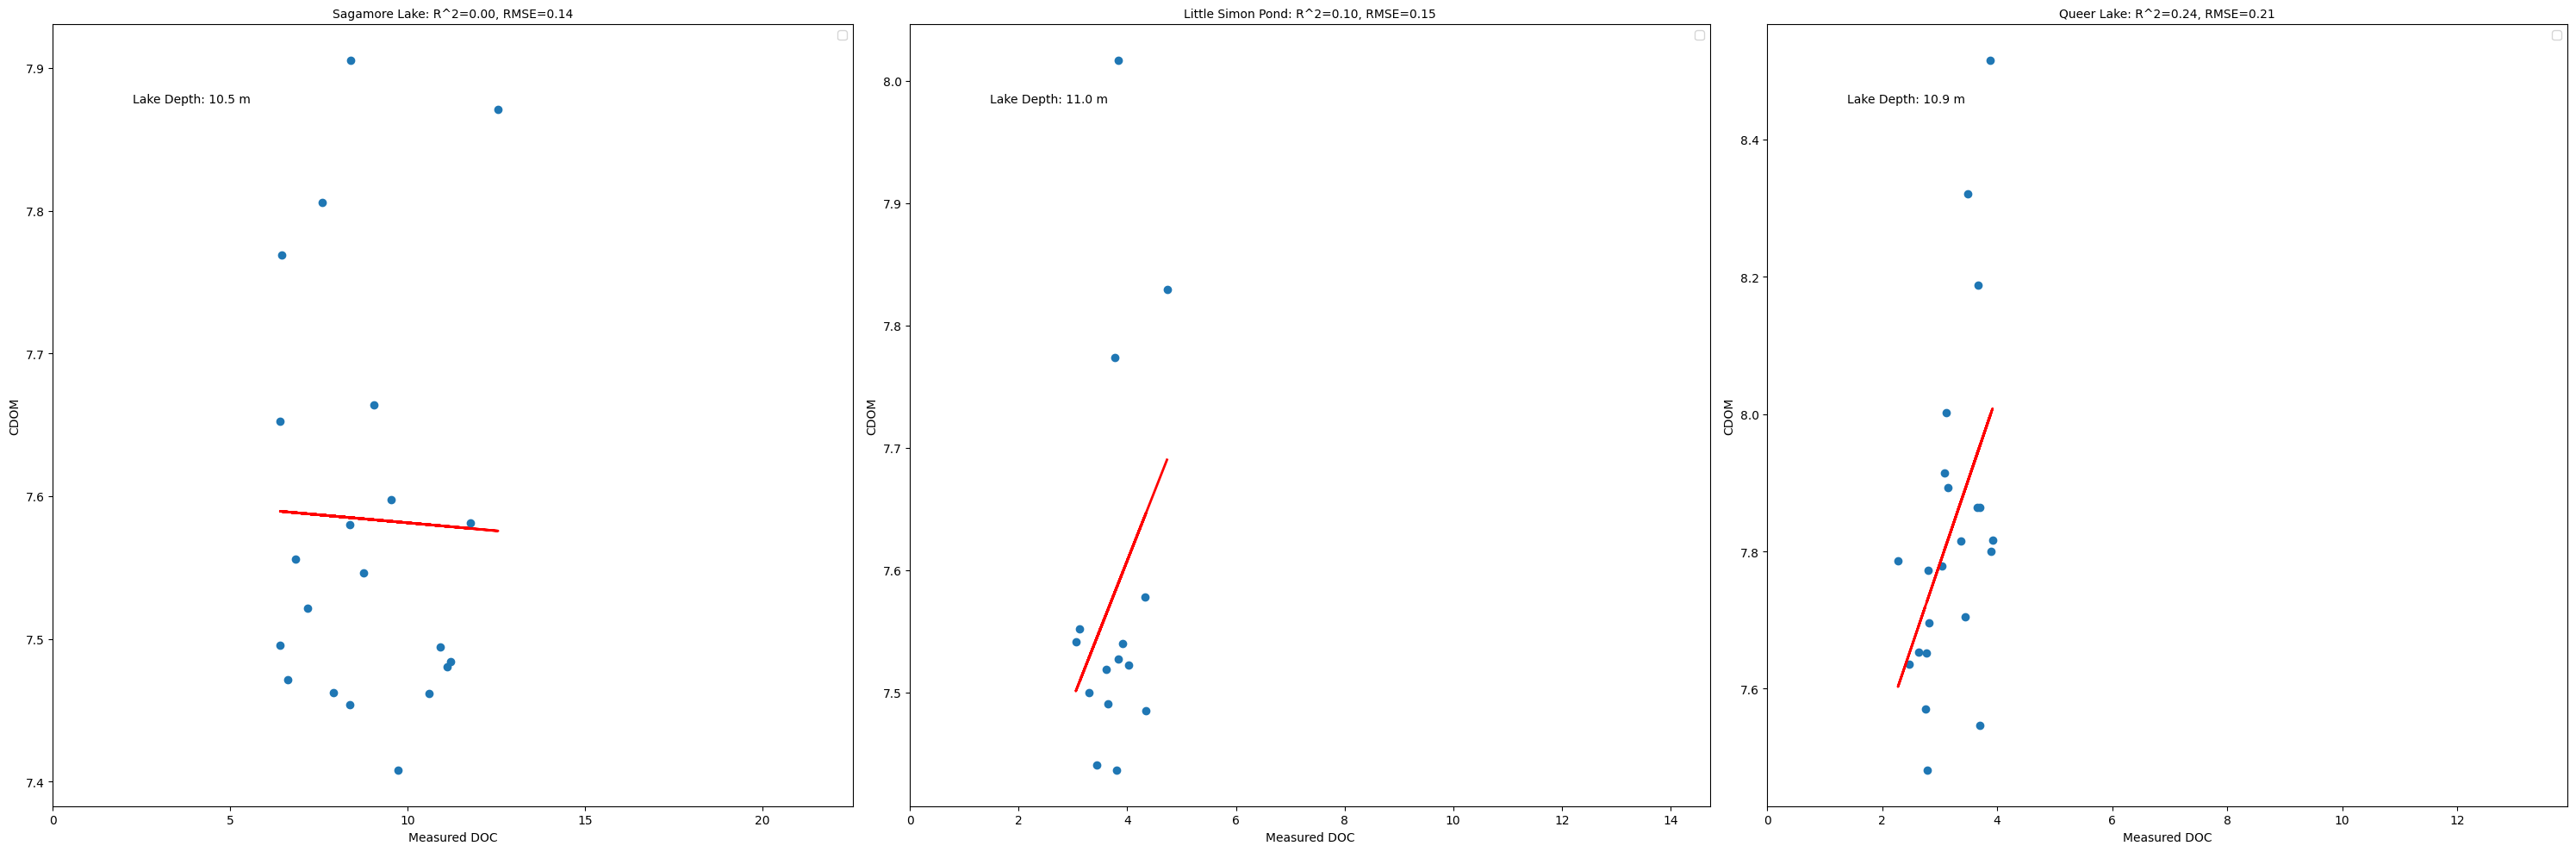

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln_a440'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) greater than 10
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] > 10]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


In [41]:
import numpy as np


#Koll-eyed et all (landsat 8) 2021

# Coefficients
a1 = 3.65
a2 = 2.91
a3 = 0.41


# Calculate ln(CDOM(a440))
df_all_lakes['ln_CDOM_a440'] = a1 - a2 * np.log(df_all_lakes['green'] / df_all_lakes['red']) - a3 * np.log(df_all_lakes['blue'])

In [42]:
df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)


merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
# Drop rows with null values in the merged dataframe
merged_data.dropna(inplace=True)

merged_data = merged_data.dropna(subset=['blue'])

merged_data = merged_data.dropna(subset=['DOC_MG_L'])

# merged_data = merged_data[merged_data['PROGRAM_ID'] == 'LTM_ALTM']
merged_data

SITE_ID   DATE_SMP   DOC_MG_L PROGRAM_ID         SITE_NAME  \
262    1A1-052 1985-07-22   5.000000   LTM_ALTM      Arbutus Pond   
263    1A2-077 1985-07-22   3.300000   LTM_ALTM        Clear Pond   
264    1A1-107 1985-07-22  13.800000   LTM_ALTM  Little Echo Pond   
265    1A1-102 1985-07-22   3.000000   LTM_ALTM        Heart Lake   
286    1A1-102 1985-10-26   3.300000   LTM_ALTM        Heart Lake   
...        ...        ...        ...        ...               ...   
17550  1A3-001 2020-07-06   5.467659   LTM_ALTM         Nate Pond   
17552  1A1-111 2020-07-07  10.539715   LTM_ALTM       Squash Pond   
17553  1A1-105 2020-07-07   6.066766   LTM_ALTM      Cascade Lake   
17745  1A1-111 2021-05-06  11.240100   LTM_ALTM       Squash Pond   
17755   040576 2021-05-13   4.763200   LTM_ALTM        Woods Lake   

       LAKE_DEPTH_MEAN     LATDD     LONDD  LATDD_CENT  LONDD_CENT  ...  \
262                2.8  43.98230 -74.23556    43.98787   -74.24151  ...   
263                9.2  43.99568 -73.83082    43.99719   -73.82435  ...   
264                2.9  44.30576 -74.35721    44.30849   -74.35564  ...   
265                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
286                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
...                ...       ...       ...         ...         ...  ...   
17550              2.3  43.85890 -74.09377    43.85752   -74.09038  ...   
17552              1.4  43.82557 -74.88614    43.82649   -74.88699  ...   
17553              4.2  43.78910 -74.81204    43.79039   -74.80236  ...   
17745              1.4  43.82557 -74.88614    43.82649   -74.88699  ...   
17755              3.5  43.86566 -74.95512    43.87003   -74.95232  ...   

          swir1     swir2      temp  LAKE_LABEL  B4_B1_Ratio  aCDOM_485  \
262    0.095818  0.025074  0.726313        32.0     0.598230   2.722175   
263    0.096143  0.024645  0.722627        52.0     0.592414   2.689893   
264    0.094297  0.020471  0.727110       146.0     0.560410   2.512238   
265    0.093080  0.020675  0.714631       105.0     0.552319   2.467324   
286    0.147169  0.064444  0.542254       105.0     0.728377   3.444620   
...         ...       ...       ...         ...          ...        ...   
17550  0.140215  0.044704  0.772938       154.0     1.072597   5.355388   
17552  0.168615  0.065899  0.814839        17.0     1.154000   5.807252   
17553  0.151607  0.049878  0.790781       111.0     1.081333   5.403881   
17745  0.155397  0.066517  0.586064        17.0     0.927828   4.551771   
17755  0.169313  0.089310  0.618606       127.0     0.662830   3.080769   

       Rrs_ratio1  Rrs_ratio2   ln_a440  ln_CDOM_a440  
262      0.956172    0.624711  7.589825      4.360526  
263      0.949761    0.619167  7.577208      4.347044  
264      0.951011    0.586069  7.518489      4.365093  
265      0.938157    0.572704  7.489166      4.311180  
286      0.962265    0.745322  7.808278      4.366934  
...           ...         ...       ...           ...  
17550    0.940783    1.087141  8.411112      4.327974  
17552    0.941701    1.169663  8.559212      4.321480  
17553    0.922013    1.102661  8.431008      4.252218  
17745    0.975227    0.945989  8.172916      4.432321  
17755    0.987233    0.682899  7.707027      4.429552  

[836 rows x 25 columns]

R^2: 0.022432726165386496
RMSE: 0.09339257043405624


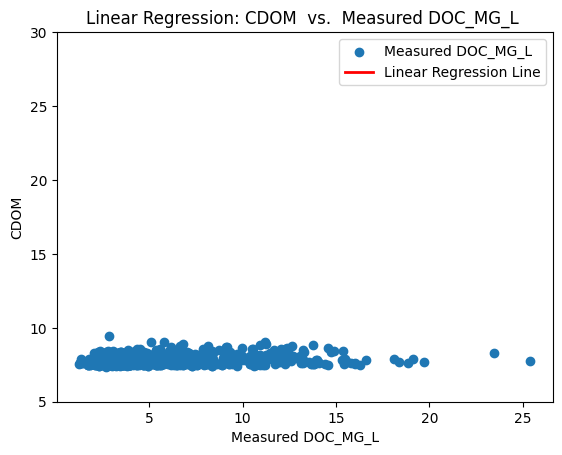

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = merged_data['DOC_MG_L'].values.reshape(-1, 1)
y = merged_data['ln_CDOM_a440'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(merged_data['DOC_MG_L'], merged_data['ln_a440'],  label='Measured DOC_MG_L')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('Linear Regression: CDOM  vs.  Measured DOC_MG_L ')
plt.legend()
plt.ylim(5,30)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


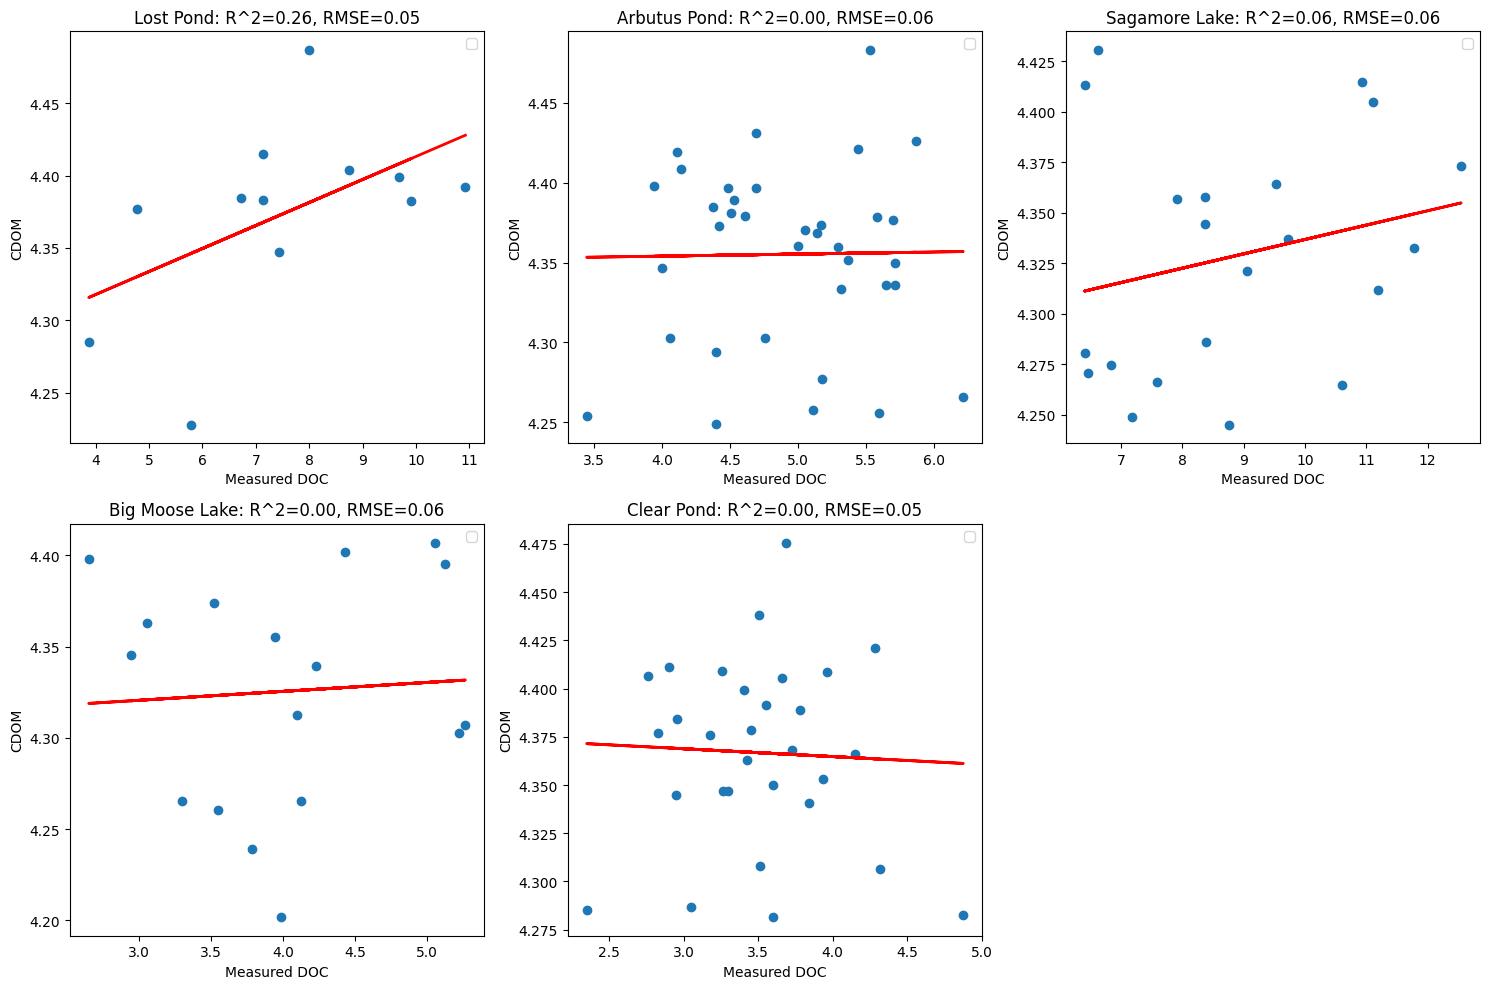

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln_CDOM_a440'  # Replace with the actual column name for aCDOM_485

# Create a list of lakes
lakes = ["Lost Pond", "Arbutus Pond", "Sagamore Lake", "Big Moose Lake", "Clear Pond"]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(lakes)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for all lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(lakes):
    # Filter the data for the current lake
    lake_data = merged_data[merged_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(len(lakes), num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

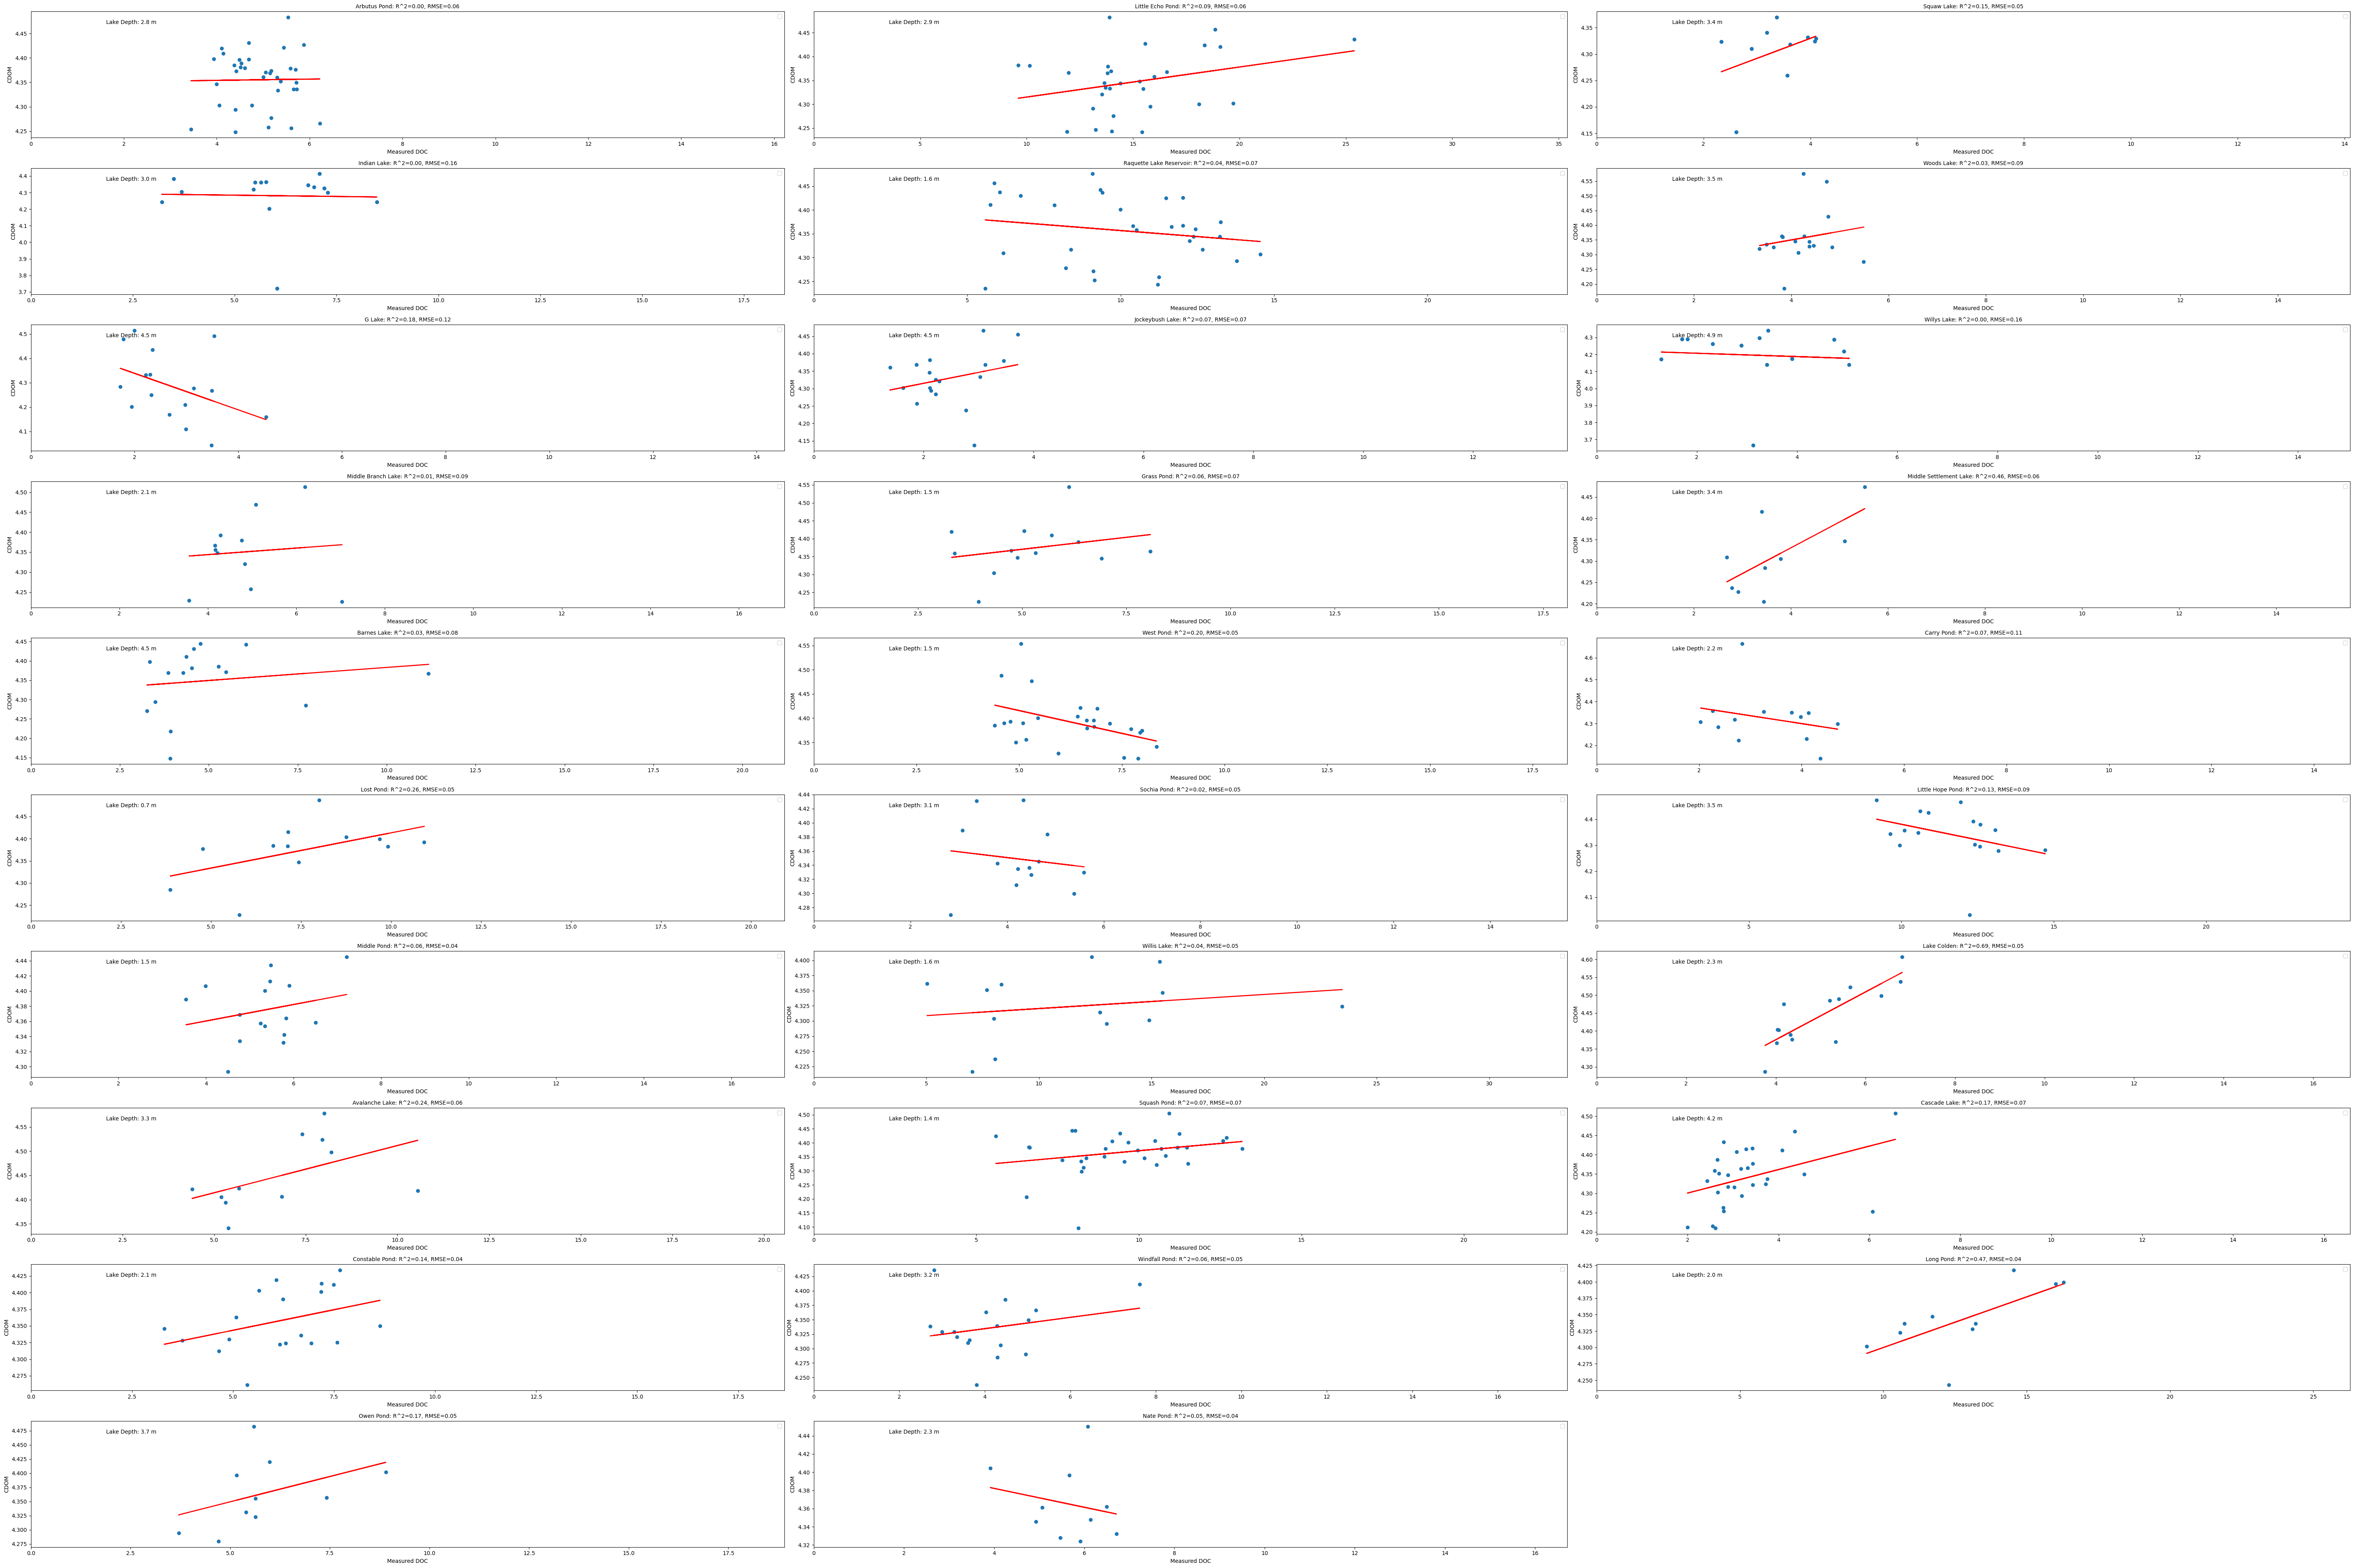

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln_CDOM_a440'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) less than or equal to 5
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] <= 5]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

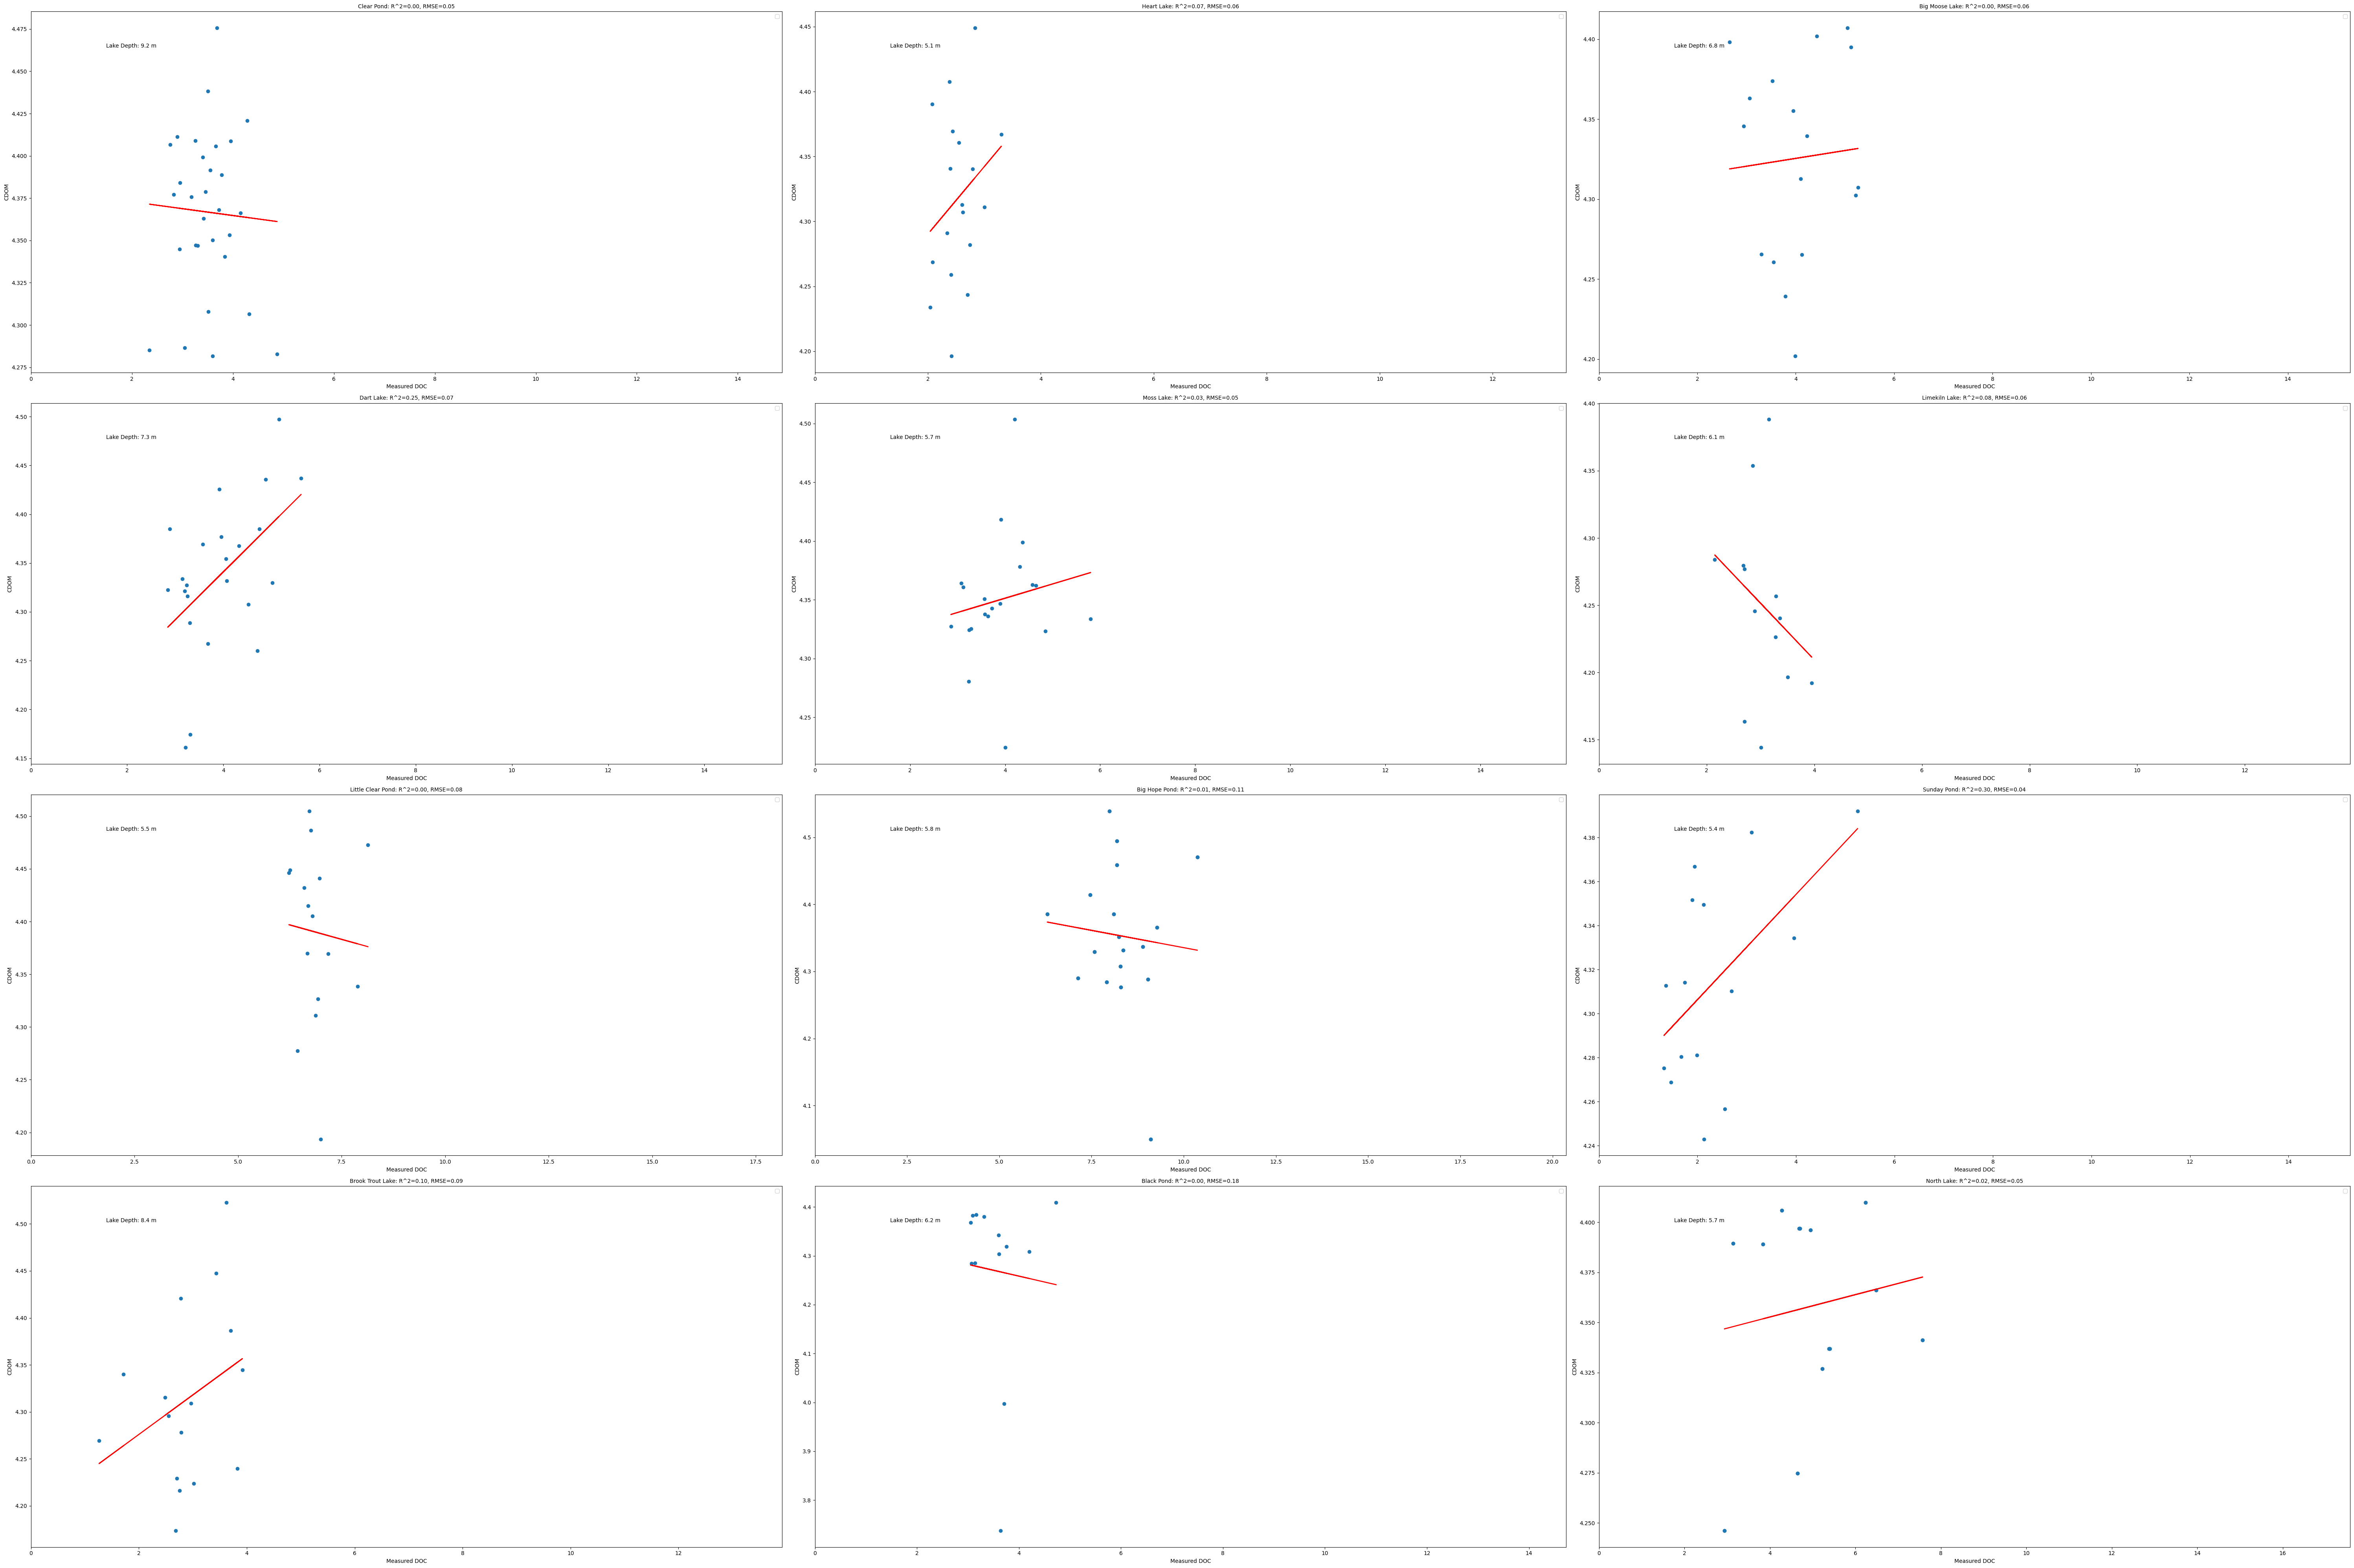

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln_CDOM_a440'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) between 5 and 10
filtered_data = merged_data[(merged_data['LAKE_DEPTH_MEAN'] > 5) & (merged_data['LAKE_DEPTH_MEAN'] < 10)]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


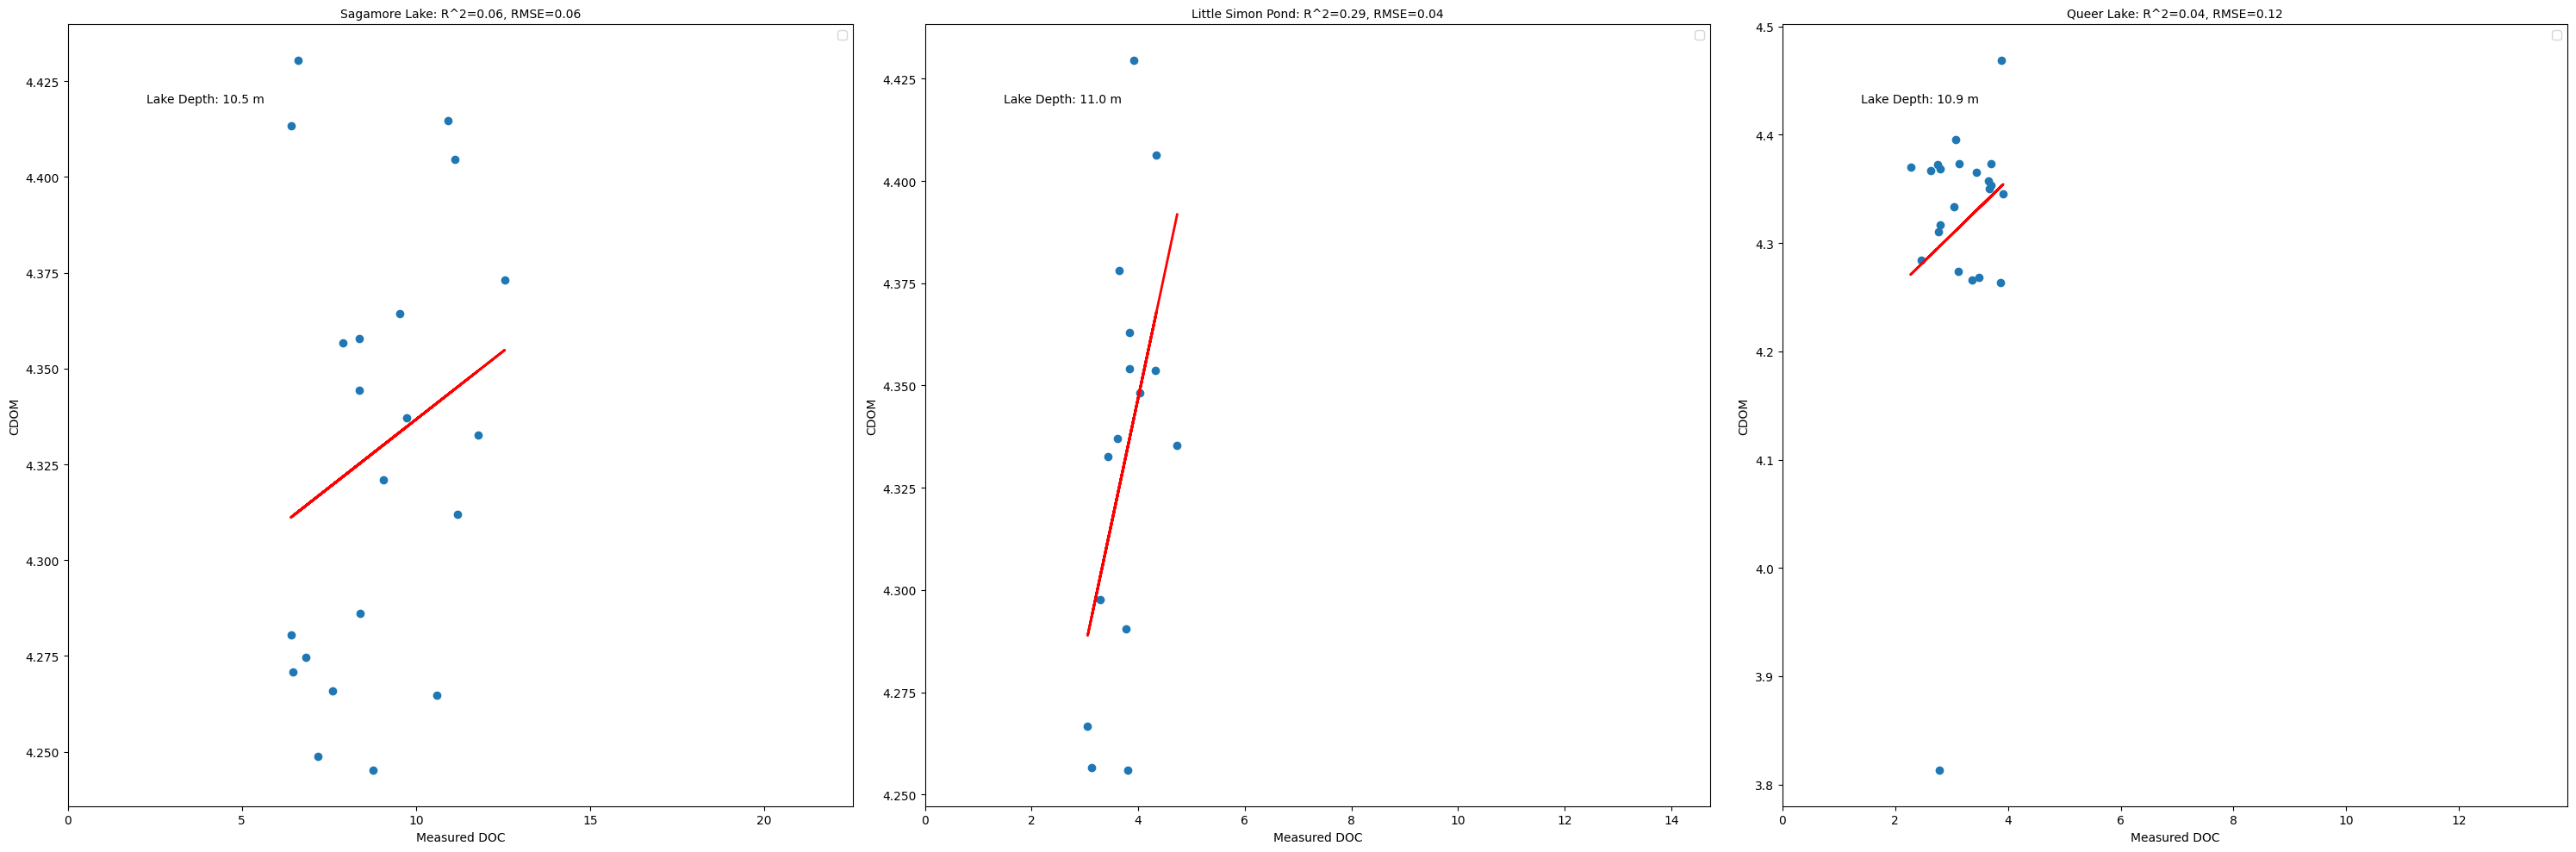

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln_CDOM_a440'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) greater than 10
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] > 10]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


In [48]:
# Olmanson et al. (2016)
# LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
# LC8_BANDS = ['SR_B2','SR_B3','SR_B4',  'SR_B5','SR_B6','SR_B7','ST_B10','QA_PIXEL']; #Landsat 8
# STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']



a1=29.2
a2= 109.3
a3= -143.2
df_all_lakes['ln(a440)_equation4'] = a1 + a2 * (df_all_lakes['blue'] / df_all_lakes['nir']) + a3 * (df_all_lakes['green'] / df_all_lakes['nir'])


In [49]:
df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)


merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
# Drop rows with null values in the merged dataframe
merged_data.dropna(inplace=True)

merged_data = merged_data.dropna(subset=['blue'])

merged_data = merged_data.dropna(subset=['DOC_MG_L'])

# merged_data = merged_data[merged_data['PROGRAM_ID'] == 'LTM_ALTM']
merged_data

SITE_ID   DATE_SMP   DOC_MG_L PROGRAM_ID         SITE_NAME  \
262    1A1-052 1985-07-22   5.000000   LTM_ALTM      Arbutus Pond   
263    1A2-077 1985-07-22   3.300000   LTM_ALTM        Clear Pond   
264    1A1-107 1985-07-22  13.800000   LTM_ALTM  Little Echo Pond   
265    1A1-102 1985-07-22   3.000000   LTM_ALTM        Heart Lake   
286    1A1-102 1985-10-26   3.300000   LTM_ALTM        Heart Lake   
...        ...        ...        ...        ...               ...   
17550  1A2-077 2020-07-06   3.841942   LTM_ALTM        Clear Pond   
17551  1A1-105 2020-07-07   6.066766   LTM_ALTM      Cascade Lake   
17552  1A1-111 2020-07-07  10.539715   LTM_ALTM       Squash Pond   
17746  1A1-111 2021-05-06  11.240100   LTM_ALTM       Squash Pond   
17755   040576 2021-05-13   4.763200   LTM_ALTM        Woods Lake   

       LAKE_DEPTH_MEAN     LATDD     LONDD  LATDD_CENT  LONDD_CENT  ...  \
262                2.8  43.98230 -74.23556    43.98787   -74.24151  ...   
263                9.2  43.99568 -73.83082    43.99719   -73.82435  ...   
264                2.9  44.30576 -74.35721    44.30849   -74.35564  ...   
265                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
286                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
...                ...       ...       ...         ...         ...  ...   
17550              9.2  43.99568 -73.83082    43.99719   -73.82435  ...   
17551              4.2  43.78910 -74.81204    43.79039   -74.80236  ...   
17552              1.4  43.82557 -74.88614    43.82649   -74.88699  ...   
17746              1.4  43.82557 -74.88614    43.82649   -74.88699  ...   
17755              3.5  43.86566 -74.95512    43.87003   -74.95232  ...   

          swir2      temp  LAKE_LABEL  B4_B1_Ratio  aCDOM_485  Rrs_ratio1  \
262    0.025074  0.726313        32.0     0.598230   2.722175    0.956172   
263    0.024645  0.722627        52.0     0.592414   2.689893    0.949761   
264    0.020471  0.727110       146.0     0.560410   2.512238    0.951011   
265    0.020675  0.714631       105.0     0.552319   2.467324    0.938157   
286    0.064444  0.542254       105.0     0.728377   3.444620    0.962265   
...         ...       ...         ...          ...        ...         ...   
17550  0.049803  0.781051        52.0     1.009036   5.002559    0.944360   
17551  0.049878  0.790781       111.0     1.081333   5.403881    0.922013   
17552  0.065899  0.814839        17.0     1.154000   5.807252    0.941701   
17746  0.066517  0.586064        17.0     0.927828   4.551771    0.975227   
17755  0.089310  0.618606       127.0     0.662830   3.080769    0.987233   

       Rrs_ratio2   ln_a440  ln_CDOM_a440  ln(a440)_equation4  
262      0.624711  7.589825      4.360526          -17.320417  
263      0.619167  7.577208      4.347044          -17.579383  
264      0.586069  7.518489      4.365093          -20.104048  
265      0.572704  7.489166      4.311180          -22.949257  
286      0.745322  7.808278      4.366934          -12.871956  
...           ...       ...           ...                 ...  
17550    1.012521  8.279043      4.340468           -3.908015  
17551    1.102661  8.431008      4.252218            0.411216  
17552    1.169663  8.559212      4.321480            1.485696  
17746    0.945989  8.172916      4.432321           -4.373876  
17755    0.682899  7.707027      4.429552          -15.595286  

[836 rows x 26 columns]

R^2: 0.05552347588132178
RMSE: 6.628172160393562


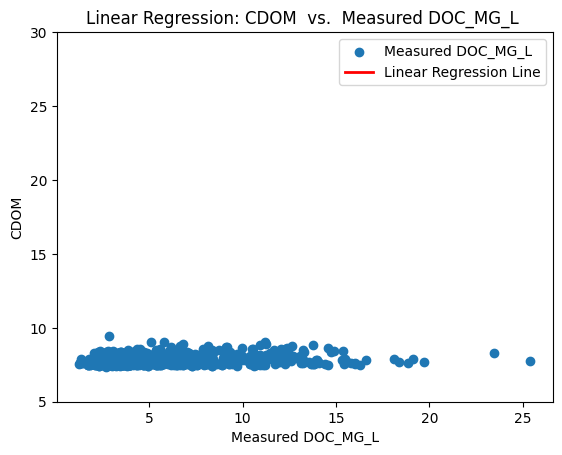

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = merged_data['DOC_MG_L'].values.reshape(-1, 1)
y = merged_data['ln(a440)_equation4'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(merged_data['DOC_MG_L'], merged_data['ln_a440'],  label='Measured DOC_MG_L')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('Linear Regression: CDOM  vs.  Measured DOC_MG_L ')
plt.legend()
plt.ylim(5,30)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


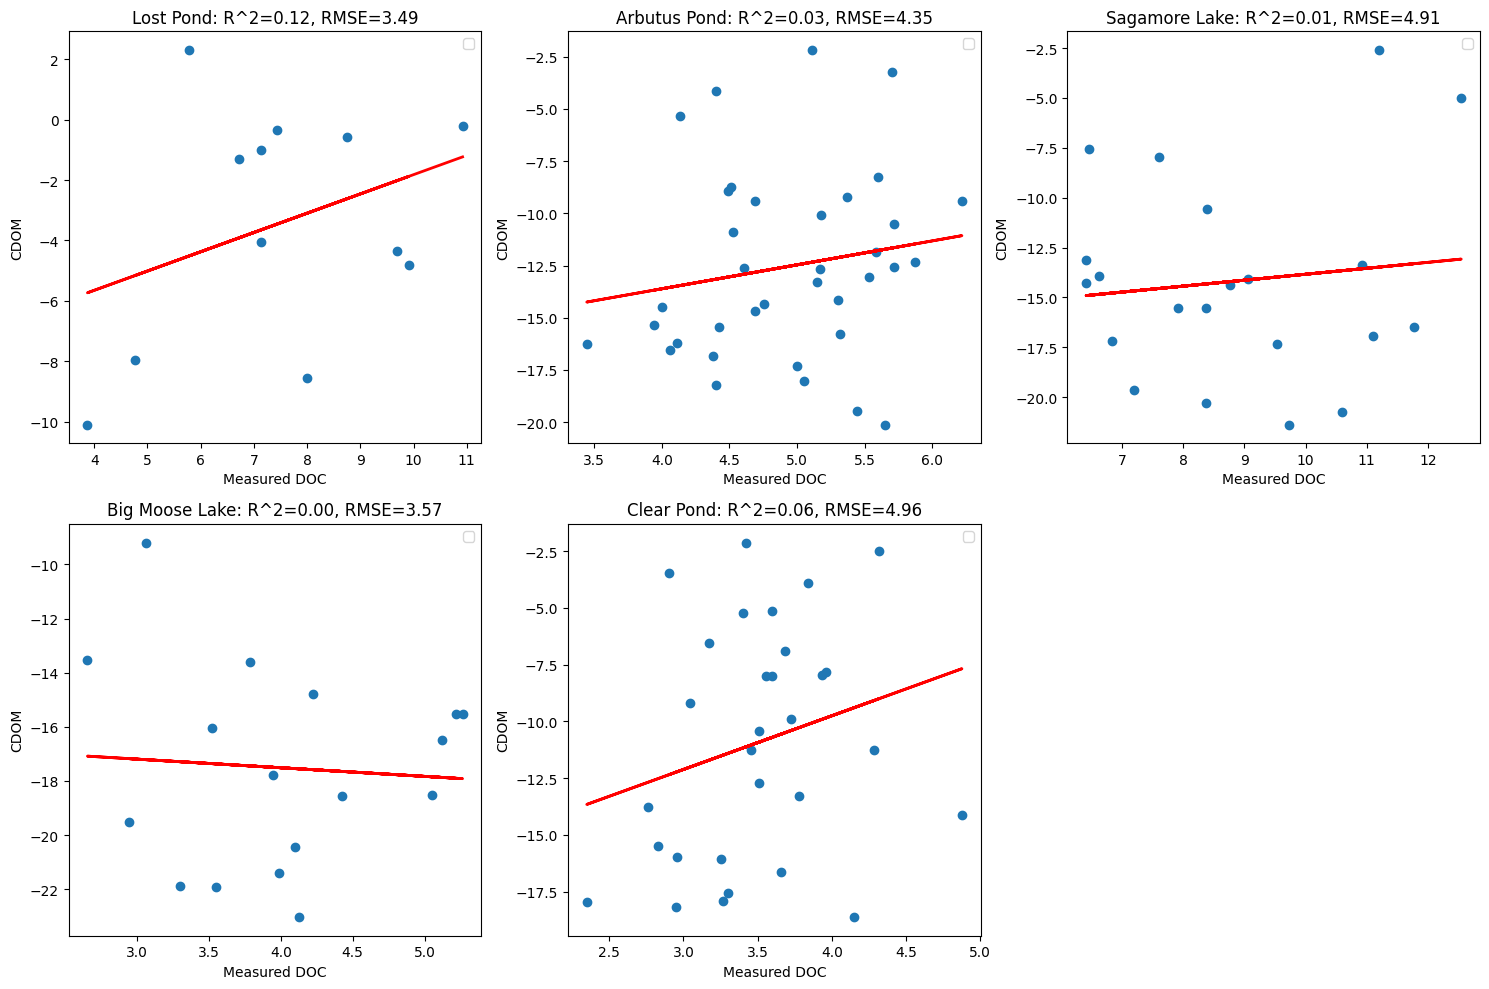

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln(a440)_equation4'  # Replace with the actual column name for aCDOM_485

# Create a list of lakes
lakes = ["Lost Pond", "Arbutus Pond", "Sagamore Lake", "Big Moose Lake", "Clear Pond"]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(lakes)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for all lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(lakes):
    # Filter the data for the current lake
    lake_data = merged_data[merged_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(len(lakes), num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

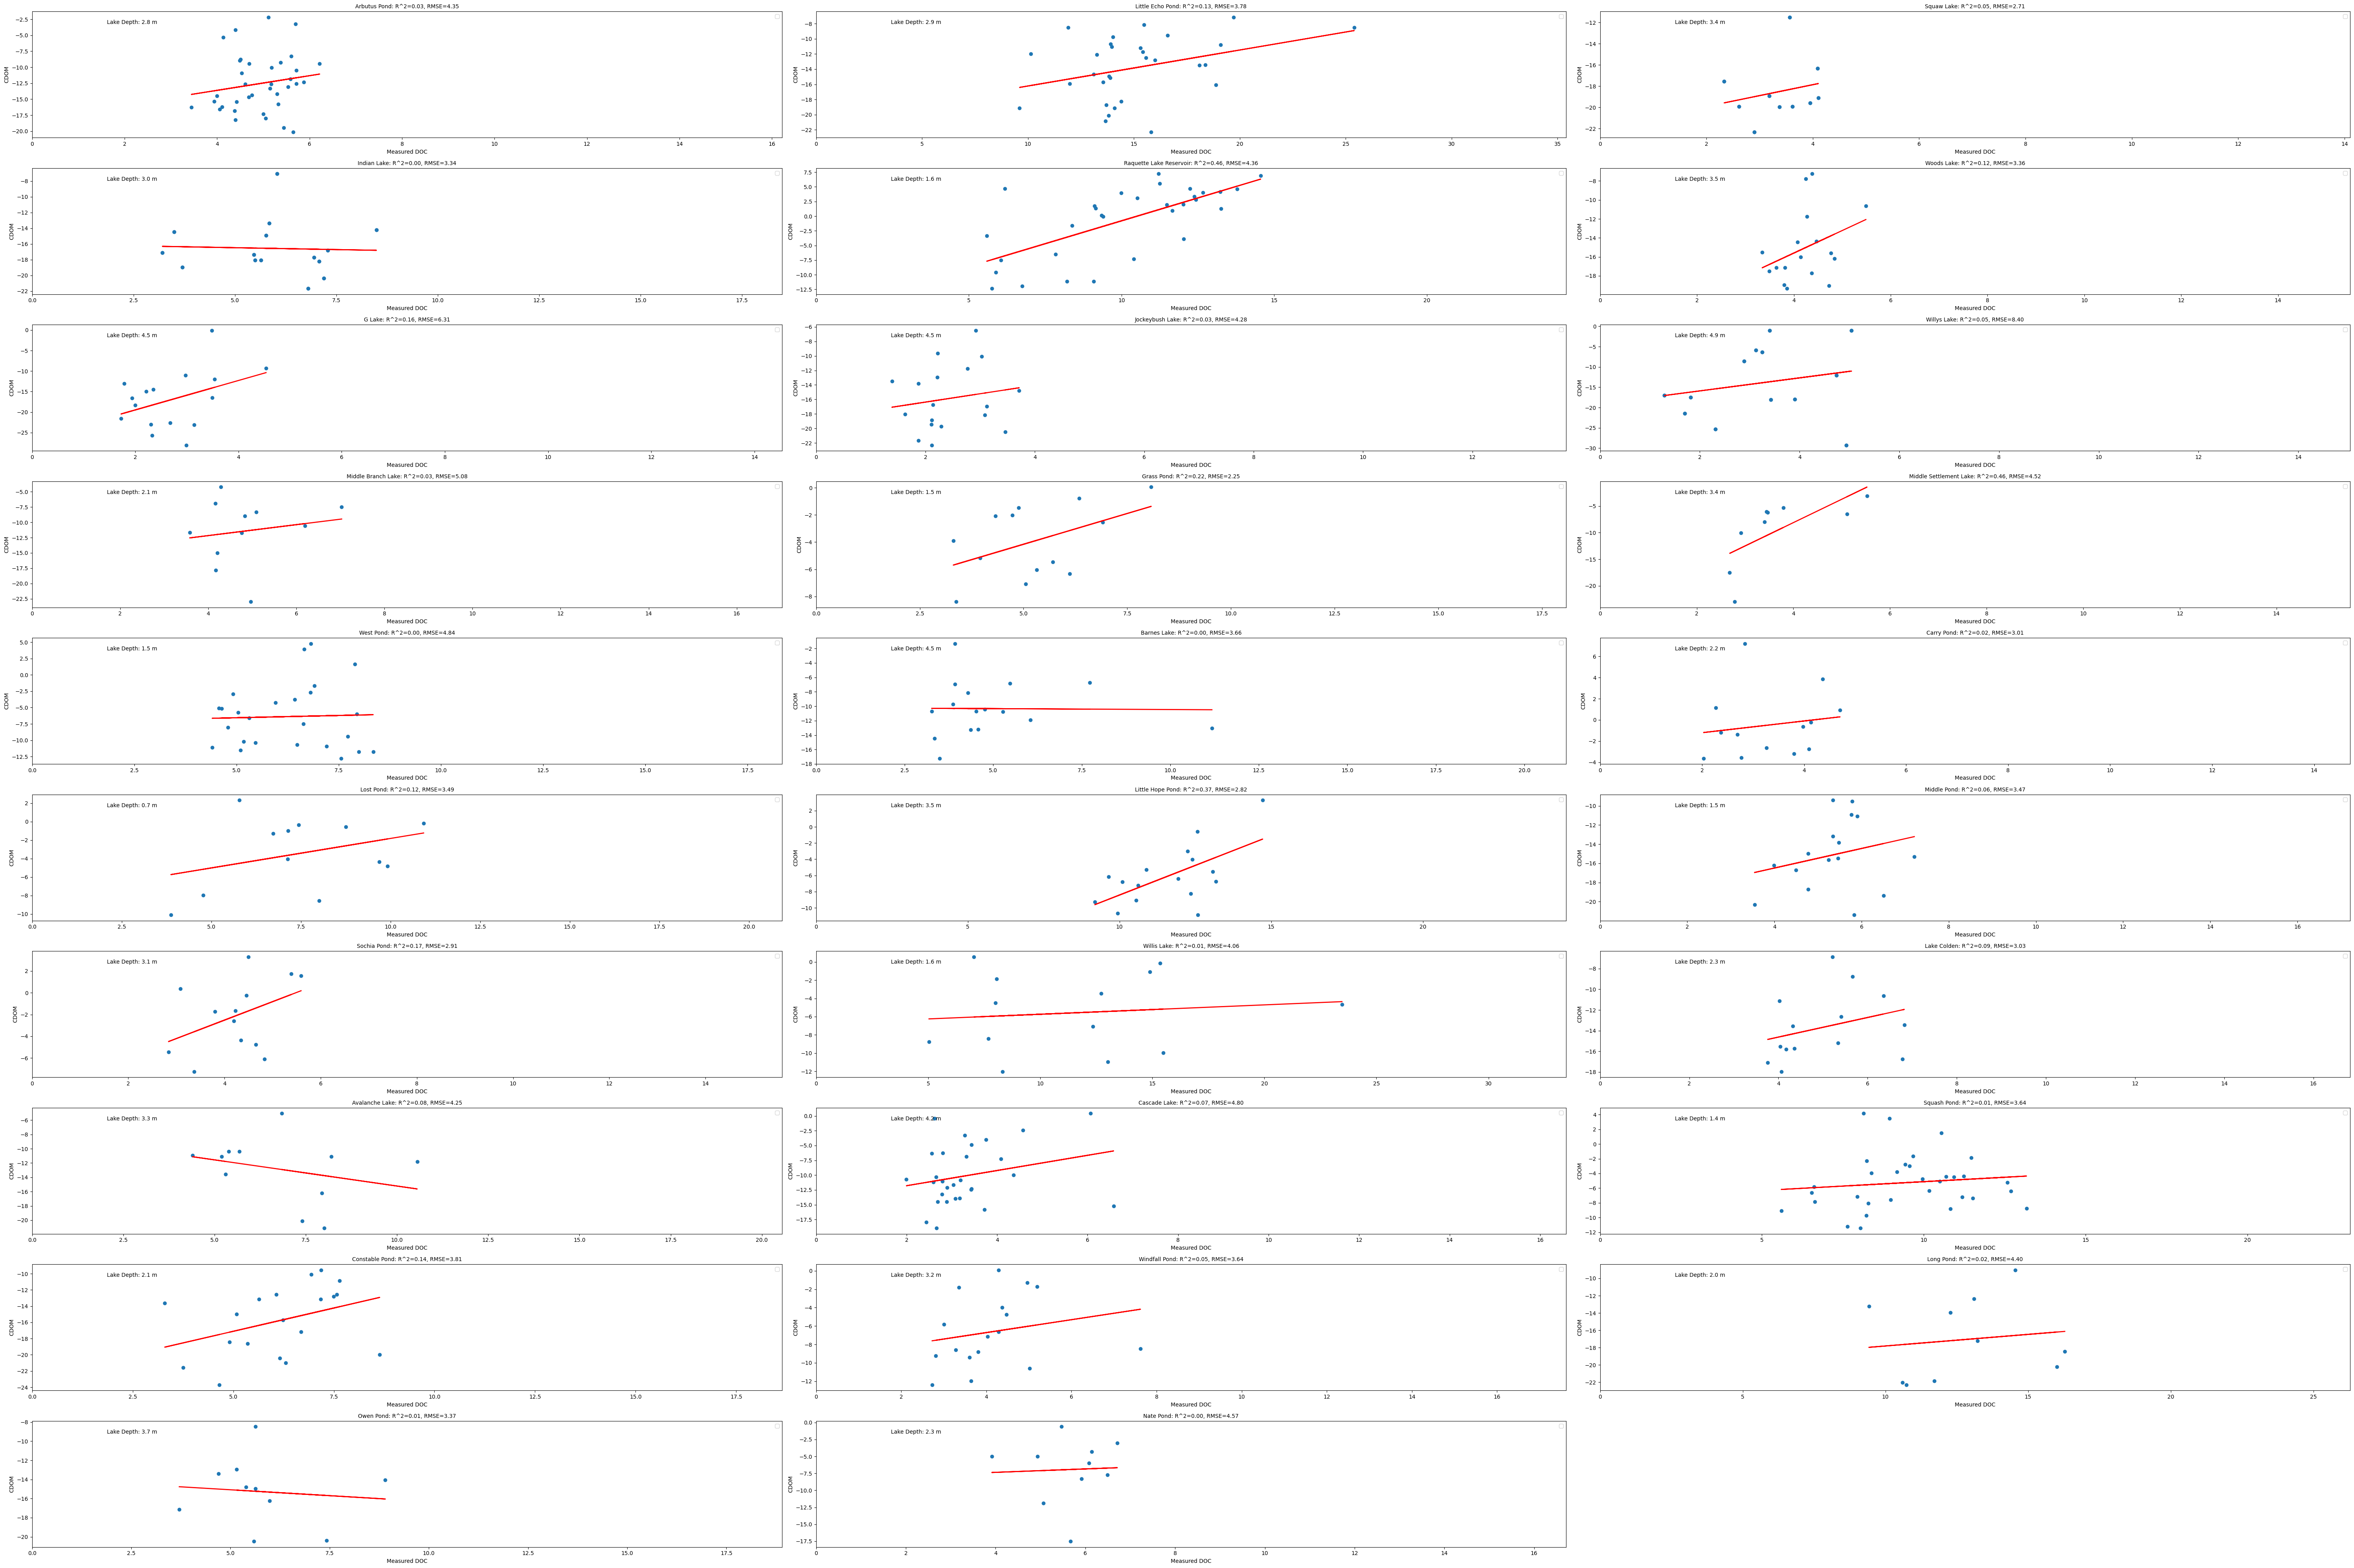

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln(a440)_equation4'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) less than or equal to 5
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] <= 5]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

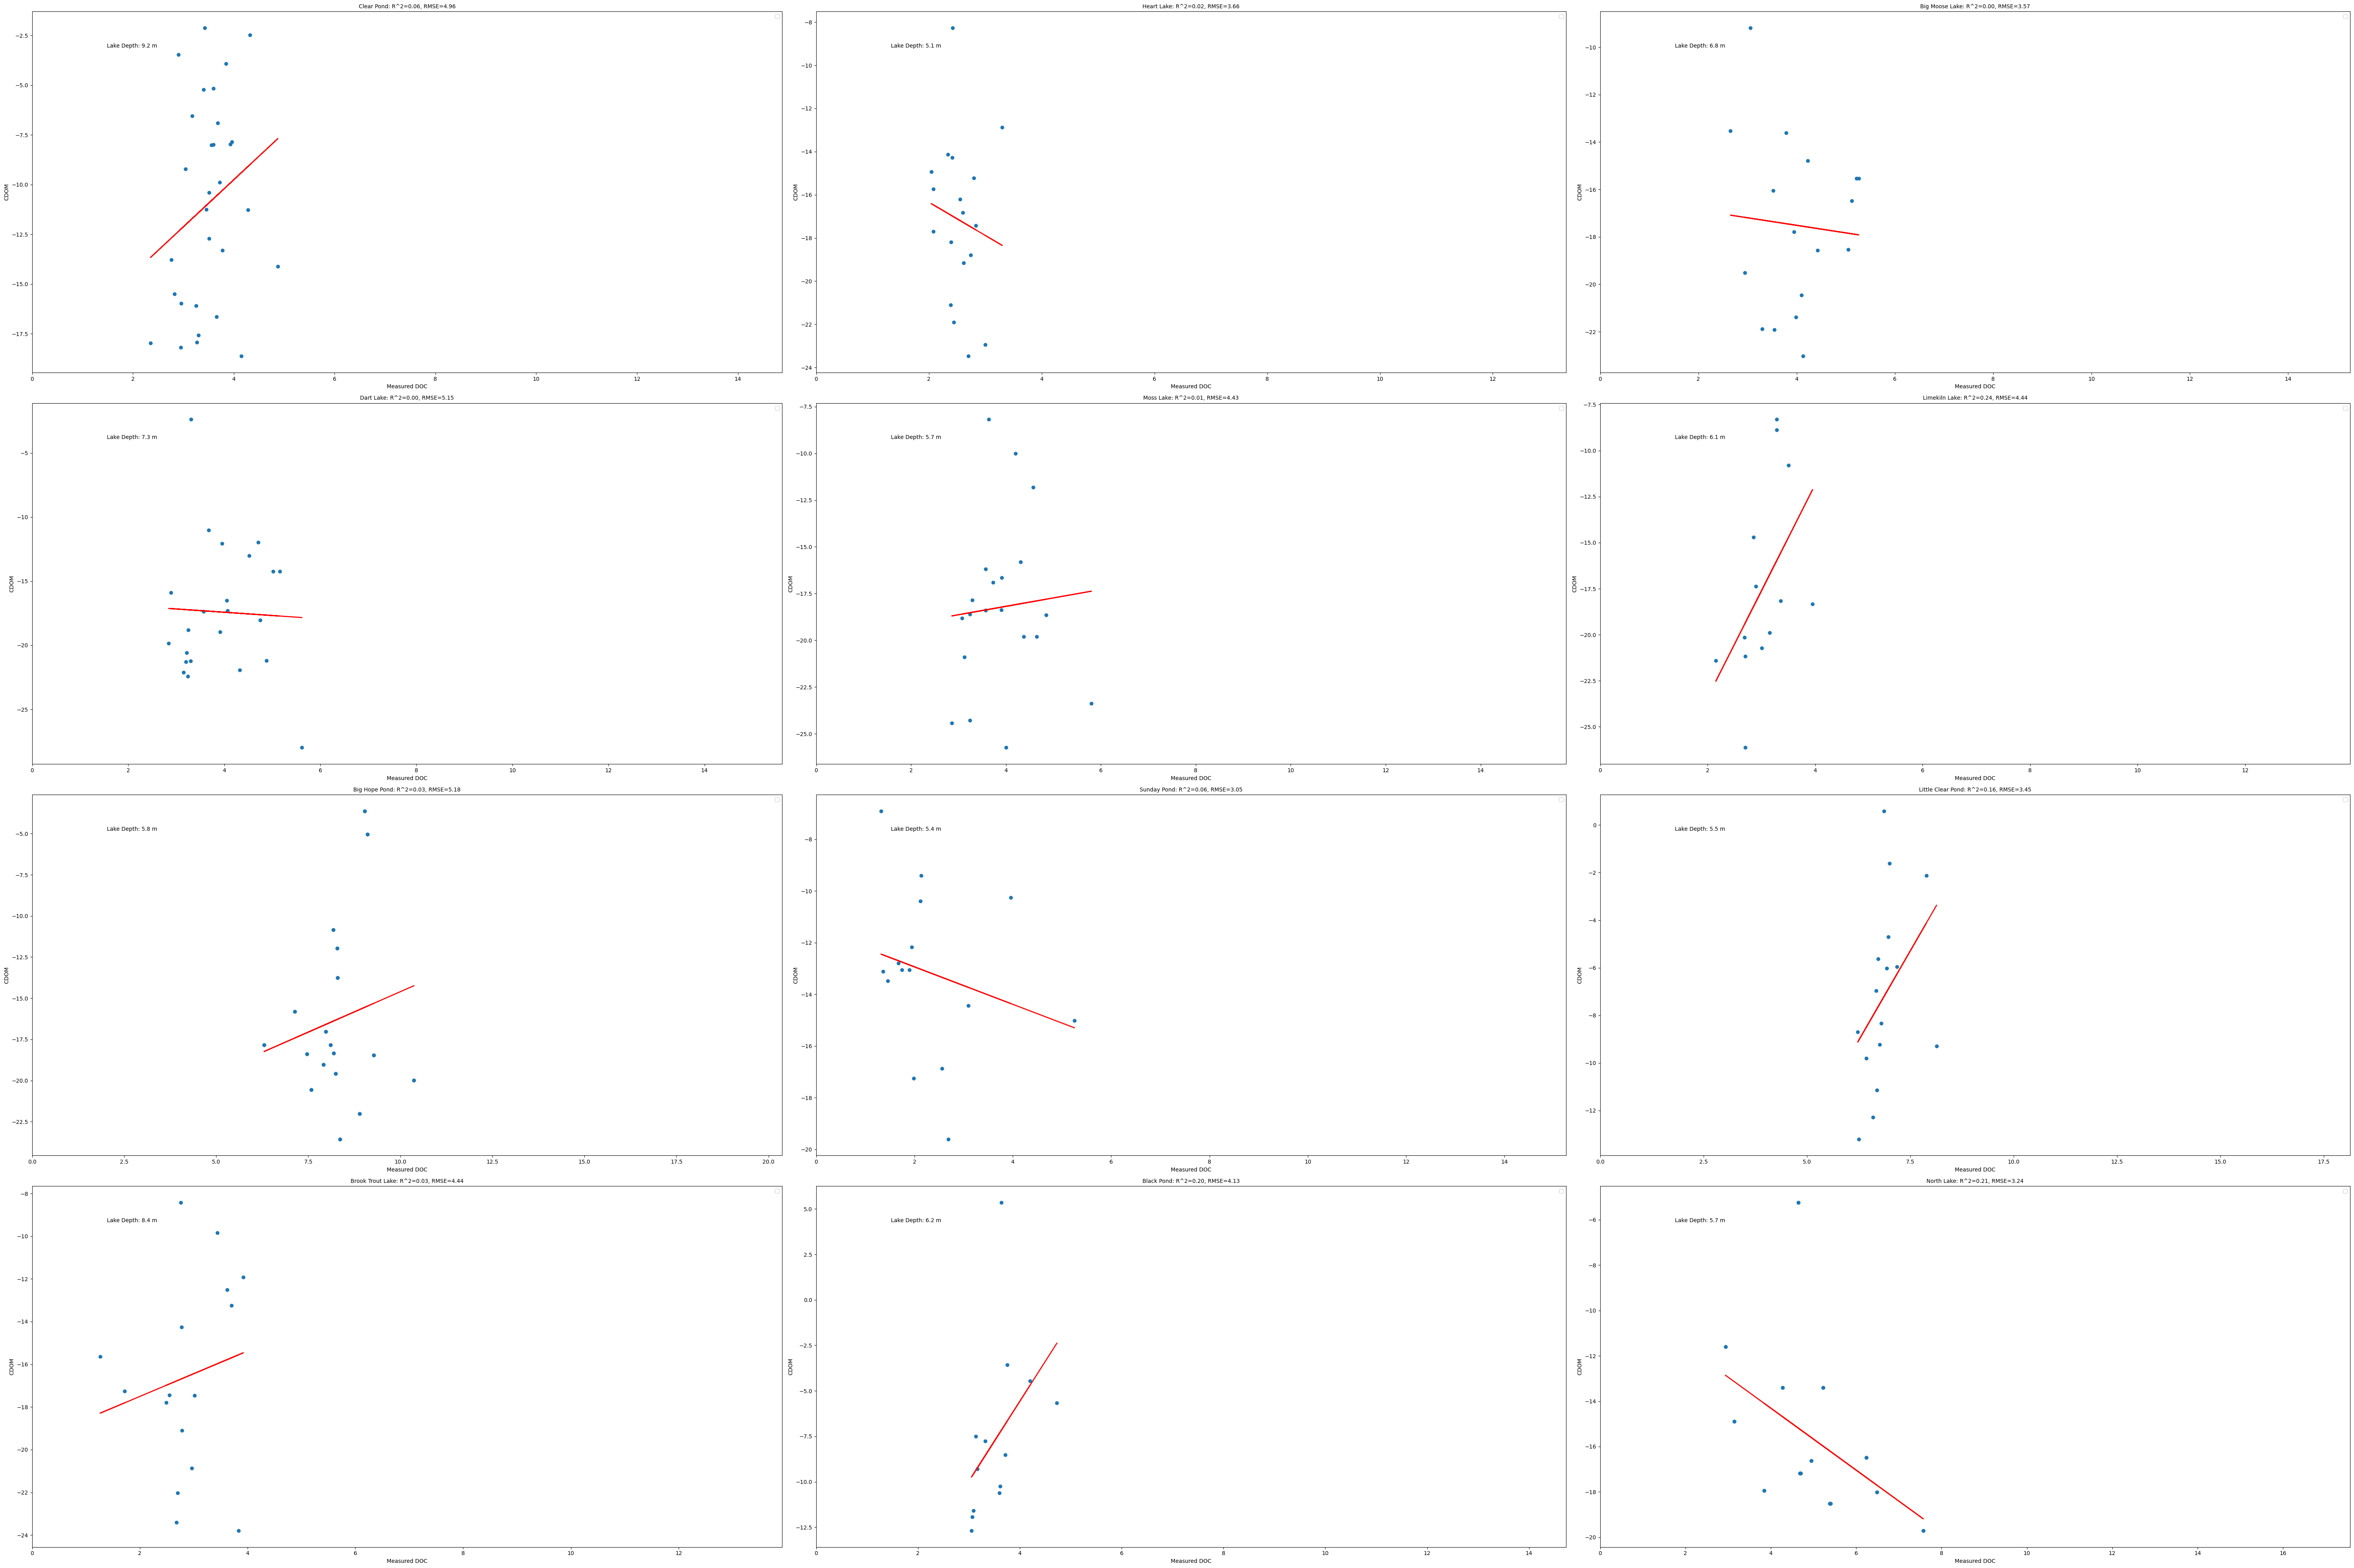

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln(a440)_equation4'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) between 5 and 10
filtered_data = merged_data[(merged_data['LAKE_DEPTH_MEAN'] > 5) & (merged_data['LAKE_DEPTH_MEAN'] < 10)]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


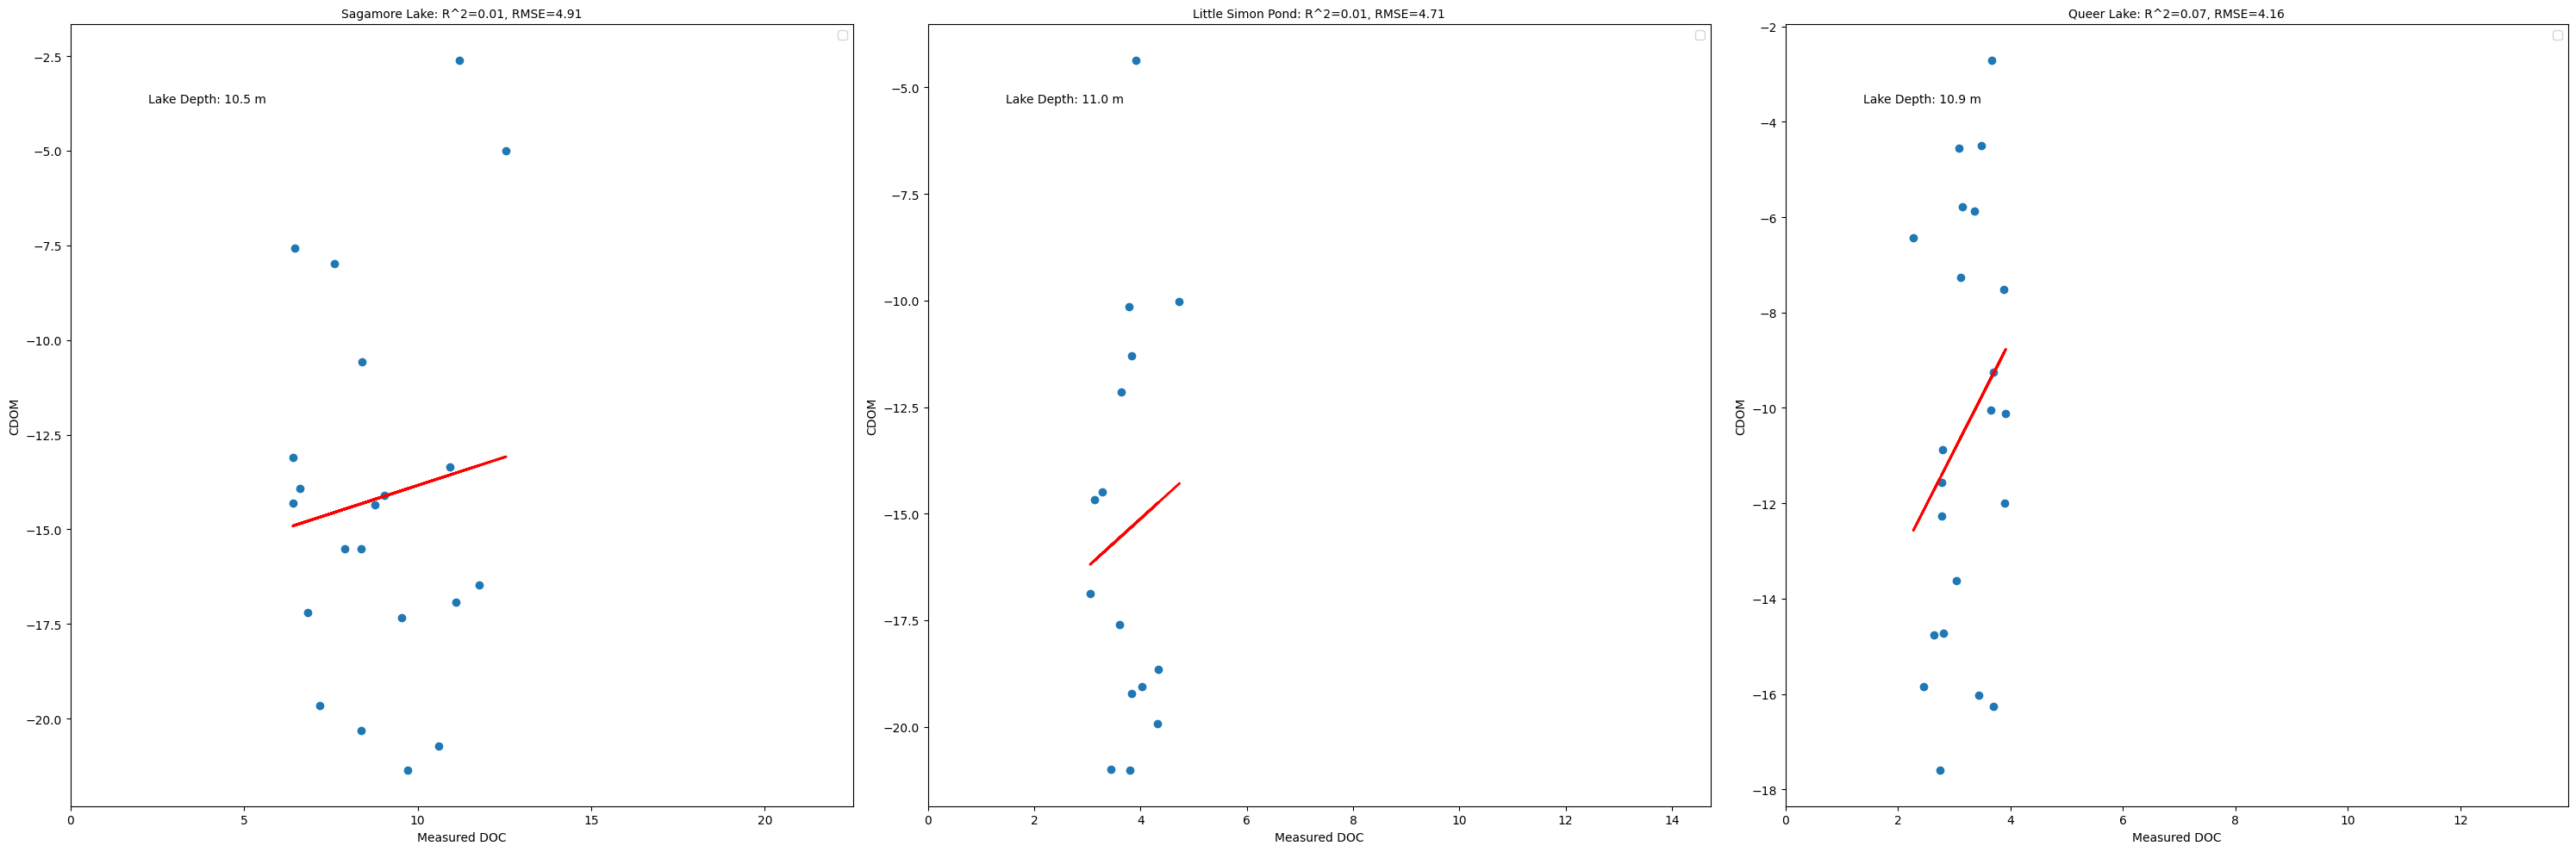

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln(a440)_equation4'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) greater than 10
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] > 10]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


In [55]:
#Brezonik et al. (2005)
a1= 2.304
a2= -255.88 
a3= -0.2542

# LC5_BANDS = ['SR_B1', 'SR_B2', 'SR_B3', 'SR_B4', 'SR_B5', 'SR_B7', 'ST_B6', 'QA_PIXEL']
# LC8_BANDS = ['SR_B2','SR_B3','SR_B4',  'SR_B5','SR_B6','SR_B7','ST_B10','QA_PIXEL']; #Landsat 8
# STD_NAMES = ['blue', 'green', 'red', 'nir', 'swir1', 'swir2', 'temp', 'QA']

df_all_lakes['ln(a440)_equation5'] = a1 + a2 * df_all_lakes['green'] + a3 * (df_all_lakes['green'] / df_all_lakes['swir1'])



In [56]:
df_all_lakes['DATE_SMP'] = pd.to_datetime(df_all_lakes['DATE_SMP'])
data_modified['DATE_SMP'] = pd.to_datetime(data_modified['DATE_SMP'])

data_modified.sort_values('DATE_SMP', inplace=True)
df_all_lakes.sort_values('DATE_SMP', inplace=True)


merged_data = pd.merge_asof(data_modified, df_all_lakes, on='DATE_SMP', by=['SITE_NAME'], tolerance=pd.Timedelta(days=3))
# Drop rows with null values in the merged dataframe
merged_data.dropna(inplace=True)

merged_data = merged_data.dropna(subset=['blue'])

merged_data = merged_data.dropna(subset=['DOC_MG_L'])

# merged_data = merged_data[merged_data['PROGRAM_ID'] == 'LTM_ALTM']
merged_data

SITE_ID   DATE_SMP   DOC_MG_L PROGRAM_ID         SITE_NAME  \
262    1A1-052 1985-07-22   5.000000   LTM_ALTM      Arbutus Pond   
263    1A2-077 1985-07-22   3.300000   LTM_ALTM        Clear Pond   
264    1A1-107 1985-07-22  13.800000   LTM_ALTM  Little Echo Pond   
265    1A1-102 1985-07-22   3.000000   LTM_ALTM        Heart Lake   
286    1A1-102 1985-10-26   3.300000   LTM_ALTM        Heart Lake   
...        ...        ...        ...        ...               ...   
17550  1A3-001 2020-07-06   5.467659   LTM_ALTM         Nate Pond   
17552  1A1-111 2020-07-07  10.539715   LTM_ALTM       Squash Pond   
17553  1A1-105 2020-07-07   6.066766   LTM_ALTM      Cascade Lake   
17745  1A1-111 2021-05-06  11.240100   LTM_ALTM       Squash Pond   
17755   040576 2021-05-13   4.763200   LTM_ALTM        Woods Lake   

       LAKE_DEPTH_MEAN     LATDD     LONDD  LATDD_CENT  LONDD_CENT  ...  \
262                2.8  43.98230 -74.23556    43.98787   -74.24151  ...   
263                9.2  43.99568 -73.83082    43.99719   -73.82435  ...   
264                2.9  44.30576 -74.35721    44.30849   -74.35564  ...   
265                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
286                5.1  44.18050 -73.96726    44.18229   -73.96920  ...   
...                ...       ...       ...         ...         ...  ...   
17550              2.3  43.85890 -74.09377    43.85752   -74.09038  ...   
17552              1.4  43.82557 -74.88614    43.82649   -74.88699  ...   
17553              4.2  43.78910 -74.81204    43.79039   -74.80236  ...   
17745              1.4  43.82557 -74.88614    43.82649   -74.88699  ...   
17755              3.5  43.86566 -74.95512    43.87003   -74.95232  ...   

           temp  LAKE_LABEL  B4_B1_Ratio  aCDOM_485  Rrs_ratio1  Rrs_ratio2  \
262    0.726313        32.0     0.598230   2.722175    0.956172    0.624711   
263    0.722627        52.0     0.592414   2.689893    0.949761    0.619167   
264    0.727110       146.0     0.560410   2.512238    0.951011    0.586069   
265    0.714631       105.0     0.552319   2.467324    0.938157    0.572704   
286    0.542254       105.0     0.728377   3.444620    0.962265    0.745322   
...         ...         ...          ...        ...         ...         ...   
17550  0.772938       154.0     1.072597   5.355388    0.940783    1.087141   
17552  0.814839        17.0     1.154000   5.807252    0.941701    1.169663   
17553  0.790781       111.0     1.081333   5.403881    0.922013    1.102661   
17745  0.586064        17.0     0.927828   4.551771    0.975227    0.945989   
17755  0.618606       127.0     0.662830   3.080769    0.987233    0.682899   

        ln_a440  ln_CDOM_a440  ln(a440)_equation4  ln(a440)_equation5  
262    7.589825      4.360526          -17.320417          -29.532802  
263    7.577208      4.347044          -17.579383          -29.035199  
264    7.518489      4.365093          -20.104048          -27.954580  
265    7.489166      4.311180          -22.949257          -29.302390  
286    7.808278      4.366934          -12.871956          -31.037632  
...         ...           ...                 ...                 ...  
17550  8.411112      4.327974           -0.619452          -29.242115  
17552  8.559212      4.321480            1.485696          -29.929668  
17553  8.431008      4.252218            0.411216          -30.370390  
17745  8.172916      4.432321           -4.373876          -29.056671  
17755  7.707027      4.429552          -15.595286          -31.758180  

[836 rows x 27 columns]

R^2: 0.0016790693811539192
RMSE: 11.88928194563805


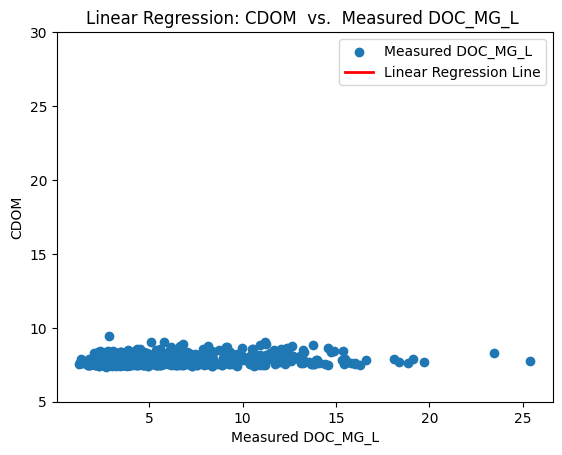

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X = merged_data['DOC_MG_L'].values.reshape(-1, 1)
y = merged_data['ln(a440)_equation5'].values

# Create a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict y values using the model
y_pred = regression_model.predict(X)

# Calculate R^2
r2 = r2_score(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print R^2 and RMSE
print("R^2:", r2)
print("RMSE:", rmse)

# Plot measured DOC_MG_L against aCDOM
plt.scatter(merged_data['DOC_MG_L'], merged_data['ln_a440'],  label='Measured DOC_MG_L')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Measured DOC_MG_L')
plt.ylabel('CDOM')
plt.title('Linear Regression: CDOM  vs.  Measured DOC_MG_L ')
plt.legend()
plt.ylim(5,30)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


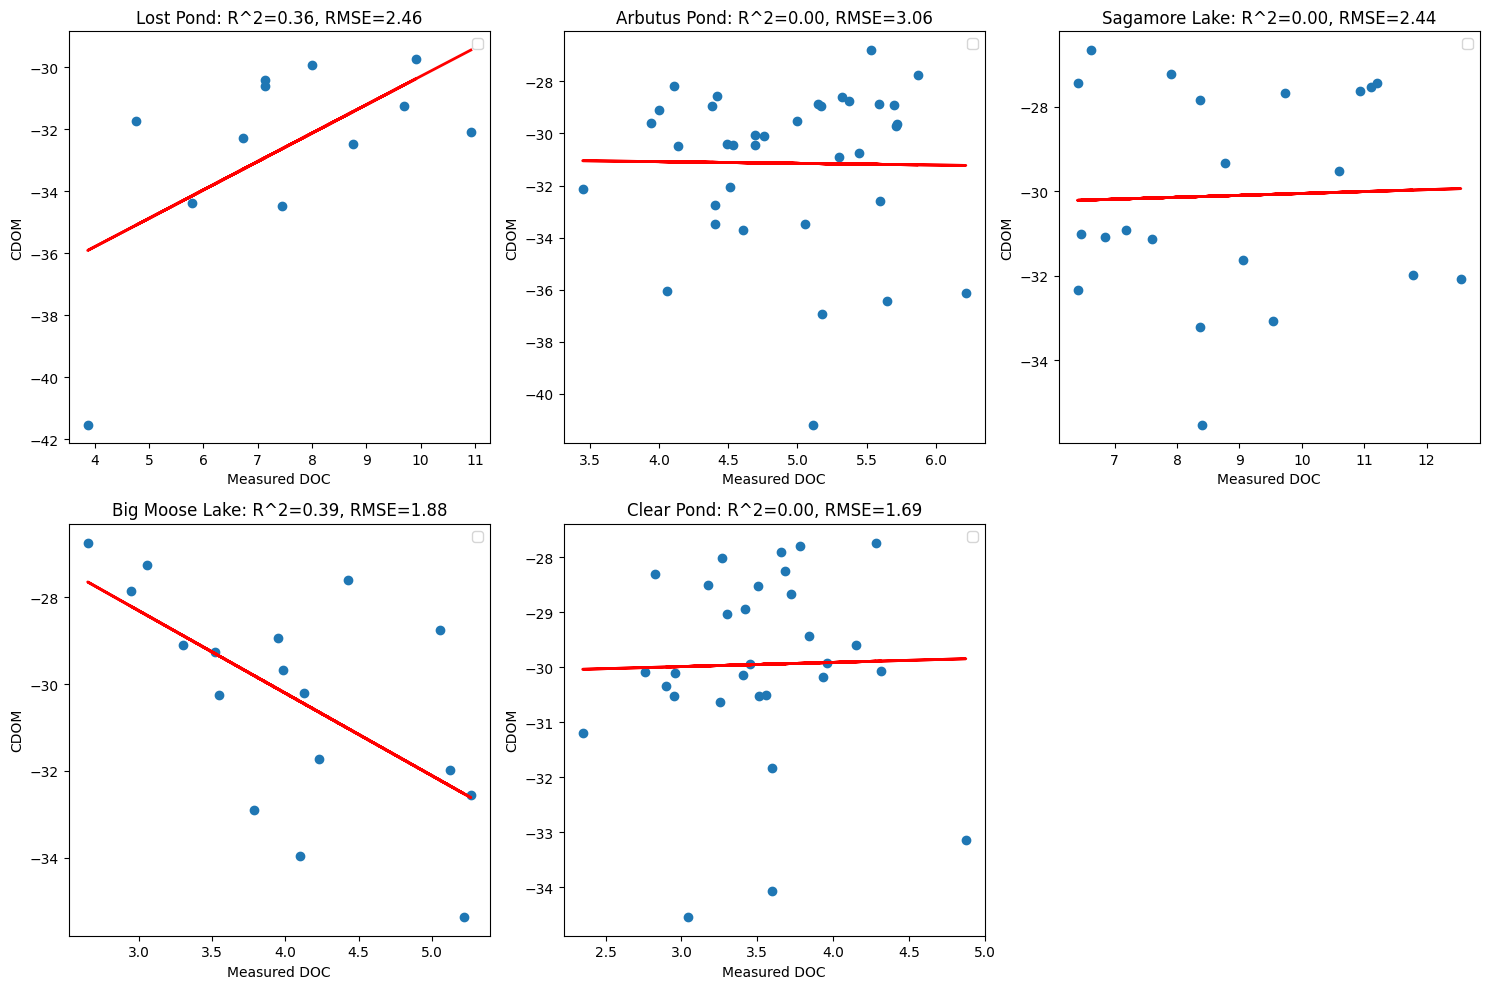

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln(a440)_equation5'  # Replace with the actual column name for aCDOM_485

# Create a list of lakes
lakes = ["Lost Pond", "Arbutus Pond", "Sagamore Lake", "Big Moose Lake", "Clear Pond"]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(lakes)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for all lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(lakes):
    # Filter the data for the current lake
    lake_data = merged_data[merged_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(len(lakes), num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

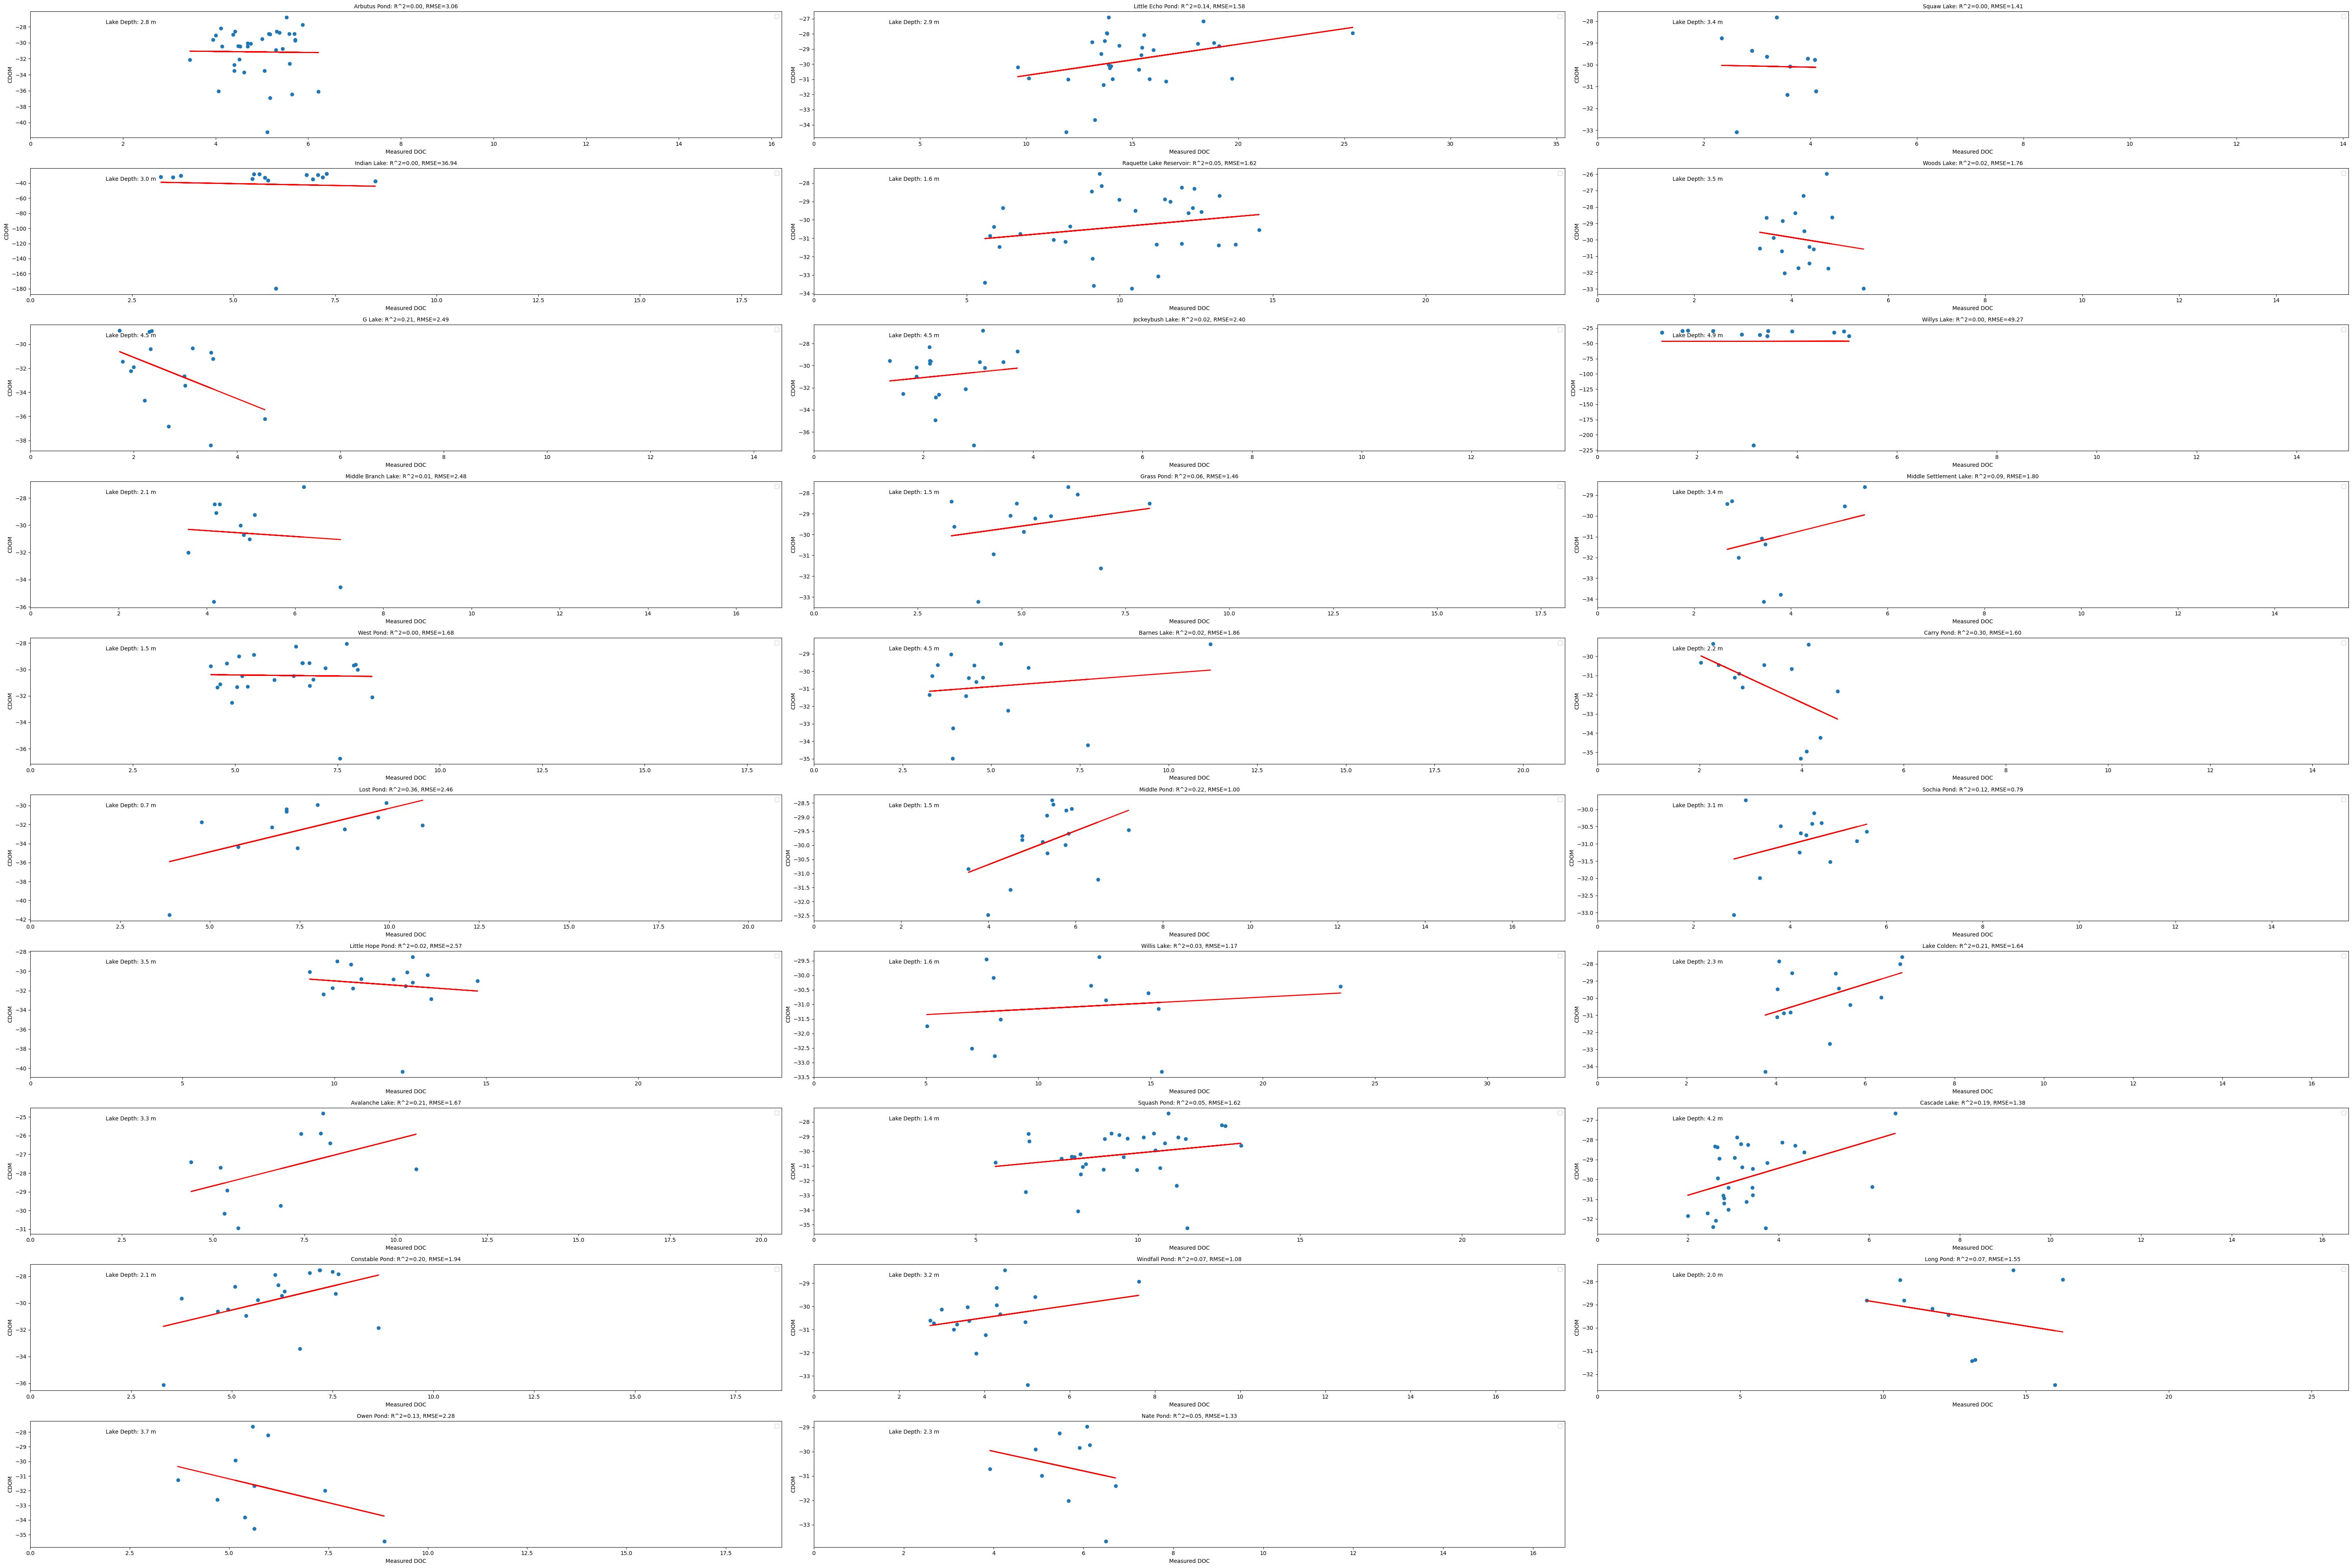

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln(a440)_equation5'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) less than or equal to 5
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] <= 5]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

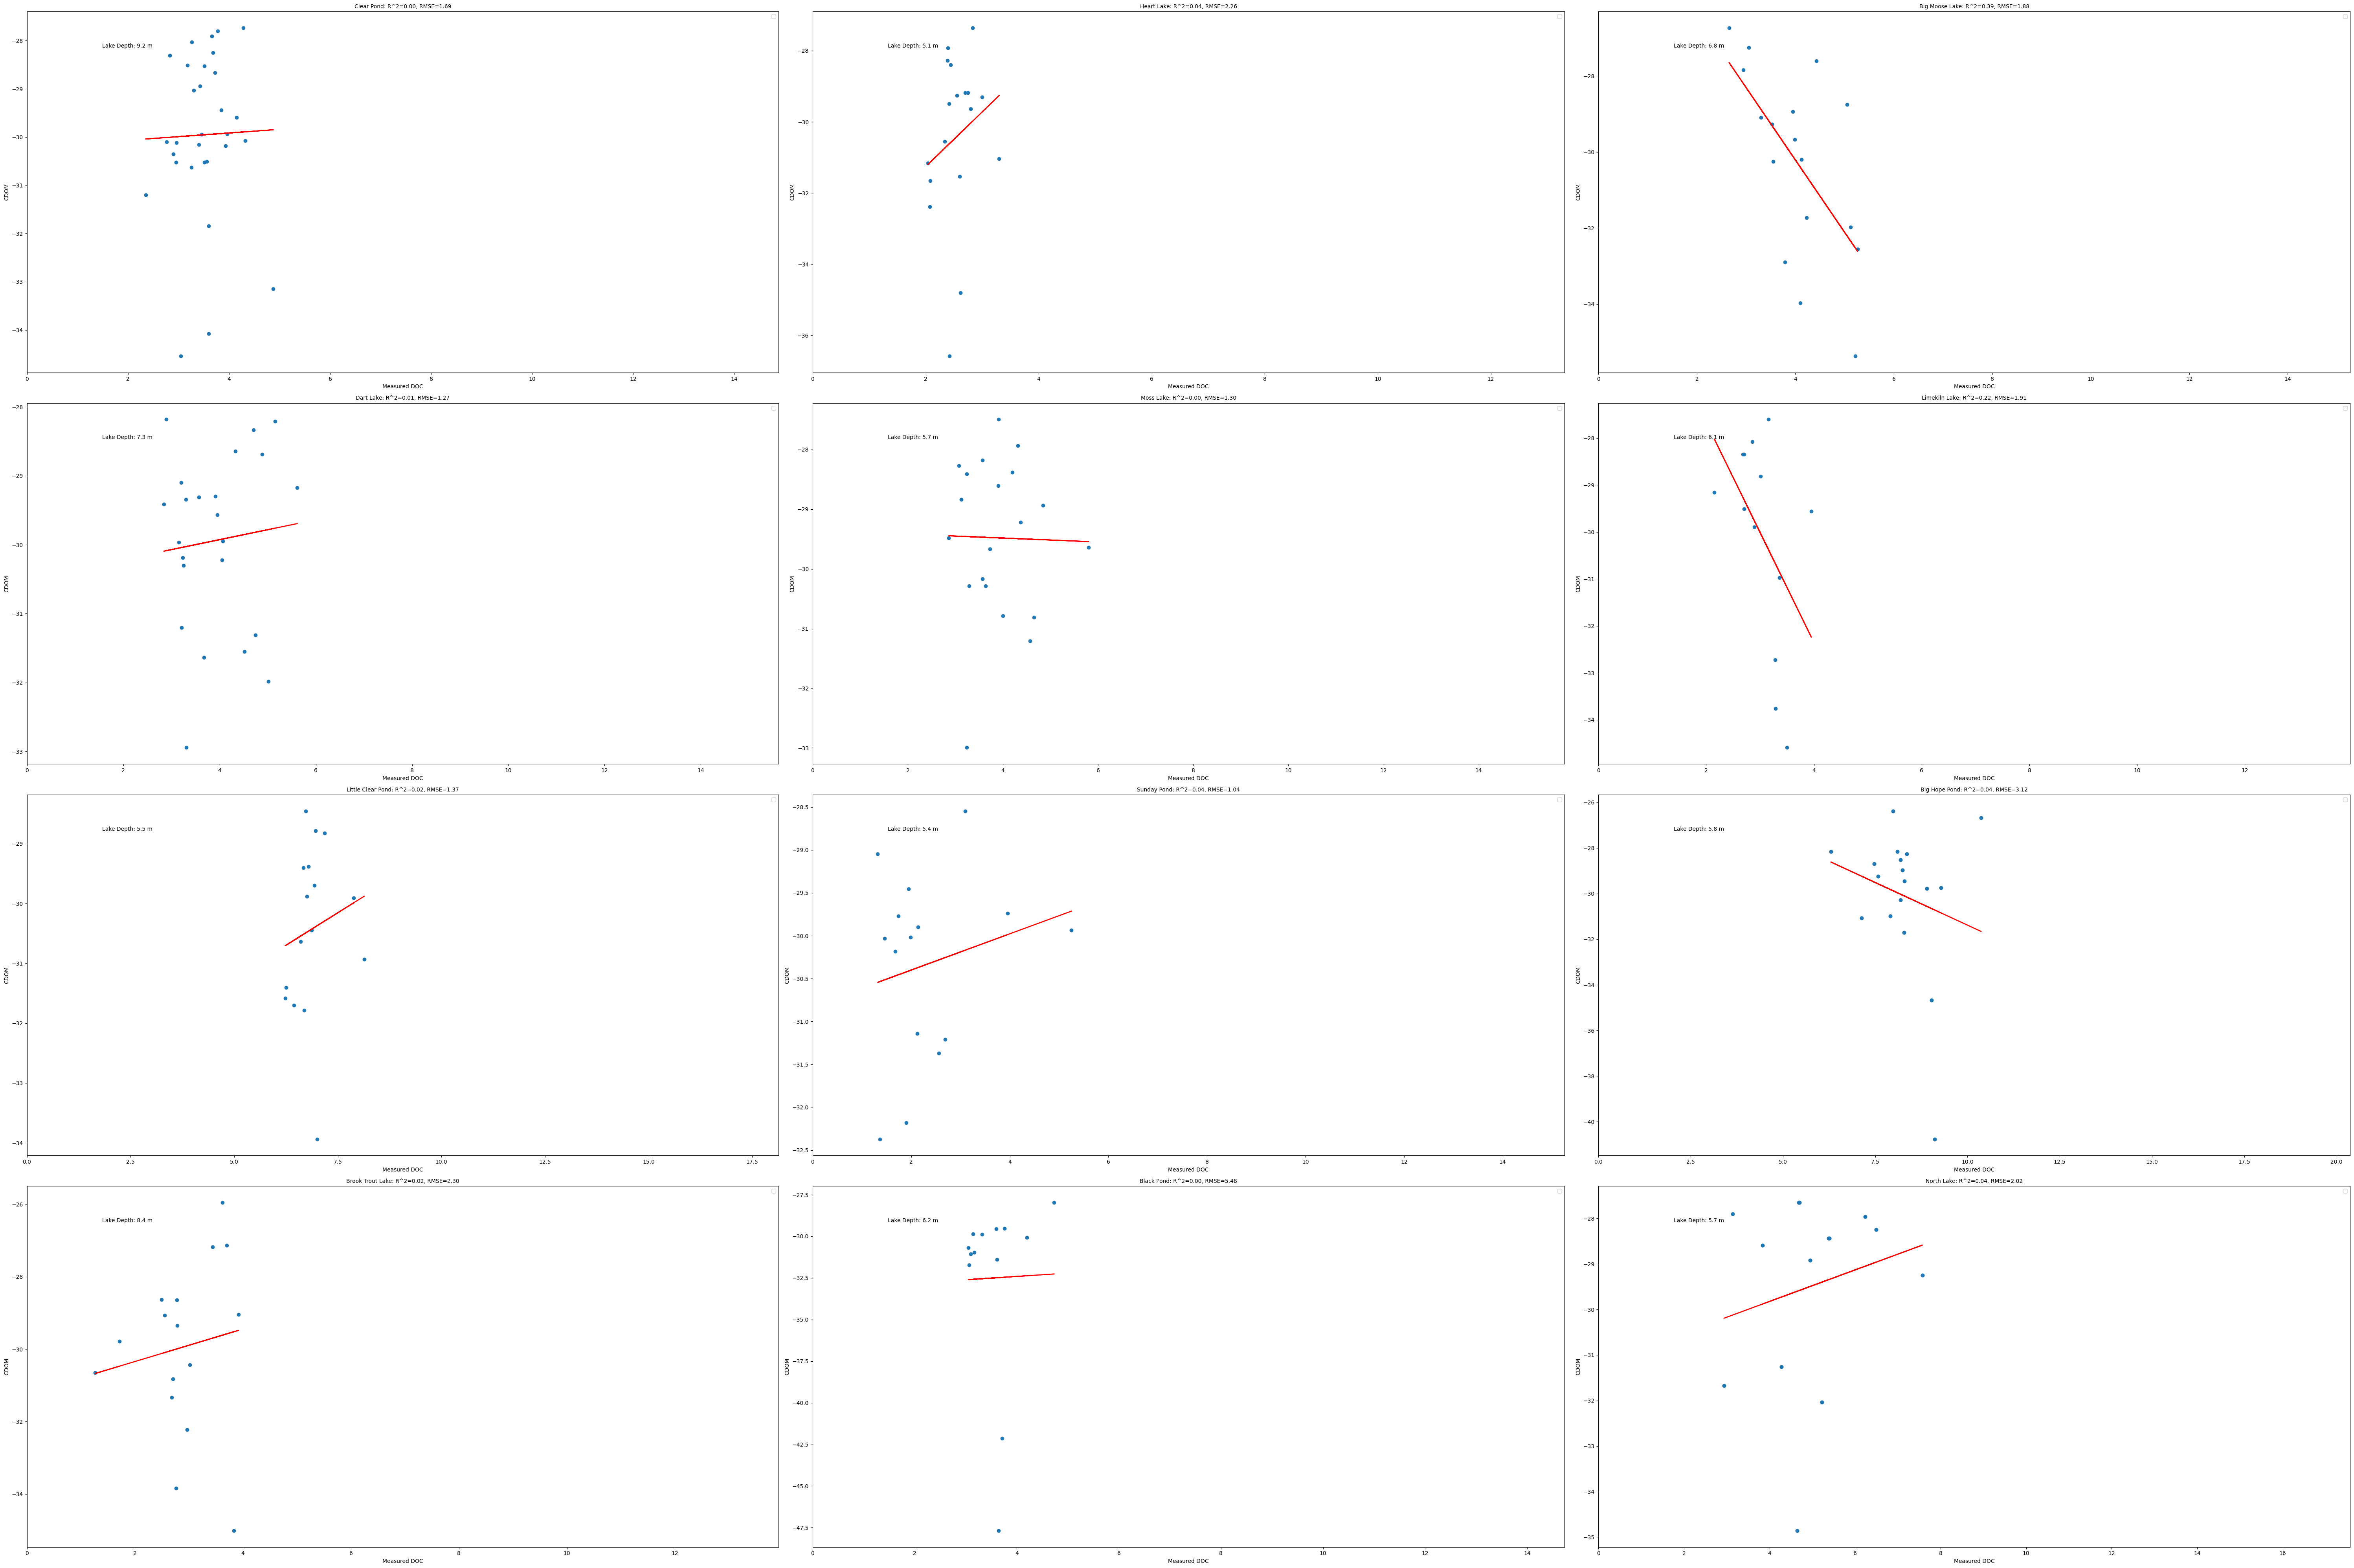

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln(a440)_equation5'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) between 5 and 10
filtered_data = merged_data[(merged_data['LAKE_DEPTH_MEAN'] > 5) & (merged_data['LAKE_DEPTH_MEAN'] < 10)]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(60, 40))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


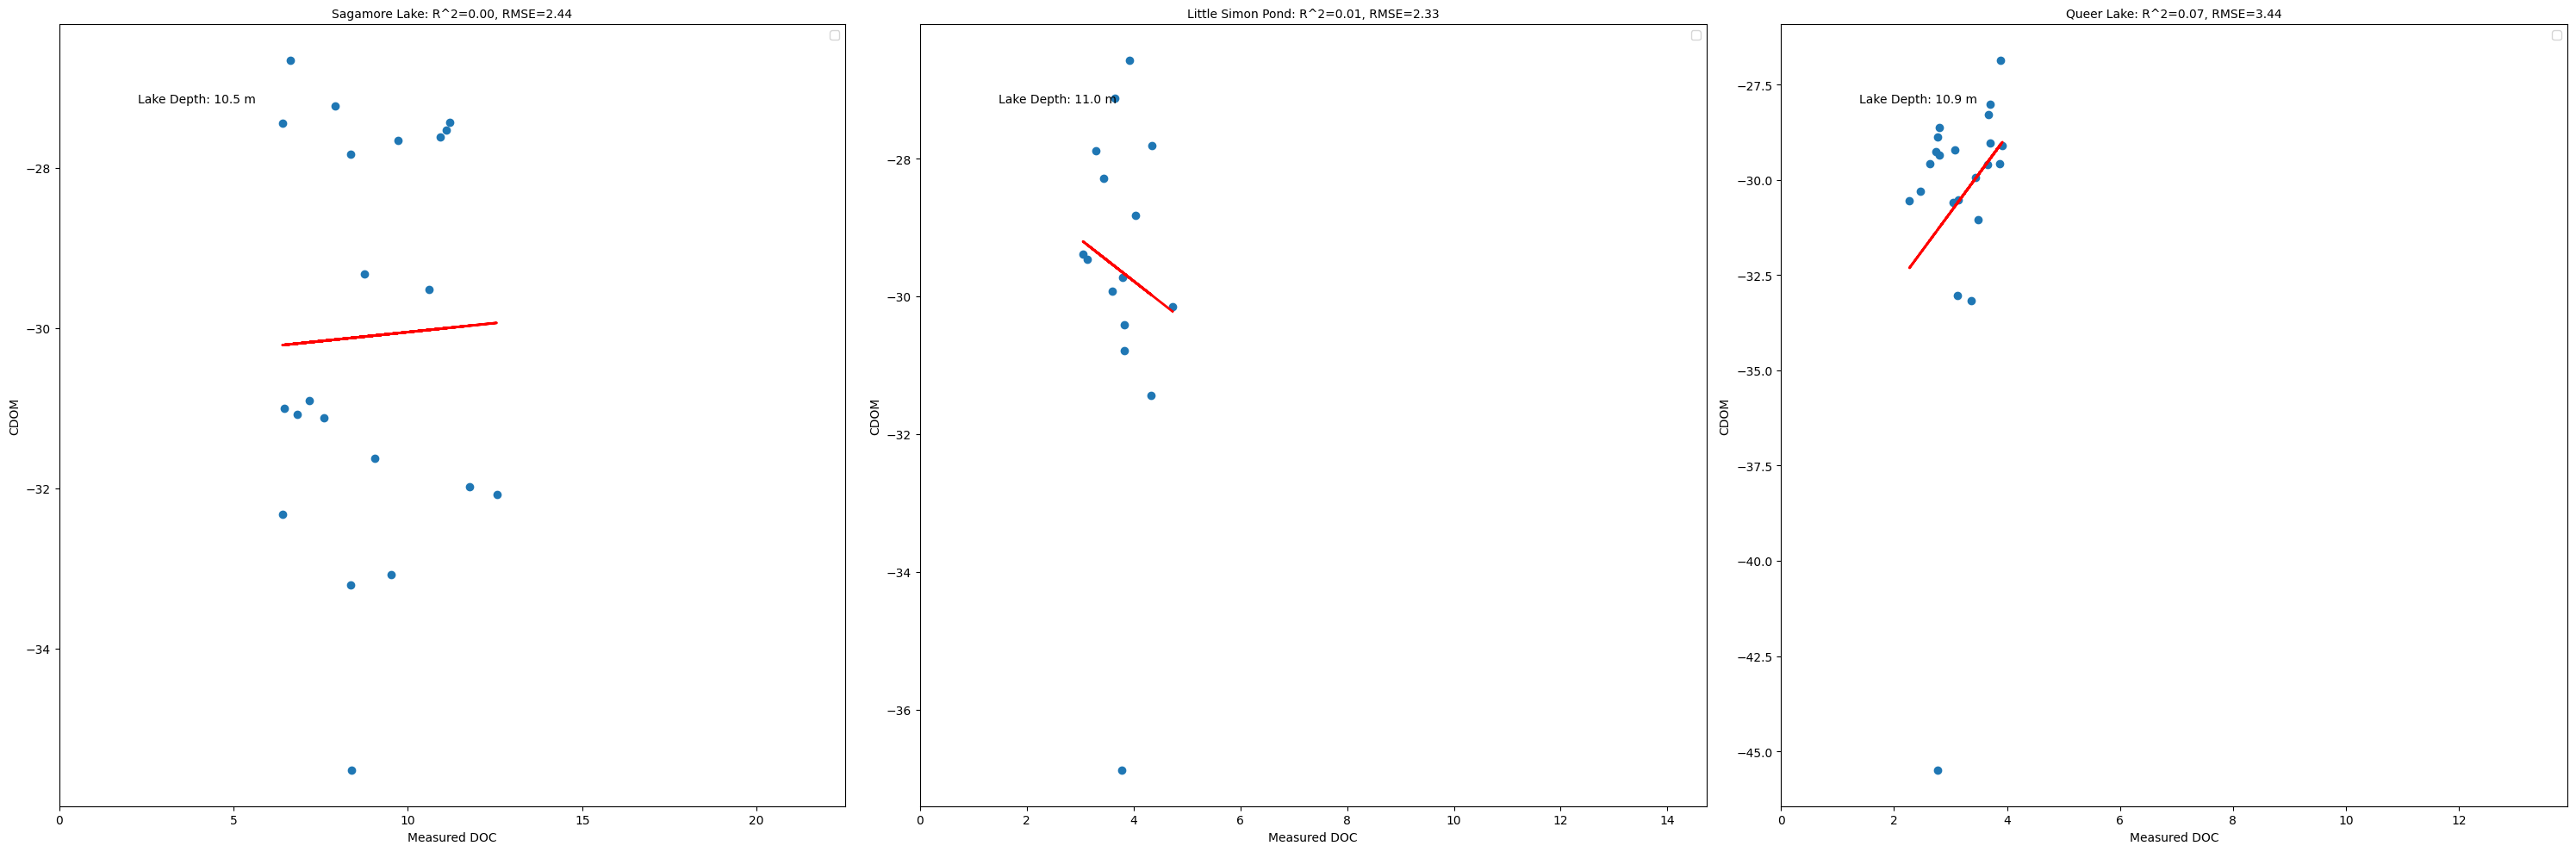

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Assuming 'measured doc' is your dependent variable (y) and 'aCDOM_485' is your independent variable (X)
X_column_name = 'DOC_MG_L'  # Replace with the actual column name for Measured DOC_MG_L
y_column_name = 'ln(a440)_equation5'  # Replace with the actual column name for aCDOM_485

# Filter data for lakes with LAKE_DEPTH (m) greater than 10
filtered_data = merged_data[merged_data['LAKE_DEPTH_MEAN'] > 10]

# Calculate the number of subplots needed based on the number of lakes
num_lakes = len(filtered_data['SITE_NAME'].unique())
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_lakes - 1) // num_cols + 1  # Calculate the number of rows

# Create subplots for filtered lakes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 10))
fig.subplots_adjust(hspace=0.5)
axes = axes.ravel()

for i, lake in enumerate(filtered_data['SITE_NAME'].unique()):
    # Filter the data for the current lake
    lake_data = filtered_data[filtered_data['SITE_NAME'] == lake]

    # Check if there's enough data for regression (at least 2 data points)
    if len(lake_data) >= 2:
        X = lake_data[X_column_name].values.reshape(-1, 1)
        y = lake_data[y_column_name].values

        # Create a linear regression model
        regression_model = LinearRegression()
        regression_model.fit(X, y)

        # Predict y values using the model
        y_pred = regression_model.predict(X)

        # Calculate R^2
        r2 = r2_score(y, y_pred)

        # Calculate RMSE
        rmse = np.sqrt(mean_squared_error(y, y_pred))

        # Plot measured DOC_MG_L against aCDOM for the current lake
        axes[i].scatter(X, y)
        axes[i].plot(X, y_pred, color='red', linewidth=2)
        axes[i].set_xlabel('Measured DOC')
        axes[i].set_ylabel('CDOM')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}')
        axes[i].set_title(f'{lake}: R^2={r2:.2f}, RMSE={rmse:.2f}', fontsize=10)
        axes[i].set_xlim([0, max(X)[0] + 10])  # Adjust the x-axis limit
        axes[i].text(0.1, 0.9, f'Lake Depth: {lake_data["LAKE_DEPTH_MEAN"].values[0]:.1f} m',
                     transform=axes[i].transAxes, fontsize=10)
        axes[i].legend()
    else:
        # If not enough data points, indicate it in the title
        axes[i].set_title(f'{lake}: Not enough data for regression')

# Hide any remaining empty subplots
for i in range(num_lakes, num_cols * num_rows):
    fig.delaxes(axes[i])

# Show the plots
plt.tight_layout()
plt.show()


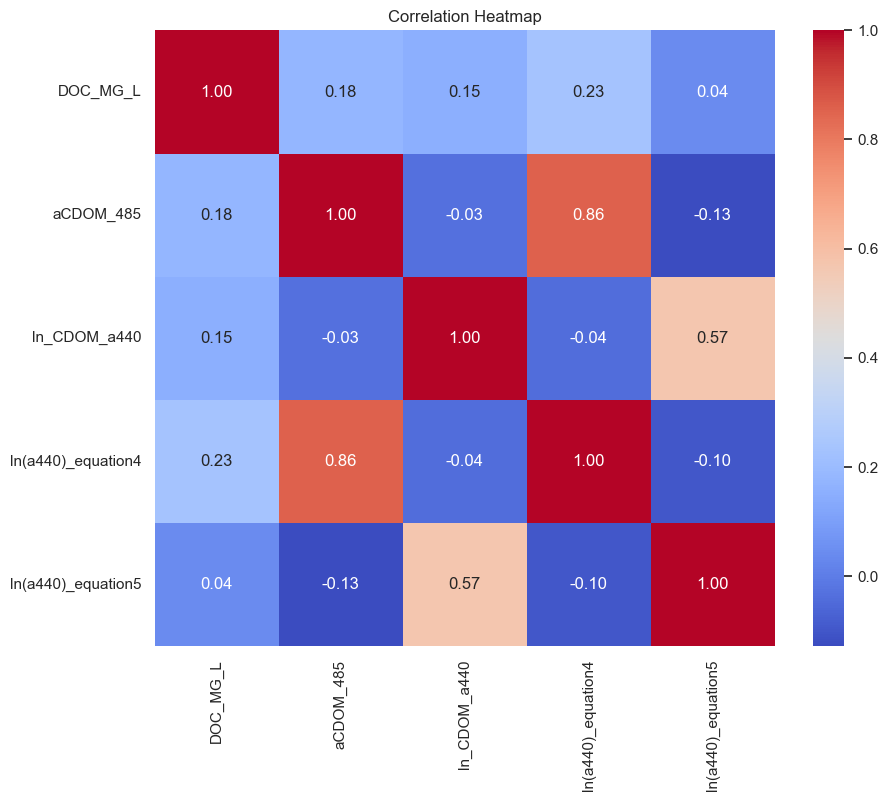

In [62]:
selected_columns = ['DOC_MG_L', 'aCDOM_485', 'ln_CDOM_a440', 'ln(a440)_equation4', 'ln(a440)_equation5']
data_subset = merged_data[selected_columns]
correlation_matrix = data_subset.corr()
# Set the figure size
plt.figure(figsize=(10, 8))

# Customize the heatmap using seaborn
sns.set(font_scale=1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Set the title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()
